# Gamm3, 4 test

In [1]:
from expl_bind_vertex_calc import *

In [2]:
# Eigvect restircted minimization

n_bind = 2 #types of proteins/marks
e_m = np.array([1.52, 1.52]) #binding energy FOR F_BIND_ALT
# e_m = np.array([2, 2]) #binding energy FOR F_BIND_ALT
# e_m = np.array([1, 1]) #binding energy FOR F_BIND_ALT
# e_m = np.array([4, 4]) #binding energy FOR F_BIND_ALT

# e_m = np.array([0.52, 0.52]) #binding energy FOR F_BIND_ALT
v_int =  np.array([[-4, 4], [4, -4]])
phi_p = 0.6
phi_s = 0.1
M = 50
nm = M
pa_vec = np.arange(0, nm, 1) / (nm-1)
pb_vec = 1-pa_vec
poly_marks = [pa_vec, pb_vec]

# test
# mu_max_1 = -2-1.5#8#0.1 #10
# mu_min_1 = -4-1.5#-9
# # mu_min_1 = -8-1.5#-9
# del_mu_1 = 0.1#.5 #0.25
# mu_max_2 = mu_max_1
# mu_min_2 = mu_min_1
# del_mu_2 = del_mu_1

# phi_Au_arr = np.arange(mu_min_1, mu_max_1, del_mu_1)
# phi_Bu_arr = np.arange(mu_min_2, mu_max_2, del_mu_2)

v_s = 1
v_p = 1
v_A = v_p
v_B = v_p
N_P = 5000
N_A = 50
N_B = N_A
b_P = 1
b_A = b_P
b_B = b_P

chi_AB = 100/(N_P*phi_p)

psol = Polymer_soln(n_bind, v_int, e_m, phi_p, phi_s, \
                    poly_marks, v_s, v_p, v_A, v_B, N_P, N_A, N_B,
                    b_P, b_A, b_B, chi_AB)


# klog_min = -2.5
# klog_max = -.1
# klog_num = 30

klog_min = -2.5
klog_max = 1
klog_num = 10

k_vec = np.logspace(klog_min, klog_max, klog_num) / b_P

In [3]:

sA = np.array([0.0001]*25+[1]*25)
sB = np.array([1]*25+[0.0001]*25)
corrs = [sA, sB]
phius = [0.1, 0.1]

In [11]:

# wavevectors
k0 = 10**-2.5#k_vec[0]
kf = 10**2#k_vec[-1]
nk = 5
# k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

# k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))
k3_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

theta_1 = np.pi#/3 #2* np.pi * 1 / 3
theta_2 = 0#2*np.pi/3

frac = 1

k2_vec[:, 0] += frac * np.cos(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)

k3_vec[:, 0] += frac * np.cos(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)
k3_vec[:, 1] += frac * np.sin(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)


k4_vec = - (k1_vec + k2_vec + k3_vec)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))
k4_val = np.sqrt(np.sum(k4_vec ** 2,axis = 1))


In [13]:
i = 1
calc_sf3(psol, corrs, phius, k1_val[i], k2_val[i], -k1_val[i] -k2_val[i])

array([[[6.22619786e+17, 2.03329962e+11, 2.38492238e+11, 0.00000000e+00],
        [2.03329962e+11, 4.82808928e+10, 5.71386452e+10, 0.00000000e+00],
        [2.38492238e+11, 5.71386452e+10, 6.93091318e+10, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[2.03329962e+11, 4.37855589e+10, 5.76733307e+10, 0.00000000e+00],
        [4.82808928e+10, 1.99458254e+10, 3.11856325e+09, 0.00000000e+00],
        [5.71386452e+10, 3.11856325e+09, 1.39087780e+10, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[2.38492238e+11, 5.76733307e+10, 6.12487908e+10, 0.00000000e+00],
        [5.71386452e+10, 3.11856325e+09, 1.39087780e+10, 0.00000000e+00],
        [6.93091318e+10, 1.39087780e+10, 1.99467756e+10, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000

In [14]:
%%time
i = 1
Ks = [k1_val[i], k2_val[i], -k1_val[i] -k2_val[i]]
gamma3(psol, sA, sB, phius, Ks)

CPU times: total: 1.39 s
Wall time: 1.62 s


array([[[-1.04829416e+09,  6.19096135e+08,  6.19096110e+08],
        [ 1.03370241e+09, -6.10478417e+08, -6.10478531e+08],
        [ 1.03370236e+09, -6.10478544e+08, -6.10478450e+08]],

       [[ 1.03370240e+09, -6.10478374e+08, -6.10478549e+08],
        [-1.01931355e+09,  6.01980691e+08,  6.01981499e+08],
        [-1.01931368e+09,  6.01981456e+08,  6.01981240e+08]],

       [[ 1.03370235e+09, -6.10478550e+08, -6.10478371e+08],
        [-1.01931367e+09,  6.01981505e+08,  6.01981144e+08],
        [-1.01931361e+09,  6.01981232e+08,  6.01980984e+08]]])

In [16]:
sf2_inv_raw(psol, corrs, phius, k1_val[i] + -k3_val[i])

array([[ 8.55349393e-04, -1.04393084e-03, -1.04393084e-03,
         0.00000000e+00],
       [-1.04393084e-03,  4.17529664e-03,  2.14292127e-08,
         0.00000000e+00],
       [-1.04393084e-03,  2.14292127e-08,  4.17529664e-03,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+01]])

In [36]:
calc_sf2(psol, corrs, phius, np.array([0.0001]))

[[array([3000.00024822]), 750.0728643289649, 750.0728643289649, 0],
 [750.0728643289649, array([427.04035946]), 187.53518919193783, 0],
 [750.0728643289649, 187.53518919193783, array([427.04035946]), 0],
 [0, 0, 0, 0.1]]

In [26]:
Ks

[0.042169650342858224,
 0.042169650342858224,
 0.042169650342858224,
 0.042169650342858224]

In [18]:
%%time
i = 1
Ks = [k1_val[i], k2_val[i], k3_val[i], -(k1_val[i] + k2_val[i] + k3_val[i])]
gamma4(psol, sA, sB, phius, Ks)

CPU times: total: 9min 20s
Wall time: 10min 33s


array([[[[-2.43887007e+21,  1.35209472e+21,  1.35209453e+21],
         [ 2.40492183e+21, -1.33327442e+21, -1.33327400e+21],
         [ 2.40492132e+21, -1.33327400e+21, -1.33327423e+21]],

        [[ 1.87850816e+21, -8.14187941e+20, -8.14187779e+20],
         [-1.85235999e+21,  8.02855051e+20,  8.02854573e+20],
         [-1.85235953e+21,  8.02854579e+20,  8.02854829e+20]],

        [[ 1.87850802e+21, -8.14187843e+20, -8.14187681e+20],
         [-1.85235986e+21,  8.02854955e+20,  8.02854477e+20],
         [-1.85235939e+21,  8.02854482e+20,  8.02854732e+20]]],


       [[[ 2.40492175e+21, -1.33327401e+21, -1.33327383e+21],
         [-2.37144606e+21,  1.31471568e+21,  1.31471527e+21],
         [-2.37144556e+21,  1.31471527e+21,  1.31471549e+21]],

        [[-1.85236029e+21,  8.02854932e+20,  8.02854773e+20],
         [ 1.82657609e+21, -7.91679790e+20, -7.91679318e+20],
         [ 1.82657564e+21, -7.91679324e+20, -7.91679570e+20]],

        [[-1.85236026e+21,  8.02854748e+20,  8.02854589e+2

# S3, S4 function tests

In [1]:
from expl_bind_corr_calc import *

In [2]:
# Eigvect restircted minimization

n_bind = 2 #types of proteins/marks
e_m = np.array([1.52, 1.52]) #binding energy FOR F_BIND_ALT
# e_m = np.array([2, 2]) #binding energy FOR F_BIND_ALT
# e_m = np.array([1, 1]) #binding energy FOR F_BIND_ALT
# e_m = np.array([4, 4]) #binding energy FOR F_BIND_ALT

# e_m = np.array([0.52, 0.52]) #binding energy FOR F_BIND_ALT
v_int =  np.array([[-4, 4], [4, -4]])
phi_p = 0.6
phi_s = 0.1
M = 50
nm = M
pa_vec = np.arange(0, nm, 1) / (nm-1)
pb_vec = 1-pa_vec
poly_marks = [pa_vec, pb_vec]

# test
# mu_max_1 = -2-1.5#8#0.1 #10
# mu_min_1 = -4-1.5#-9
# # mu_min_1 = -8-1.5#-9
# del_mu_1 = 0.1#.5 #0.25
# mu_max_2 = mu_max_1
# mu_min_2 = mu_min_1
# del_mu_2 = del_mu_1

# phi_Au_arr = np.arange(mu_min_1, mu_max_1, del_mu_1)
# phi_Bu_arr = np.arange(mu_min_2, mu_max_2, del_mu_2)

v_s = 1
v_p = 1
v_A = v_p
v_B = v_p
N_P = 5000
N_A = 50
N_B = N_A
b_P = 1
b_A = b_P
b_B = b_P

chi_AB = 100/(N_P*phi_p)

psol = Polymer_soln(n_bind, v_int, e_m, phi_p, phi_s, \
                    poly_marks, v_s, v_p, v_A, v_B, N_P, N_A, N_B,
                    b_P, b_A, b_B, chi_AB)


# klog_min = -2.5
# klog_max = -.1
# klog_num = 30

klog_min = -2.5
klog_max = 1
klog_num = 10

k_vec = np.logspace(klog_min, klog_max, klog_num) / b_P

In [5]:
# phi_Au_arr = np.arange(0.001, 0.07, 0.01)
# # phi_Au_arr = np.arange(0.001, 0.1, 0.01)

# phi_Bu_arr = phi_Au_arr

# muA_mat, muB_mat, sA_mat, sB_mat, \
# fA_mat, fB_mat, phi_Au_mat, phi_Bu_mat, phi_Ab_mat,\
# phi_Bb_mat = calc_mu_phi_bind(psol, phi_Au_arr, phi_Bu_arr)

sA = np.array([0.0001]*25+[1]*25)
sB = np.array([1]*25+[0.0001]*25)
corrs = [sA, sB]
phius = [0.1, 0.1]

In [7]:

# wavevectors
k0 = 10**-2.5#k_vec[0]
kf = 10**2#k_vec[-1]
nk = 5
# k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

# k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))
k3_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

theta_1 = np.pi#/3 #2* np.pi * 1 / 3
theta_2 = 0#2*np.pi/3

frac = 1

k2_vec[:, 0] += frac * np.cos(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)

k3_vec[:, 0] += frac * np.cos(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)
k3_vec[:, 1] += frac * np.sin(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)


k4_vec = - (k1_vec + k2_vec + k3_vec)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))
k4_val = np.sqrt(np.sum(k4_vec ** 2,axis = 1))


In [115]:
k1_val[0]

0.0031622776601683794

In [14]:
s2 = calc_sf2(psol, corrs, phius, np.array([k1_val[4]]))

In [9]:
s2 = calc_sf2(psol, corrs, phius, k1_val[4])

SAuAu:  2.3999712000000003e-05
S_AAbound:  0.00060005279928


In [20]:
s2

[[0.0007199999136, 2.11701168e-09, 2.11701168e-09, 0],
 [2.11701168e-09, 0.006179943839784, 0.0, 0],
 [2.11701168e-09, 0.0, 0.006179943839784, 0],
 [0, 0, 0, 0.1]]

In [13]:
s2_q0 = calc_sf2(psol, corrs, phius, 0.0001)

SAuAu:  0.9592326932761355
S_AAbound:  624.1072871265261


In [15]:
0.959/624

0.0015368589743589743

In [131]:
s2_q0

[[3000.0002482211135, 750.0728643289649, 750.0728643289649, 0],
 [750.0728643289649, 427.0403594569917, 187.53518919193783, 0],
 [750.0728643289649, 187.53518919193783, 427.04035945699167, 0],
 [0, 0, 0, 0.1]]

In [83]:
np.linalg.inv(s2_q0)

array([[ 8.55349393e-04, -1.04393084e-03, -1.04393084e-03,
         0.00000000e+00],
       [-1.04393084e-03,  4.17529664e-03,  2.14292127e-08,
         0.00000000e+00],
       [-1.04393084e-03,  2.14292127e-08,  4.17529664e-03,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+01]])

In [17]:
np.linalg.inv([[0.3**2, 0.3*0.7+0.001],[0.3*0.7+0.001, 0.7**2]])

array([[-1163.89548694,   501.18764846],
       [  501.18764846,  -213.77672209]])

In [61]:
s2

[[0.0007199999136, 2.11701168e-09, 2.11701168e-09, 0],
 [2.11701168e-09, 0.006179943839784, 0.0, 0],
 [2.11701168e-09, 0.0, 0.006179943839784, 0],
 [0, 0, 0, 0.1]]

In [17]:
psol.N_P

5000

In [141]:
i=0
k1 = k1_val[i]
k2 = k2_val[i]
k12 = -k1-k2
s3 = calc_sf3(psol, corrs, phius, k1, k2, k12)

In [145]:
k1

0.0031622776601683794

In [143]:
s3

array([[[1.85947213e+18, 4.70077932e+11, 4.62048018e+11, 0.00000000e+00],
        [4.70077932e+11, 1.29941930e+11, 1.16630680e+11, 0.00000000e+00],
        [4.62048018e+11, 1.16630680e+11, 1.30646253e+11, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[4.70077932e+11, 1.18605851e+11, 1.16636517e+11, 0.00000000e+00],
        [1.29941930e+11, 3.07773145e+10, 2.99975228e+10, 0.00000000e+00],
        [1.16630680e+11, 2.99975228e+10, 2.79773121e+10, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[4.62048018e+11, 1.16636517e+11, 1.14591235e+11, 0.00000000e+00],
        [1.16630680e+11, 2.99975228e+10, 2.79773121e+10, 0.00000000e+00],
        [1.30646253e+11, 2.79773121e+10, 3.07773372e+10, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000

In [33]:
np.sum(s3 == 0)

36

In [35]:
36 + 1 + 27

64

In [37]:
4**3

64

In [27]:
%%time
i=0
k1 = k1_val[i]
k2 = k2_val[i]
k3 = k3_val[i]
k123 = -k1-k2-k3
s4 = calc_sf4(psol, corrs, phius, k1, k2, k3, k123)

CPU times: total: 9min 19s
Wall time: 11min


In [39]:
np.sum(s4 == 0)

175

In [45]:
175+3**4

256

In [47]:
s4[3,3,3,3]

0.0

In [43]:
4**4

256

# Integral tests

In [1]:
import numpy as np

def I_triple(k2, k3, bA, bP, N_P, M, jdiff, N_A):
    """
    Compute
    I = 2 * ∫_0^{N_A} dn3 ∫_0^{N_A} dn2 ∫_0^{n2} dn1 exp[-a*k3^2*n1 - a*k2^2*(n2-n1)
                                                     - C*k3^2 - a*k3^2*n3]
    where a = bA^2/6, C = (1/6)*(Nchain/(M-1))*bP^2 * (j3-j1).
    Parameters:
      k2, k3   : wavevector magnitudes (floats)
      bA       : Kuhn length on A side chains
      bP       : backbone Kuhn length
      Nchain   : N in backbone prefactor (from user expression)
      M        : M in backbone prefactor (from user expression)
      jdiff    : (j3 - j1) integer or float
      N_A      : upper limit for n integrals
    """
    a = bA**2 / 6.0
    C = (1.0/6.0) * (N_P / (M - 1.0)) * (bP**2) * jdiff

    k2sq = float(k2**2)
    k3sq = float(k3**2)
    Delta = k3sq - k2sq

    # n3 integral factor
    if np.isclose(k3sq, 0.0):
        A3 = N_A
    else:
        A3 = (1.0 - np.exp(-a * k3sq * N_A)) / (a * k3sq)

    # double integral I12
    tol = 1e-12
    if np.isclose(Delta, 0.0, atol=tol):
        # k2^2 == k3^2 == kappa
        kappa = k3sq
        if np.isclose(kappa, 0.0):
            # both zero
            I12 = 0.5 * N_A**2  # ∫_0^N dn2 ∫_0^{n2} dn1 1 = N^2/2
        else:
            I12 = (1.0 / (a * kappa)) * ( (1.0 - np.exp(-a * kappa * N_A)) / (a * kappa)
                                         - (1.0 - np.exp(-2.0 * a * kappa * N_A)) / (2.0 * a * kappa) )
    else:
        # general case
        term1 = (1.0 - np.exp(-a * k2sq * N_A)) / (a * k2sq) if not np.isclose(k2sq, 0.0) else N_A
        term2 = (1.0 - np.exp(-a * k3sq * N_A)) / (a * k3sq) if not np.isclose(k3sq, 0.0) else N_A
        I12 = (1.0 / (a * Delta)) * (term1 - term2)

    I = 2.0 * np.exp(-C * k3sq) * A3 * I12
    return I

In [2]:
k2 = 0.03
k3 = 0.02
bA = 1
bP = 0.3
N_P = 1000
N_A = 100
M = 50
jdiff = 5 
I_triple(k2, k3, bA, bP, N_P, M, jdiff, N_A)

988900.813242588

In [3]:
import numpy as np

def I_factorized(bA, bP, N, M, N_A, k1, k2, k3, j1, j2, j3):
    """
    Compute the triple integral:
    I = ∫_0^N_A dn1 ∫_0^N_A dn2 ∫_0^N_A dn3 exp[ ... ]
    with factorized exponent structure.
    """
    # Coefficients for chain contributions
    a1 = (bA**2 / 6.0) * k1**2
    a2 = (bA**2 / 6.0) * k2**2
    a3 = (bA**2 / 6.0) * k3**2
    
    # Propagator prefactor
    const = np.exp(
        - (N / (6.0*(M-1))) * bP**2 * (k1**2 * (j2 - j1) + k3**2 * (j3 - j2))
    )
    
    def f(a):
        return (1 - np.exp(-a * N_A)) / a if a > 1e-14 else N_A
    
    return const * f(a1) * f(a2) * f(a3)


In [4]:
k1 = 0.046
k2 = 0.03
k3 = -k1-k2
bA = 1
bP = 0.3
N_P = 1000
N_A = 100
M = 50
j1 = np.array([1,2,4])
j2 = np.array([14, 15, 16])
j3 = np.array([25, 26, 27])
I_factorized(bA, bP, N_P, M, N_A, k1, k2, k3, j1, j2, j3)

array([904213.31764687, 904213.31764687, 904799.2161756 ])

In [5]:
# j1 = np.indices((4,4,4))[0]
# j2 = np.indices((4,4,4))[1]
# j3 = np.indices((4,4,4))[2]
# vals = np.array([44, 21, 8.5, 6])
# sAsAsA = np.einsum("i,j,k->ijk", vals, vals, vals)
# sAsAsA / vals[j2]
# np.einsum("i,j,k->ijk", vals, np.ones(len(vals)), vals)

# $S^{(4)}$ testing

In [1]:
import numpy as np
from expl_bind_corr_calc import *

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

## chat funcs

### AAAA

In [2]:
import numpy as np

# UNSTABLE? 

# # small-x series helpers
# def _f1_stable_series(x, N):
#     return N - x*(N**2)/2.0 + x**2*(N**3)/6.0
# def _f2_stable_series(x, N):
#     return (N**2)/2.0 - x*(N**3)/6.0 + x**2*(N**4)/24.0

# def S_AAAA41(k1, k2, k3, k4, bA, N_A, tol=1e-12):
#     """
#     I^{(4,1)}: all four A points on same binder, s-ordered 0<=n1<=n2<=n3<=n4.
#     Canonical mapping (for this ordering):
#       q3 = k4, q2 = k3 + k4, q1 = k2 + k3 + k4
#       x_i = (bA^2/6) * |q_i|^2
#     Returns the 4-fold nested integral value.
#     Branch handling: equal x_i limits, small-x series safeguards.
#     """
#     # build x's
#     q3 = k4
#     q2 = k3 + k4
#     q1 = k2 + k3 + k4
#     x1 = (bA**2 / 6.0) * (np.asarray(q1)**2)
#     x2 = (bA**2 / 6.0) * (np.asarray(q2)**2)
#     x3 = (bA**2 / 6.0) * (np.asarray(q3)**2)
#     N = N_A

#     # scalar-only implementation expected; ensure scalars
#     for xi in (x1, x2, x3):
#         if np.ndim(xi) != 0:
#             raise ValueError("S_AAAA41 expects scalar k inputs or scalar q-combinations per call.")

#     # trivial zero-x limit
#     if abs(x1) < tol and abs(x2) < tol and abs(x3) < tol:
#         return N**4 / 24.0

#     # handle full triple-equality
#     if np.isclose(x1, x2, atol=tol) and np.isclose(x1, x3, atol=tol):
#         x = x1
#         if abs(x) < tol:
#             return N**4 / 24.0
#         num = ( (N**2 * x**2) / 2.0 + N*x*np.exp(N*x) + 2.0*N*x - 3.0*np.exp(N*x) + 3.0 )
#         return float( num * np.exp(-N*x) / (x**4) )

#     # handle pairwise-equal cases numerically-stably via small adaptive integration if needed
#     def _pair_limit(xa, xb):
#         # numeric fallback integral over S in [0,N] of (N - S)*g(S) where g(S) is analytic
#         if abs(xa - xb) < tol:
#             # use series expansion collapse
#             if abs(xa) < tol:
#                 return N**4 / 24.0
#         # numeric trapz fallback (rare path)
#         S = np.linspace(0.0, N, 512)
#         # build g(S) using the partial fraction kernel for 4-point (safe numeric)
#         # we form the original integral numerically in this fallback
#         val = 0.0
#         # compute integrand by direct quadrature of original 4-fold integral is expensive;
#         # but pair-equal cases are rare; instead use direct nested quadrature for reliability:
#         n1 = np.linspace(0.0, N, 60)
#         val = 0.0
#         for i in range(len(n1)-1):
#             n1a = n1[i]; n1b = n1[i+1]
#         # fallback to sympy-derived closed form would be better. For now raise if reached.
#         raise RuntimeError("Pair-limit fallback requested for S_AAAA41; consider input perturbation or request analytic pair-limit form.")
    
#     # General distinct-x partial-fraction evaluation:
#     xs = [x1, x2, x3]
#     As = []
#     for i, xi in enumerate(xs):
#         denom = 1.0
#         for j, xj in enumerate(xs):
#             if i==j: continue
#             denom *= (xj - xi)
#         As.append(1.0/denom)

#     val = 0.0
#     for Ai, xi in zip(As, xs):
#         if abs(xi) < tol:
#             f1 = _f1_stable_series(xi, N)
#             f2 = _f2_stable_series(xi, N)
#         else:
#             f1 = (1.0 - np.exp(-xi*N)) / xi
#             f2 = (1.0 - np.exp(-xi*N)*(1.0 + xi*N)) / (xi**2)
#         val += Ai * (N * f1 - f2)
#     return float(val)

import numpy as np
from scipy.special import exprel

def _f1_stable(x, N):
    """Stable eval of (1 - exp(-xN))/x."""
    if abs(x) < 1e-12:
        return N - 0.5*x*N**2 + (x**2)*N**3/6.0 - (x**3)*N**4/24.0
    return np.exp(-x*N) * N * exprel(-x*N)

# def _f2_stable(x, N):
#     """Stable eval of (1 - exp(-xN)(1+xN))/x^2."""
#     if abs(x) < 1e-8:
#         # series expansion in x
#         return (N**2)/2.0 - (x*N**3)/3.0 + (x**2*N**4)/8.0 - (x**3*N**5)/30.0
#     z = -x*N
#     # exact closed form
#     return (1.0 - np.exp(z)*(1.0 - z)) / (x**2)

# to fix AAAP 41 issue
def _f2_stable(x, N):
    """Stable eval of (1 - exp(-xN)(1+xN))/x^2."""
    if abs(x) < 1e-8:
        # higher-order series expansion
        return (N**2)/2.0 - (x*N**3)/3.0 + (x**2*N**4)/8.0 - (x**3*N**5)/30.0 \
               + (x**4*N**6)/144.0 - (x**5*N**7)/840.0
    else:
        return (1.0 - np.exp(-x*N)*(1.0 + x*N)) / (x**2)


# def S_AAAA41(k1, k2, k3, k4, bA, N_A, tol=1e-12):
#     """
#     I^{(4,1)}: all four A points on same binder, s-ordered 0<=n1<=n2<=n3<=n4.
#     Canonical mapping:
#         q3 = k4
#         q2 = k3 + k4
#         q1 = k2 + k3 + k4
#         x_i = (bA^2 / 6) * |q_i|^2
#     Returns the nested 4-fold integral value with stable evaluation.
#     """
#     q3 = k4
#     q2 = k3 + k4
#     q1 = k2 + k3 + k4
#     x1 = (bA**2 / 6.0) * (np.asarray(q1)**2)
#     x2 = (bA**2 / 6.0) * (np.asarray(q2)**2)
#     x3 = (bA**2 / 6.0) * (np.asarray(q3)**2)
#     N = N_A

#     # zero limit (all vanish)
#     if abs(x1) < tol and abs(x2) < tol and abs(x3) < tol:
#         return N**4 / 24.0

#     # triple-equal case
#     if np.isclose(x1, x2, atol=tol) and np.isclose(x1, x3, atol=tol):
#         x = x1
#         if abs(x) < tol:
#             return N**4 / 24.0
#         num = ((N**2 * x**2)/2.0 + N*x*np.exp(N*x) + 2*N*x - 3*np.exp(N*x) + 3.0)
#         return float(num * np.exp(-N*x) / (x**4))

#     # general distinct-x partial fractions
#     xs = [x1, x2, x3]
#     val = 0.0
#     for i, xi in enumerate(xs):
#         denom = 1.0
#         for j, xj in enumerate(xs):
#             if i == j: continue
#             denom *= (xj - xi)
#         Ai = 1.0/denom

#         f1 = _f1_stable(xi, N)
#         f2 = _f2_stable(xi, N)
#         val += Ai * (N*f1 - f2)

#     return float(val)

import numpy as np
from scipy.special import exprel

# def _f1_stable(x, N):
#     """Stable eval of (1 - exp(-xN))/x."""
#     if abs(x) < 1e-12:
#         return N - 0.5*x*N**2 + (x**2)*N**3/6.0 - (x**3)*N**4/24.0
#     return np.exp(-x*N) * N * exprel(-x*N)

# def _f2_stable(x, N):
#     """Stable eval of (1 - exp(-xN)(1+xN))/x^2."""
#     if abs(x) < 1e-8:
#         return (N**2)/2.0 - (x*N**3)/3.0 + (x**2*N**4)/8.0 - (x**3*N**5)/30.0
#     z = -x*N
#     return (1.0 - np.exp(z)*(1.0 - z)) / (x**2)

def S_AAAA41(k1, k2, k3, k4, bA, N_A, tol=1e-2):
    """
    Case (4,1) AAAA: all four A's on same binder.
    Stable evaluation using _f1_stable/_f2_stable.
    """
    q3 = k4
    q2 = k3 + k4
    q1 = k2 + k3 + k4

    x1 = (bA**2 / 6.0) * (np.asarray(q1)**2)
    x2 = (bA**2 / 6.0) * (np.asarray(q2)**2)
    x3 = (bA**2 / 6.0) * (np.asarray(q3)**2)
    N = N_A

    # all ~0 → volume of 4-simplex
    if abs(x1) < tol and abs(x2) < tol and abs(x3) < tol:
        return N**4 / 24.0

    # triple equal case
    if np.isclose(x1, x2, atol=tol) and np.isclose(x1, x3, atol=tol):
        x = x1
        if abs(x) < tol:
            return N**4 / 24.0
        # series-safe limit
        return (N**4/24.0
                - (x*N**5)/60.0
                + (x**2*N**6)/360.0
                - (x**3*N**7)/2520.0)

    # general case: partial fraction style, but using stable f1,f2
    xs = [x1, x2, x3]
    val = 0.0
    for i, xi in enumerate(xs):
        denom = 1.0
        for j, xj in enumerate(xs):
            if i == j:
                continue
            denom *= (xj - xi)
        Ai = 1.0 / denom
        f1 = _f1_stable(xi, N)
        f2 = _f2_stable(xi, N)
        val += Ai * (N * f1 - f2)

    return float(val)



def S_AAAA42(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_trip, j_iso, tol=1e-12):
    """
    I^{(4,2)}: three points (k1,k2,k3) on same binder at j_trip, isolated point k4 at j_iso.
    Mapping convention (for the triple block alone, s-ordered 1<=2<=3):
      use S_AAA31 with (k_alpha = k3, k_beta = k2 + k3)
    Isolated binder single factor uses x_iso = (bA^2/6)*k4^2
    Backbone prefactor D = (bP^2/6)*(N_P/(M-1)) multiplies k4^2 * |j_iso - j_trip|
    """
    # triple block: use canonical 3-point mapping (for triple indices 1..3)
    # S_AAA31 expects (k_alpha, k_beta, bA, N_A) as you provided earlier:
    k_alpha = k3
    k_beta = k2 + k3
    # call your S_AAA31 implementation (we assume it exists in the namespace)
    I_trip = S_AAA31(k_alpha, k_beta, bA, N_A)

    # isolated single
    x_iso = (bA**2 / 6.0) * (k4**2)
    single_iso = (1.0 - np.exp(-x_iso * N_A)) / x_iso if not np.isclose(x_iso, 0.0, atol=tol) else N_A

    # backbone separation exponential (natural/minimal mapping: use isolated k)
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k4**2) * abs(j_iso - j_trip))

    return backbone * I_trip * single_iso

def S_AAAA43(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_pair, j3, j4, tol=1e-12):
    """
    I^{(4,3)}: pair (k1,k2) on binder at j_pair, singles at j3 (k3) and j4 (k4).
    Canonical mapping for q_pair (if the pair are the earliest two points in ordering):
      q_pair = k2 + k3 + k4  -> x_pair = (bA^2/6) * |q_pair|^2
    single factors use x3=(bA^2/6)*k3^2, x4=(bA^2/6)*k4^2
    Backbone prefactor D uses bP and N_P as usual.
    """
    # x for pair (canonical earliest-pair mapping)
    q_pair = k2 + k3 + k4
    x_pair = (bA**2 / 6.0) * (q_pair**2)

    # 2-point nested integral (pair)
    if np.isclose(x_pair, 0.0, atol=tol):
        pair_val = N_A**2 / 2.0
    else:
        pair_val = (-1.0 + np.exp(-x_pair * N_A) + x_pair * N_A) / (x_pair**2)

    # singles
    x3 = (bA**2 / 6.0) * (k3**2)
    x4 = (bA**2 / 6.0) * (k4**2)
    single3 = (1.0 - np.exp(-x3 * N_A)) / x3 if not np.isclose(x3, 0.0, atol=tol) else N_A
    single4 = (1.0 - np.exp(-x4 * N_A)) / x4 if not np.isclose(x4, 0.0, atol=tol) else N_A

    # backbone prefactor: connect pair to singles (natural mapping uses each single's k)
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k3**2) * abs(j_pair - j3) - D * (k4**2) * abs(j_pair - j4))

    return backbone * pair_val * single3 * single4

def S_AAAA44(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j1, j2, j3, j4, tol=1e-12):
    """
    I^{(4,4)}: all four points on different binders.
    Single-point factors times backbone prefactor (natural nearest-neighbor mapping).
    If you use different phase bookkeeping, replace the k^2's in the backbone factor
    with your desired q_bb^2 combinations.
    """
    xs = [(bA**2 / 6.0) * (k**2) for k in (k1, k2, k3, k4)]
    def single(x):
        return (1.0 - np.exp(-x * N_A)) / x if not np.isclose(x, 0.0, atol=tol) else N_A

    prod = 1.0
    for x in xs:
        prod *= single(x)

    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k1**2) * abs(j2 - j1)
                      - D * (k2**2) * abs(j3 - j2)
                      - D * (k3**2) * abs(j4 - j3))

    return backbone * prod


In [3]:
import numpy as np
# from math import isclose
from scipy.special import exprel   # optional, helps with small-x stability; if scipy unavailable use series below

def S_AAAA41_ALT(k1, k2, k3, k4, bA, N_A, tol=1e-12):#(N, x1, x2, x3, tol=1e-12):
    """
    Evaluate I(N; x1,x2,x3) = nested 4-fold integral described above.
    Handles degenerate and small-x cases stably.
    """
    # all zeros -> N^4/24

    q3 = k4
    q2 = k3 + k4
    q1 = k2 + k3 + k4

    x1 = (bA**2 / 6.0) * (np.asarray(q1)**2)
    x2 = (bA**2 / 6.0) * (np.asarray(q2)**2)
    x3 = (bA**2 / 6.0) * (np.asarray(q3)**2)

    N = N_A
    if abs(x1) < tol and abs(x2) < tol and abs(x3) < tol:
        return N**4 / 24.0

    xs = [x1, x2, x3]

    # if any two are (near-)equal, handle pair limit explicitly:
    if np.isclose(x1, x2, rtol=0, atol=tol) and not np.isclose(x1, x3, rtol=0, atol=tol):
        # x1==x2 != x3  -> use derivative-limit formula
        a = x1; b = x3
        def H(x): return N * _f1_stable(x, N) - _f2_stable(x, N)
        # derivative dH/da numeric-stable analytic:
        # d/dx [N*F1 - F2] = N*dF1/dx - dF2/dx ; implement via small-diff if necessary
        # here use finite difference with adaptive step:
        h = max(abs(a)*1e-6, 1e-8)
        Hm = H(a - h); Hp = H(a + h)
        dH = (Hp - Hm) / (2*h)
        return ( (H(b) - H(a)) - (b - a)*dH ) / ((b - a)**2)

    if np.isclose(x1, x3, rtol=0, atol=tol) and not np.isclose(x1, x2, rtol=0, atol=tol):
        a = x1; b = x2
        def H(x): return N * _f1_stable(x, N) - _f2_stable(x, N)
        h = max(abs(a)*1e-6, 1e-8)
        Hm = H(a - h); Hp = H(a + h)
        dH = (Hp - Hm) / (2*h)
        return ( (H(b) - H(a)) - (b - a)*dH ) / ((b - a)**2)

    if np.isclose(x2, x3, rtol=0, atol=tol) and not np.isclose(x1, x2, rtol=0, atol=tol):
        a = x2; b = x1
        def H(x): return N * _f1_stable(x, N) - _f2_stable(x, N)
        h = max(abs(a)*1e-6, 1e-8)
        Hm = H(a - h); Hp = H(a + h)
        dH = (Hp - Hm) / (2*h)
        return ( (H(b) - H(a)) - (b - a)*dH ) / ((b - a)**2)

    # triple-equal handled above; now general distinct case
    Hvals = [N * _f1_stable(x, N) - _f2_stable(x, N) for x in xs]
    val = 0.0
    for i in range(3):
        xi = xs[i]
        denom = 1.0
        for j in range(3):
            if i==j: continue
            denom *= (xs[j] - xi)
        val += Hvals[i] / denom
    return float(val)
    
# def _f1_stable(x, N, tol=1e-12):
#     # (1 - e^{-xN})/x  with stable small-x expansion
#     if abs(x) < tol:
#         # series: N - 0.5*x*N^2 + (1/6)*x^2*N^3 - ...
#         return N - 0.5*x*N**2 + (x**2)*N**3/6.0 - (x**3)*N**4/24.0
#     z = -x*N
#     # exprel(z) = (e^z - 1)/z, but here convenient form:
#     return np.exp(z) * N * exprel(z)   # equals (1 - e^{-xN})/x

# def _f2_stable(x, N, tol=1e-12):
#     # (1 - e^{-xN}(1 + xN))/x^2 with stable small-x expansion
#     if abs(x) < tol:
#         # series: N^2/2 - (x*N^3)/3 + (x^2*N^4)/8 + ...
#         return 0.5*N**2 - (x*N**3)/3.0 + (x**2*N**4)/8.0 - (x**3*N**5)/30.0
#     z = -x*N
#     # exact: (1 - e^{z}(1 - z))/x^2  but we use safe eval:
#     return (1.0 - np.exp(z)*(1.0 - z)) / (x**2)

# def S_AAAA41_ALT(k1, k2, k3, k4, bA, N_A, tol=1e-12):#(N, x1, x2, x3, tol=1e-12):
#     """
#     Evaluate I(N; x1,x2,x3) = nested 4-fold integral described above.
#     Handles degenerate and small-x cases stably.
#     """
#     # all zeros -> N^4/24

#     q3 = k4
#     q2 = k3 + k4
#     q1 = k2 + k3 + k4

#     x1 = (bA**2 / 6.0) * (np.asarray(q1)**2)
#     x2 = (bA**2 / 6.0) * (np.asarray(q2)**2)
#     x3 = (bA**2 / 6.0) * (np.asarray(q3)**2)

#     N = N_A
#     if abs(x1) < tol and abs(x2) < tol and abs(x3) < tol:
#         return N**4 / 24.0

#     xs = [x1, x2, x3]

#     # if any two are (near-)equal, handle pair limit explicitly:
#     if isclose(x1, x2, rtol=0, atol=tol) and not isclose(x1, x3, rtol=0, atol=tol):
#         # x1==x2 != x3  -> use derivative-limit formula
#         a = x1; b = x3
#         def H(x): return N * _f1_stable(x, N) - _f2_stable(x, N)
#         # derivative dH/da numeric-stable analytic:
#         # d/dx [N*F1 - F2] = N*dF1/dx - dF2/dx ; implement via small-diff if necessary
#         # here use finite difference with adaptive step:
#         h = max(abs(a)*1e-6, 1e-8)
#         Hm = H(a - h); Hp = H(a + h)
#         dH = (Hp - Hm) / (2*h)
#         return ( (H(b) - H(a)) - (b - a)*dH ) / ((b - a)**2)

#     if isclose(x1, x3, rtol=0, atol=tol) and not isclose(x1, x2, rtol=0, atol=tol):
#         a = x1; b = x2
#         def H(x): return N * _f1_stable(x, N) - _f2_stable(x, N)
#         h = max(abs(a)*1e-6, 1e-8)
#         Hm = H(a - h); Hp = H(a + h)
#         dH = (Hp - Hm) / (2*h)
#         return ( (H(b) - H(a)) - (b - a)*dH ) / ((b - a)**2)

#     if isclose(x2, x3, rtol=0, atol=tol) and not isclose(x1, x2, rtol=0, atol=tol):
#         a = x2; b = x1
#         def H(x): return N * _f1_stable(x, N) - _f2_stable(x, N)
#         h = max(abs(a)*1e-6, 1e-8)
#         Hm = H(a - h); Hp = H(a + h)
#         dH = (Hp - Hm) / (2*h)
#         return ( (H(b) - H(a)) - (b - a)*dH ) / ((b - a)**2)

#     # triple-equal handled above; now general distinct case
#     Hvals = [N * _f1_stable(x, N) - _f2_stable(x, N) for x in xs]
#     val = 0.0
#     for i in range(3):
#         xi = xs[i]
#         denom = 1.0
#         for j in range(3):
#             if i==j: continue
#             denom *= (xs[j] - xi)
#         val += Hvals[i] / denom
#     return float(val)


### AAAP

In [7]:
def S_AAAP41(k1, k2, k3, k4, bA, bP, N_A, N_P, M, tol=1e-12):
    """
    Case (4,1) for AAAP: A1,A2,A3 and P all attached to the same backbone monomer.
    The P point is anchored (no backbone integral). The remaining integral is the
    triple-nested integral over the three A contour variables:
        I = ∫_0^{N_A} dn3 ∫_0^{n3} dn2 ∫_0^{n2} dn1 exp[-x2 (n3-n2) - x1 (n2-n1)]
    Canonical mapping (for A1,A2,A3): q2 = k3, q1 = k2 + k3.
    k1 (the leftmost A) does not enter the triple-block exponent directly under this
    s-ordering — its contribution shows up when summing permutations externally.
    """
    # build x's (scalars)
    q2 = k3
    q1 = k2 + k3
    x1 = (bA**2 / 6.0) * (q1**2)
    x2 = (bA**2 / 6.0) * (q2**2)
    N = N_A

    # If both x1,x2 are ~0 -> integral = volume of 3-simplex = N^3/6
    if abs(x1) < tol and abs(x2) < tol:
        return N**3 / 6.0

    # Stable evaluation of the triple nested integral:
    # Use the standard closed form (same algebraic structure as your S_AAA31)
    # Let f(x) = (1 - exp(-x N)) / x ; g(x) = (1 - exp(-x N)(1 + x N)) / x^2
    f1 = _f1_stable(x1, N)
    f2 = _f1_stable(x2, N)
    g1 = _f2_stable(x1, N)
    g2 = _f2_stable(x2, N)

    if abs(x1) < 1e-2 and abs(x2) < 1e-2:
        # Series expansion for whole triple integral
        # print("return 2")
        # print(N**3/6.0 - (N**4/24.0)*(x1 + x2) + (N**5/120.0)*(x1**2 + 3*x1*x2 + x2**2))
        return N**3/6.0 - (N**4/24.0)*(x1 + x2) + (N**5/120.0)*(x1**2 + 3*x1*x2 + x2**2)
        
    # analytic expression (equivalent to the S_AAA31 closed form)
    # I = (1/(x1 - x2)) * [ (f2 - f1) / x? ... ]
    # A stable and compact form is:
    if np.isclose(x1, x2, atol=tol):
        # pair limit x1 -> x2
        # limit gives: (N / x1**2) + (N*x1**2*exp(-x1*N) - 2*x1*(1 - exp(-x1*N)))/x1**4
        if abs(x1) < tol:
            return N**3 / 6.0
        num = (N * x1**2 * np.exp(-x1 * N) - 2.0 * x1 * (1.0 - np.exp(-x1 * N)))
        # print("return 3")
        # print((N / x1**2) + num / (x1**4))
        return (N / x1**2) + num / (x1**4)
    else:
        # general distinct case using stable f & g
        # print("GENERAL- WHERE THE ISSUE IS")
        # print((N / (x1 * x2)
        #         + (f1) / (x1**2 * (x1 - x2))
        #         - (f2) / (x2**2 * (x1 - x2))))
        # print("ALT")
        # print(N/(x1*x2) + ( (f1/x1**2) - (f2/x2**2) ) / (x1 - x2))
        return (N / (x1 * x2)
                + (f1) / (x1**2 * (x1 - x2))
                - (f2) / (x2**2 * (x1 - x2)))

def S_AAAP42(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_trip, j_iso, tol=1e-12):
    """
    Case (4,2): triple-A block at j_trip (A1,A2,A3), isolated P at j_iso.
    Returns: triple-block integral * backbone exponential factor.
    """
    # compute triple block using same routine as S_AAAP41 (s-ordered)
    I_trip = S_AAAP41(k1, k2, k3, k4, bA, bP, N_A, N_P, M, tol=tol)
    # backbone prefactor: D * k4^2 * |j_iso - j_trip|
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k4**2) * abs(j_iso - j_trip))
    return backbone * I_trip

def S_AAAP43(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_pair, j_a3, j_p, tol=1e-12):
    """
    Case (4,3): A-pair at j_pair (k1,k2), single A at j_a3 (k3), P at j_p (k4).
    Returns: pair nested integral * single A * backbone prefactors.
    """
    # x for pair: canonical mapping (if pair are earliest two)
    q_pair = k2 + k3 + k4   # canonical for earliest pair in full ordering; change if your ordering differs
    x_pair = (bA**2 / 6.0) * (q_pair**2)

    # pair nested integral (2-point)
    if np.isclose(x_pair, 0.0, atol=tol):
        pair_val = N_A**2 / 2.0
    else:
        pair_val = (-1.0 + np.exp(-x_pair * N_A) + x_pair * N_A) / (x_pair**2)

    # single A (third A)
    xA3 = (bA**2 / 6.0) * (k3**2)
    singleA3 = _f1_stable(xA3, N_A)

    # backbone prefactors using D and minimal mapping: connect pair to P and to A3
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k4**2) * abs(j_pair - j_p) - D * (k3**2) * abs(j_pair - j_a3))

    return backbone * pair_val * singleA3

def S_AAAP44(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j1, j2, j3, j4, tol=1e-12):
    """
    Case (4,4): all points on distinct binders/monomers: factorized singles times backbone prefactor.
    Here j1,j2,j3 are the three A-binding backbone indices and j4 is the P backbone index.
    """
    xs = [(bA**2 / 6.0) * (k**2) for k in (k1, k2, k3)]
    prod = 1.0
    for x in xs:
        prod *= _f1_stable(x, N_A)

    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    # nearest-neighbor mapping for backbone separations (minimal choice)
    backbone = np.exp(- D * (k1**2) * abs(j2 - j1)
                      - D * (k2**2) * abs(j3 - j2)
                      - D * (k3**2) * abs(j4 - j3))

    return backbone * prod


### AAPP

In [10]:
import numpy as np

# # stable helpers (repeated here for convenience)
# def _f1_stable(x, L):
#     if abs(x) < 1e-12:
#         return L - 0.5*x*L**2 + (x**2)*L**3/6.0
#     return (1.0 - np.exp(-x*L)) / x

# def _f2_stable(x, L):
#     if abs(x) < 1e-10:
#         return (L**2)/2.0 - (x*L**3)/6.0 + (x**2 * L**4)/24.0
#     return (1.0 - np.exp(-x*L)*(1.0 + x*L)) / (x**2)


# -------------------------------
# I^(4,1): all four attached to same backbone monomer
# -------------------------------
def S_AAPP41(k1, k2, k3, k4, bA, bP, N_A, N_P, M, tol=1e-12):
    """
    s-ordered integral for topology (4,1): all attached to same backbone monomer.
    Canonical mapping for two A points (positions 1 and 2):
      q_alpha = k2 + k3 + k4
      q_beta  = k3 + k4
    Integral: I = ∫_0^{N_A} dn2 ∫_0^{n2} dn1 exp[-x_alpha (n2-n1) - x_beta n1]
    """
    q_alpha = k2 + k3 + k4
    q_beta  = k3 + k4
    x_alpha = (bA**2 / 6.0) * (q_alpha**2)
    x_beta  = (bA**2 / 6.0) * (q_beta**2)
    N = N_A

    # small x limits
    if abs(x_alpha) < tol and abs(x_beta) < tol:
        return N**2 / 2.0  # integral of triangle area

    # equal-case
    if np.isclose(x_alpha, x_beta, atol=tol):
        if abs(x_alpha) < tol:
            return N**2 / 2.0
        # limit expression (stable)
        return ( (1.0 - np.exp(-x_alpha*N) - x_alpha*N*np.exp(-x_alpha*N)) / (x_alpha**2) )

    # general distinct case (stable using _f1_stable):
    f_alpha = _f1_stable(x_alpha, N)
    f_beta  = _f1_stable(x_beta, N)

    return (f_beta - f_alpha) / (x_alpha - x_beta)


# -------------------------------
# I^(4,2): 3+1 partition (triple A+P at j_trip, isolated P at j_iso)
# -------------------------------
def S_AAPP42(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_trip, j_iso, tol=1e-12):
    """
    topology: A1,A2,P1 attached at j_trip; P2 attached at j_iso (isolated)
    s-ordered triple A-block integral times backbone exponential for isolated P2.
    Uses same canonical mapping for the A-block as in S_AAPP41.
    """
    # triple A-block reduces to two-A nested integral (A positions 1,2)
    I_Ablock = S_AAPP41(k1, k2, k3, k4, bA, bP, N_A, N_P, M, tol=tol)

    # backbone prefactor D * k4^2 * |j_iso - j_trip|
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k4**2) * abs(j_iso - j_trip))

    return backbone * I_Ablock


# -------------------------------
# I^(4,3): 2 + 1 + 1 partition
# Two main variants handled in one function by specifying which pair is paired.
# -------------------------------
def S_AAPP43_pairA(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_pair, j_p1, j_p2, tol=1e-12):
    """
    Variant where the pair is the two A points (A1,A2) attached at j_pair,
    P1 attached at j_p1, P2 attached at j_p2 (singles).
    Canonical q_pair = k2 + k3 + k4
    Returns pair_nested_integral * backbone exponential connecting pair->P1 and pair->P2.
    """
    q_pair = k2 + k3 + k4
    x_pair = (bA**2 / 6.0) * (q_pair**2)
    N = N_A

    # pair nested integral (A pair)
    if np.isclose(x_pair, 0.0, atol=tol):
        pair_val = N**2 / 2.0
    else:
        # (-1 + exp(-xN) + xN) / x^2
        pair_val = (-1.0 + np.exp(-x_pair * N) + x_pair * N) / (x_pair**2)

    # backbone prefactors (minimal mapping): connect pair site to P1 and P2 using their k's
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k3**2) * abs(j_pair - j_p1) - D * (k4**2) * abs(j_pair - j_p2))

    return backbone * pair_val


def S_AAPP43_pairP(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_pairP, j_a1, j_a2, tol=1e-12):
    """
    Variant where the pair is the two P points (P1,P2) on the same backbone index j_pairP,
    and the two A points are singles attached at j_a1 and j_a2.
    The pair integral is over P contour (N_P, b_P).
    Canonical q_pairP mapping: sum of right-of-pair ks (depends on ordering) — use k3,k4 as P ks.
    Here we assume q_pairP = k3 (segment between P points), and pair decay y=(bP^2/6)*k3^2.
    """
    # nested P integral
    y1 = (bP**2 / 6.0) * (k3**2)  # canonical choice; adjust if your bookkeeping differs
    if np.isclose(y1, 0.0, atol=tol):
        pairP_val = N_P**2 / 2.0
    else:
        pairP_val = (-1.0 + np.exp(-y1 * N_P) + y1 * N_P) / (y1**2)

    # singles: A1 and A2 single integrals
    xA1 = (bA**2 / 6.0) * (k1**2)
    xA2 = (bA**2 / 6.0) * (k2**2)
    singleA1 = _f1_stable(xA1, N_A)
    singleA2 = _f1_stable(xA2, N_A)

    # backbone prefactors connecting P-pair site to each A single
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k1**2) * abs(j_pairP - j_a1) - D * (k2**2) * abs(j_pairP - j_a2))

    return backbone * pairP_val * singleA1 * singleA2

def S_AAPP43(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_pairP, j_a1, j_a2, tol=1e-12):
    return S_AAPP43_pairP(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_pairP, j_a1, j_a2, tol=1e-12)\
    +  S_AAPP43_pairA(k1, k2, k3, k4, bA, bP, N_A, N_P, M, j_pairP, j_a1, j_a2, tol=1e-12)
# -------------------------------
# I^(4,4): all four on distinct monomers (fully factorized)
# -------------------------------
def S_AAPP44(k1, k2, k3, k4, bA, bP, N_A, N_P, M, jA1, jA2, jP1, jP2, tol=1e-12):
    """
    Fully factorized case: A1 at jA1, A2 at jA2, P1 at jP1, P2 at jP2 (all distinct).
    Returns product of single-A integrals times backbone prefactors (minimal nearest-neighbor).
    Note: mapping of backbone prefactor k's to segments is minimal/nearest-neighbour and may need
    adjustment if your bookkeeping assigns different q_bb.
    """
    xA1 = (bA**2 / 6.0) * (k1**2)
    xA2 = (bA**2 / 6.0) * (k2**2)
    sA1 = _f1_stable(xA1, N_A)
    sA2 = _f1_stable(xA2, N_A)

    # minimal backbone prefactor: connect along the chain in index order jA1 -> jP1 -> jA2 -> jP2 (example)
    # YOU SHOULD ADJUST this mapping to your actual backbone order; here we use a simple nearest-neighbor
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k1**2) * abs(jP1 - jA1)
                      - D * (k3**2) * abs(jA2 - jP1)
                      - D * (k4**2) * abs(jP2 - jA2))

    return backbone * sA1 * sA2


### APPP

In [12]:
import numpy as np

# def _f1_stable(x, L):
#     """Stable evaluation of (1 - exp(-x L)) / x for scalar x."""
#     if abs(x) < 1e-12:
#         # series to order x^2
#         return L - 0.5*x*L**2 + (x**2)*L**3/6.0
#     return (1.0 - np.exp(-x * L)) / x

def S_APPP41(kA, kP1, kP2, kP3, bA, bP, N_A, N_P, M, tol=1e-12):
    """
    Case (4,1) for S_{APPP}: all points attached to the same backbone monomer j0.
    Only the A binder contour is free.
    Inputs:
      kA, kP1, kP2, kP3 : scalar wavevector magnitudes (or scalars representing |k|).
      bA, bP            : Kuhn lengths for A- and P-chains (bP unused here but kept for API consistency).
      N_A, N_P, M       : contour lengths and polymer parameters (N_P,M unused here).
      j0                : backbone monomer index where all attach (unused but kept for API consistency).
    Returns:
      I = ∫_0^{N_A} dn exp[- (bA^2/6) * kA^2 * n ]  (computed stably)
    """
    xA = (bA**2 / 6.0) * (kA**2)
    return _f1_stable(xA, N_A)

import numpy as np

def S_APPP42(kA, kP1, kP2, kP3, bA, bP, N_A, N_P, M, jA, jP):
    """
    Case (4,2): 3 P coincide, A separate.
    Integral over A + exponential P factor.
    """
    kPsum = kP1+ kP2+ kP3
    aA = (bA**2 / 6.0) * kA**2
    deltaJP = jP - jA
    expP = np.exp(-(N_P / (6.0*(M-1))) * bP**2 * kPsum**2 * deltaJP)

    # A integral
    if np.isclose(aA, 0.0, atol=1e-14):
        FA = N_A
    else:
        FA = (1.0 - np.exp(-aA * N_A)) / aA

    return FA * expP


def S_APPP43(kA, kP1, kP2, kP3, bA, bP, N_A, N_P, M, j1, j2, j3):
    """
    Case (4,3): (A,P) pair + (P,P) pair.
    """
    aA = (bA**2 / 6.0) * kA**2
    if np.isclose(aA, 0.0, atol=1e-14):
        FA = N_A
    else:
        FA = (1.0 - np.exp(-aA * N_A)) / aA

    delJ1 = (N_P/(6.0*(M-1))) * bP**2 * kP1**2 * (j2 - j1)
    delJ2 = (N_P/(6.0*(M-1))) * bP**2 * kP2**2 * (j3 - j2)

    return FA * np.exp(-(delJ1 + delJ2))


def S_APPP44(kA, kP1, kP2, kP3, bA, bP, N_A, N_P, M, j1, j2, j3, j4):
    """
    Case (4,4): all distinct indices.
    """
    aA = (bA**2 / 6.0) * kA**2
    if np.isclose(aA, 0.0, atol=1e-14):
        FA = N_A
    else:
        FA = (1.0 - np.exp(-aA * N_A)) / aA

    delJ = (N_P/(6.0*(M-1))) * bP**2 * (
        kP1**2 * (j2 - j1) + kP2**2 * (j3 - j2) + kP3**2 * (j4 - j3)
    )
    return FA * np.exp(-delJ)


### AAPA

In [16]:
def S_AAPA42_AAPtriple_Aisolated(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_trip,j_iso,tol=1e-12):
    # two-A nested block (A1,A2 with anchored P3 inside triple)
    a_alpha = (bA**2 / 6.0) * ( (k2 + k3)**2 )
    a_beta  = (bA**2 / 6.0) * ( k3**2 )
    # use same stable routine as S_AAP31 for two-A nested integral
    def twoA_nested(a_alpha,a_beta,N):
        if np.isclose(a_alpha,a_beta,atol=tol):
            f = _f1_stable(a_alpha,N)
            return 0.5 * f * N
        f_alpha = _f1_stable(a_alpha,N)
        f_beta  = _f1_stable(a_beta,N)
        return (f_beta - f_alpha) / (a_alpha - a_beta)

    I_twoA = twoA_nested(a_alpha,a_beta,N_A)
    singleA4 = _f1_stable((bA**2 / 6.0) * (k4**2), N_A)
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k4**2) * abs(j_iso - j_trip))
    return backbone * I_twoA * singleA4


def S_AAPA43(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pair,j_p,j_a4,tol=1e-12):
    # pair integral (A1,A2)
    q_pair = k2 + k3 + k4  # canonical mapping when pair are earliest
    x_pair = (bA**2 / 6.0) * (q_pair**2)
    if np.isclose(x_pair,0.0,atol=tol):
        pair_val = N_A**2 / 2.0
    else:
        pair_val = (-1.0 + np.exp(-x_pair * N_A) + x_pair * N_A) / (x_pair**2)

    singleA4 = _f1_stable((bA**2 / 6.0) * (k4**2), N_A)

    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k3**2) * abs(j_pair - j_p) - D * (k4**2) * abs(j_pair - j_a4))

    return backbone * pair_val * singleA4



### APPA

In [20]:
def S_APPA42(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_trip,j_iso,tol=1e-12):
    """
    triple = A1,P2,P3 at j_trip; isolated A4 at j_iso.
    - triple A factor (A1 single): x_t uses q_t = k2 + k3
    - isolated A4 single factor uses k4
    - backbone prefactor uses k4^2 * |j_iso - j_trip|
    """
    x_t = (bA**2 / 6.0) * ((k2 + k3)**2)  # q_t canonical
    single_trip = _f1_stable(x_t, N_A)

    x4 = (bA**2 / 6.0) * (k4**2)
    single4 = _f1_stable(x4, N_A)

    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k4**2) * abs(j_iso - j_trip))

    return backbone * single_trip * single4

def S_APPA43_pairP(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pairP,j_a1,j_a4,tol=1e-12):
    # nested P pair
    # choose canonical q for P-segment (e.g. qP = k3 if P3 sits right of P2)
    y = (bP**2 / 6.0) * (k3**2)
    if np.isclose(y, 0.0, atol=tol):
        pair_val = N_P**2 / 2.0
    else:
        pair_val = (-1.0 + np.exp(-y * N_P) + y * N_P) / (y**2)

    # singles A
    s1 = _f1_stable((bA**2/6.0)*(k1**2), N_A)
    s4 = _f1_stable((bA**2/6.0)*(k4**2), N_A)

    # backbone prefactors linking pair site to each A
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k1**2) * abs(j_pairP - j_a1) - D * (k4**2) * abs(j_pairP - j_a4))

    return backbone * pair_val * s1 * s4

def S_APPA43(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pairP,j_a1,j_a4,tol=1e-12):
    return S_APPA43_pairP(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pairP,j_a1,j_a4)

def S_APPA44(k1,k2,k3,k4,bA,bP,N_A,N_P,M,jA1,jP2,jP3,jA4,tol=1e-12):
    # singles (A1 and A4)
    s1 = _f1_stable((bA**2/6.0)*(k1**2), N_A)
    s4 = _f1_stable((bA**2/6.0)*(k4**2), N_A)

    # backbone prefactors connecting along the backbone (minimal mapping example)
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k1**2) * abs(jP2 - jA1)
                      - D * (k2**2) * abs(jP3 - jP2)
                      - D * (k3**2) * abs(jA4 - jP3))
    return backbone * s1 * s4


### PAAP

In [23]:
def S_PAAP42(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_trip,j_iso,tol=1e-12):
    I_block = S_AAPP41(k1,k2,k3,k4,bA,bP,N_A,N_P,M,tol=tol)
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    return I_block * np.exp(- D * (k4**2) * abs(j_iso - j_trip))

def S_PAAP43_pairA(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pair,j_p1,j_p4,tol=1e-12):
    # pair integral over A (A2,A3)
    q_pair = k3 + k4   # canonical when A2 is left of A3 and P4 to right
    x = (bA**2 / 6.0) * (q_pair**2)
    if np.isclose(x, 0.0, atol=tol):
        pair = N_A**2 / 2.0
    else:
        pair = (-1.0 + np.exp(-x * N_A) + x * N_A) / (x**2)

    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k1**2) * abs(j_pair - j_p1) - D * (k4**2) * abs(j_pair - j_p4))
    return backbone * pair

def S_PAAP43_pairP(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pairP,j_a2,j_a3,tol=1e-12):
    # nested P pair: choose canonical q for P-segment (e.g. qP=k4 if P4 to right)
    y = (bP**2 / 6.0) * (k4**2)   # adapt if your mapping differs
    if np.isclose(y, 0.0, atol=tol):
        pairP = N_P**2 / 2.0
    else:
        pairP = (-1.0 + np.exp(-y * N_P) + y * N_P) / (y**2)

    singleA2 = _f1_stable((bA**2 / 6.0) * (k2**2), N_A)
    singleA3 = _f1_stable((bA**2 / 6.0) * (k3**2), N_A)

    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone = np.exp(- D * (k2**2) * abs(j_pairP - j_a2) - D * (k3**2) * abs(j_pairP - j_a3))

    return backbone * pairP * singleA2 * singleA3

def S_PAAP43(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pair,j_p1,j_p4,tol=1e-12):
    return S_PAAP43_pairA(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pair,j_p1,j_p4) \
    + S_PAAP43_pairP(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pair,j_p1,j_p4)

def S_PAAP44(k1,k2,k3,k4,bA,bP,N_A,N_P,M,jP1,jA2,jA3,jP4,tol=1e-12):
    s2 = _f1_stable((bA**2/6.0)*(k2**2), N_A)
    s3 = _f1_stable((bA**2/6.0)*(k3**2), N_A)

    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    # example backbone mapping: jP1 -> jA2 -> jA3 -> jP4
    backbone = np.exp(- D * (k1**2) * abs(jA2 - jP1)
                      - D * (k2**2) * abs(jA3 - jA2)
                      - D * (k4**2) * abs(jP4 - jA3))
    # note: we used k2^2 for middle seg in example; adapt as per your q_bb convention
    return backbone * s2 * s3


### PAPP

In [26]:
def S_PAPP42_tripleP_isolatedA(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_trip,j_iso,tol=1e-12):
    xA = (bA**2 / 6.0) * (k2**2)
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    return _f1_stable(xA, N_A) * np.exp(- D * (k2**2) * abs(j_iso - j_trip))

def S_PAPP42_triple_with_A_isolatedP(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_trip,j_iso,tol=1e-12):
    xA = (bA**2 / 6.0) * (k2**2)
    D = (bP**2 / 6.0) * (N_P / (M - 1.0))
    return _f1_stable(xA, N_A) * np.exp(- D * (k4**2) * abs(j_iso - j_trip))

def S_PAPP42(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_trip,j_iso): 
    return S_PAPP42_tripleP_isolatedA(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_trip,j_iso) \
    + S_PAPP42_triple_with_A_isolatedP(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_trip,j_iso)

# def S_PAPP43(k1,k2,k3,k4,bA,bP,N_A,N_P,M,j_pair,j_p1,tol=1e-12):
#     # nested P pair (pair = P3,P4) -> canonical q_pair = k4
#     y = (bP**2 / 6.0) * (k4**2)
#     if np.isclose(y, 0.0, atol=tol):
#         pairP = N_P**2 / 2.0
#     else:
#         pairP = (-1.0 + np.exp(-y * N_P) + y * N_P) / (y**2)
#     singleA = _f1_stable((bA**2 / 6.0) * (k2**2), N_A)
#     D = (bP**2 / 6.0) * (N_P / (M - 1.0))
#     backbone = np.exp(- D * (k1**2) * abs(j_pair - j_p1))
#     return pairP * singleA * backbone


## k vecs, constants

In [9]:
b_A = 1
b_B = 1
b_P = 1
N_P = 1000
N_A = 100
N_B = N_A
M = 50
sA = np.array([0.0001]*25+[1]*25)
sB = np.array([1]*25+[0.0001]*25)
corrs = [sA, sB]



# wavevectors
# k0 = 10**-2.5#k_vec[0]
# kf = 10**2#k_vec[-1]

klog_min = -2.5
klog_max = -1.69 # = np.log10(1/N_A)
k0 = 10**klog_min
kf = 10**klog_max

nk = 15
# k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

# k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))
k3_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

theta_1 = np.pi#/3 #2* np.pi * 1 / 3
theta_2 = 0#2*np.pi/3

frac = 1

k2_vec[:, 0] += frac * np.cos(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)

k3_vec[:, 0] += frac * np.cos(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)
k3_vec[:, 1] += frac * np.sin(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)


k4_vec = - (k1_vec + k2_vec + k3_vec)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))
k4_val = np.sqrt(np.sum(k4_vec ** 2,axis = 1))


In [12]:
k1_val

array([0.00316228, 0.00361291, 0.00412776, 0.00471597, 0.00538801,
       0.00615582, 0.00703304, 0.00803526, 0.00918031, 0.01048852,
       0.01198316, 0.01369079, 0.01564176, 0.01787075, 0.02041738])

In [33]:
k2_val

array([3.16227766e-03, 4.21696503e-02, 5.62341325e-01, 7.49894209e+00,
       1.00000000e+02])

In [35]:
k3_val

array([3.16227766e-03, 4.21696503e-02, 5.62341325e-01, 7.49894209e+00,
       1.00000000e+02])

In [37]:
k4_val

array([3.16227766e-03, 4.21696503e-02, 5.62341325e-01, 7.49894209e+00,
       1.00000000e+02])

## calc

In [11]:
%%time
sA, sB = corrs
sP = np.ones_like(sA)
sAsA = np.outer(sA, sA)
sBsB = np.outer(sB, sB)
sAsB = np.outer(sA, sB)

sAsAsAsA = np.einsum("i,j,k,l->ijkl", sA, sA, sA, sA)
sAsAsAsP = np.einsum("i,j,k,l->ijkl", sA, sA, sA, sP)
sAsAsPsP = np.einsum("i,j,k,l->ijkl", sA, sA, sP, sP)
sAsPsPsP = np.einsum("i,j,k,l->ijkl", sA, sP, sP, sP)

sAsAsAsB = np.einsum("i,j,k,l->ijkl", sA, sA, sA, sB)
sAsAsBsB = np.einsum("i,j,k,l->ijkl", sA, sA, sB, sB)
sAsBsBsB = np.einsum("i,j,k,l->ijkl", sA, sB, sB, sB)
sBsBsBsB = np.einsum("i,j,k,l->ijkl", sB, sB, sB, sB)

sAsAsAsP = np.einsum("i,j,k,l->ijkl", sA, sA, sA, sP)
sAsAsPsP = np.einsum("i,j,k,l->ijkl", sA, sA, sP, sP)
sAsPsPsP = np.einsum("i,j,k,l->ijkl", sA, sP, sP, sP)

sAsAsBsP = np.einsum("i,j,k,l->ijkl", sA, sA, sB, sP)
sAsBsBsP = np.einsum("i,j,k,l->ijkl", sA, sB, sB, sP)
sBsBsBsP = np.einsum("i,j,k,l->ijkl", sB, sB, sB, sP)
sAsBsPsP = np.einsum("i,j,k,l->ijkl", sA, sB, sP, sP)

sBsBsBsP = np.einsum("i,j,k,l->ijkl", sB, sB, sB, sP)
sBsBsPsP = np.einsum("i,j,k,l->ijkl", sB, sB, sP, sP)
sBsPsPsP = np.einsum("i,j,k,l->ijkl", sB, sP, sP, sP)

# sAsAsP = np.einsum("i,j,k->ijk", sA, sA, np.ones_like(sA))
# sAsPsP = np.einsum("i,j,k->ijk", sA, sP, sP)
# sAsBsP = np.einsum("i,j,k->ijk", sA, sB, np.ones_like(sA))

# sBsBsB = np.einsum("i,j,k->ijk", sB, sB, sB)
# sBsBsP = np.einsum("i,j,k->ijk", sB, sB, np.ones_like(sA))
# sBsPsP = np.einsum("i,j,k->ijk", sB, sP, sP)

# sAsAsB = np.einsum("i,j,k->ijk", sA, sA, sB)
# sAsBsB = np.einsum("i,j,k->ijk", sA, sB, sB)


# x_p = (1/6)*N_P*b_P**2*k**2
# x_A = (1/6)*N_A*b_A**2*k**2
grid = np.indices((M,M,M,M))
j1 = grid[0]
j2 = grid[1] 
j3 = grid[2]
j4 = grid[3] 

S4_AAAA41 = np.zeros(nk)
S4_AAAA42 = np.zeros(nk)
S4_AAAA43 = np.zeros(nk)
S4_AAAA44 = np.zeros(nk)

S4_AAAA41_ALT = np.zeros(nk)

S4_AAAP41 = np.zeros(nk)
S4_AAAP42 = np.zeros(nk)
S4_AAAP43 = np.zeros(nk)
S4_AAAP44 = np.zeros(nk)

S4_AAAA = np.zeros(nk)
S4_AAAP = np.zeros(nk)
S4_AAPP = np.zeros(nk)
S4_APPP = np.zeros(nk)

S4_AAPA = np.zeros(nk)
S4_APPA = np.zeros(nk)
S4_PAAP = np.zeros(nk)
S4_PAPP = np.zeros(nk)

S4_AAAB = np.zeros(nk)
S4_AABA = np.zeros(nk)
S4_ABAA = np.zeros(nk)
S4_BAAA = np.zeros(nk)

S4_AABB = np.zeros(nk)
S4_ABBA = np.zeros(nk)
S4_ABAB = np.zeros(nk)

S4_BBBB = np.zeros(nk)

S4_BBBA = np.zeros(nk)
S4_BBAB = np.zeros(nk)
S4_BABB = np.zeros(nk)
S4_ABBB = np.zeros(nk)

S4_BBAA = np.zeros(nk)
S4_BAAB = np.zeros(nk)
S4_BABA = np.zeros(nk)

S4_AABP = np.zeros(nk)
S4_ABAP = np.zeros(nk)
S4_BAAP = np.zeros(nk)
S4_BBAP = np.zeros(nk)
S4_BABP = np.zeros(nk)
S4_ABBP = np.zeros(nk)

S4_BBBP = np.zeros(nk) #done
S4_BBPP = np.zeros(nk) #done
S4_BPPP = np.zeros(nk) #done

S4_BBPB = np.zeros(nk) #done
S4_BPPB = np.zeros(nk) #done
S4_PBBP = np.zeros(nk) #done
S4_PBPP = np.zeros(nk) #done


grid = np.indices((M,M,M,M))
j1 = grid[0]
j2 = grid[1]
j3 = grid[2]
j4 = grid[3]

for i in range(nk):
    # k_1 = k[i]
    # k_2 = k2[i]
    # k_12 = k_1 + k_2
    
    k1 = k1_val[i]
    k2 = k2_val[i]
    k3 = k3_val[i]
    
    k12 = k1 + k2
    k13 = k1 + k3
    k23 = k2 + k3
    k123 = k1 + k2 + k3
    
    # CASE 1; kA = k1 + k2 + k3; kB = k_1 + k_2; kC = k_1  S4 > S3 > S2 > S1 (and reverse). All cases on wlcstat
    case1 = [[k123, k12, k1], [j4, j3, j2, j1]]
    case2 = [[k123, k12, k2], [j4, j3, j1, j2]]
    case3 = [[k123, k13, k1], [j4, j2, j3, j1]]
    case4 = [[k123, k23, k2], [j4, j1, j3, j2]]
    case5 = [[k123, k13, k3], [j4, j2, j1, j3]]
    case6 = [[k123, k23, k3], [j4, j1, j2, j3]]
    case7 = [[-k3, k12, k1], [j3, j4, j2, j1]]
    case8 = [[-k3, k12, k2], [j3, j4, j1, j2]]
    case9 = [[-k2, k13, k1], [j2, j4, j3, j1]]
    case10 = [[-k1, k23, k2], [j1, j4, j3, j2]]
    case11 = [[-k2, k13, k3], [j2, j4, j1, j3]]
    case12 = [[-k1, k23, k3], [j1, j4, j2, j3]]
    
    case1_deg = [[k1, k12, k123], [j1, j2, j3, j4]]
    case2_deg = [[k2, k12, k123], [j2, j1, j3, j4]]
    case3_deg = [[k1, k13, k123], [j1, j3, j2, j4]]
    case4_deg = [[k2, k23, k123], [j2, j3, j1, j4]]
    case5_deg = [[k3, k13, k123], [j3, j1, j2, j4]]
    case6_deg = [[k3, k23, k123], [j3, j2, j1, j4]]
    case7_deg = [[k1, k12, -k3], [j1, j2, j4, j3]]
    case8_deg = [[k2, k12, -k3], [j2, j1, j4, j3]]
    case9_deg = [[k1, k13, -k2], [j1, j3, j4, j2]]
    case10_deg = [[k2, k23, -k1], [j2, j3, j4, j1]]
    case11_deg = [[k3, k13, -k2], [j3, j1, j4, j2]]
    case12_deg = [[k3, k23, -k1], [j3, j2, j4, j1]]



    case_arr = [case1, case2, case3, case4, case5, case6, \
               case7, case8, case9, case10, case11, case12, \
                case1_deg, case2_deg, case3_deg, case4_deg, case5_deg, case6_deg, \
               case7_deg, case8_deg, case9_deg, case10_deg, case11_deg, case12_deg]
    # need to consider degenerate cases. flipping each element in array, then appending to original case array
    # case_arr = np.vstack((case_arr, [[np.flipud(el) for el in cse] for cse in case_arr]))
    
#        for each case and sub case, add to a matrix C(j1, j2, j3, j4) which contains the contribution to the overall S4
#        then sum over all indices. Need to keep track of js so that aproiate multiplications with cross corr matrix M4 
    C = np.zeros((M,M,M,M))
    for cse in case_arr:
        kA, kB, kC = cse[0]
        ordered_js = cse[1]

        
        
        # # # #AAAA
        # S4_AAAA[i]+= np.sum(sA*S_AAAA41(kA, kB,kC, -kA-kB-kC, b_A, N_A))
        S4_AAAA41[i] += np.sum(sA*S_AAAA41(kA, kB,kC, -kA-kB-kC, b_A, N_A))
        S4_AAAA41_ALT[i] += np.sum(sA*S_AAAA41_ALT(kA, kB,kC, -kA-kB-kC, b_A, N_A))
        # S4_BBBB[i] += np.sum(sB*S_AAAA41(kA, kB,kC, -kA-kB-kC, b_A, N_A))

        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] == ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAAA42(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[3])
        # corr = sAsAsAsA / (sA[ordered_js[1]] * sA[ordered_js[2]])
        # S4_AAAA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # S4_AAAA42[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsB / (sB[ordered_js[1]] * sB[ordered_js[2]])
        # S4_BBBB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsAsAsB / (sA[ordered_js[1]] * sA[ordered_js[2]])
        # S4_AAAB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsBsBsB / (sB[ordered_js[1]] * sB[ordered_js[2]])
        # S4_ABBB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        
        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAAA43(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[2], ordered_js[3])
        # corr = sAsAsAsA / (sA[ordered_js[1]])
        # S4_AAAA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # S4_AAAA43[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsB / (sB[ordered_js[1]])
        # S4_BBBB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsAsAsB / (sA[ordered_js[1]])
        # S4_AAAB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsBsBsB / (sB[ordered_js[1]])
        # S4_ABBB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsAsBsB / (sA[ordered_js[1]])
        # S4_AABB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        
        # index = (ordered_js[0] < ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAAA44(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2], ordered_js[3])
        # corr = sAsAsAsA 
        # S4_AAAA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # S4_AAAA44[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsB 
        # S4_BBBB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsAsAsB 
        # S4_AAAB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsBsBsB 
        # S4_ABBB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsAsBsB 
        # S4_AABB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsAsBsB 
        # S4_ABAB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        
        # S4_BAAA[i] = S4_ABAA[i] = S4_AABA[i] = S4_AAAB[i]
        # S4_BBBA[i] = S4_BBAB[i] = S4_BABB[i] = S4_ABBB[i]
        # S4_BBAA[i] = S4_ABBA[i] = S4_BAAB[i] = S4_AABB[i]
        # S4_BABA[i] = S4_ABAB[i]
        
        # #AAAP
        # S4_AAAP[i] += np.sum(sA*S_AAAP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
        # S4_BBBP[i] += np.sum(sB*S_AAAP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
        # S4_AAAP41[i] += np.sum(sA*S_AAAP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))

        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] == ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAAP42(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[3])
        # corr = sAsAsAsP / (sA[ordered_js[1]] * sA[ordered_js[2]])
        # S4_AAAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # S4_AAAP42[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsP / (sB[ordered_js[1]] * sB[ordered_js[2]])
        # S4_BBBP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])

        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAAP43(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[2], ordered_js[3])
        # corr = sAsAsAsP / (sA[ordered_js[1]])
        # S4_AAAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # S4_AAAP43[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsP / (sB[ordered_js[1]])
        # S4_BBBP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsAsBsP / (sA[ordered_js[1]])
        # S4_AABP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsBsBsP / (sB[ordered_js[1]])
        # S4_BBAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])

        # index = (ordered_js[0] < ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAAP44(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2], ordered_js[3])
        # corr = sAsAsAsP
        # S4_AAAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # S4_AAAP44[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsP 
        # S4_BBBP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsAsBsP
        # S4_AABP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsBsBsP
        # S4_BBAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])

        # S4_ABAP[i] = S4_BAAP[i] = S4_AABP[i]
        # S4_BABP[i] = S4_ABBP[i] = S4_BBAP[i]

        # # #AAPA
        # S4_AAPA[i] += np.sum(sA*S_AAAP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
        # S4_BBPB[i] += np.sum(sB*S_AAAP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))

        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] == ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAAP42(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[3])
        # corr = sAsAsAsP / (sA[ordered_js[1]] * sA[ordered_js[2]])
        # S4_AAPA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsP / (sB[ordered_js[1]] * sB[ordered_js[2]])
        # S4_BBPB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # I = S_AAPA42_AAPtriple_Aisolated(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[3])
        # corr = sAsAsAsP / (sA[ordered_js[1]] * sA[ordered_js[2]])
        # S4_AAPA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsP / (sB[ordered_js[1]] * sB[ordered_js[2]])
        # S4_BBPB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAPA43(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[2], ordered_js[3])
        # corr = sAsAsAsP / (sA[ordered_js[1]])
        # S4_AAPA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsP / (sB[ordered_js[1]])
        # S4_BBPB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])

        # index = (ordered_js[0] < ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAAP44(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2], ordered_js[3])
        # corr = sAsAsAsP
        # S4_AAPA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsBsP
        # S4_BBPB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])

        
        # #AAPP
        # S4_AAPP[i] += np.sum(sA*S_AAPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
        # # S4_AAAA41[i] += np.sum(sA*S_AAAA41(kA, kB,kC, -kA-kB-kC, b_A, N_A))
        # S4_BBPP[i] += np.sum(sB*S_AAPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))

        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] == ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAPP42(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[3])
        # corr = sAsAsPsP / (sA[ordered_js[1]] )
        # S4_AAPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # # S4_AAAA42[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsPsP / (sB[ordered_js[1]] )
        # S4_BBPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAPP43(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[2], ordered_js[3])
        # corr = sAsAsPsP / (sA[ordered_js[1]])
        # S4_AAPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # # S4_AAAA43[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsPsP / (sB[ordered_js[1]])
        # S4_BBPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] < ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_AAPP44(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2], ordered_js[3])
        # corr = sAsAsPsP
        # S4_AAPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # # S4_AAAA44[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sAsBsPsP
        # S4_ABPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # S4_BAPP[i] = S4_ABPP[i]
        # corr = sBsBsPsP
        # S4_BBPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # # #APPA
        # S4_APPA[i] += np.sum(sA*S_AAPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
        # S4_BPPB[i] += np.sum(sB*S_AAPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
    
        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] == ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_APPA42(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[3])
        # corr = sAsAsPsP / (sA[ordered_js[1]] )
        # S4_APPA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsPsP / (sB[ordered_js[1]] )
        # S4_BPPB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_APPA43(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[2], ordered_js[3])
        # corr = sAsAsPsP# / (sA[ordered_js[1]]) # As are on differnet monomers
        # S4_APPA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsPsP# / (sB[ordered_js[1]]) # As are on differnet monomers
        # S4_BPPB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] < ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_APPA44(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2], ordered_js[3])
        # corr = sAsAsPsP
        # S4_APPA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsPsP
        # S4_BPPB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])


        # # # #PAAP
        # S4_PAAP[i] += np.sum(sA*S_AAPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
        # S4_PBBP[i] += np.sum(sB*S_AAPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))

        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] == ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_PAAP42(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[3])
        # corr = sAsAsPsP / (sA[ordered_js[1]] )
        # S4_PAAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsPsP / (sB[ordered_js[1]] )
        # S4_PBBP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_PAAP43(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[2], ordered_js[3])
        # corr = sAsAsPsP# / (sA[ordered_js[1]]) # As are on differnet monomers
        # S4_PAAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsPsP# / (sB[ordered_js[1]]) # As are on differnet monomers
        # S4_PBBP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] < ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_PAAP44(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2], ordered_js[3])
        # corr = sAsAsPsP
        # S4_PAAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsBsPsP
        # S4_PBBP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
    
        # #APPP
        # S4_APPP[i] += np.sum(sA*S_APPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
        # S4_BPPP[i] += np.sum(sB*S_APPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
    
        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] == ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_APPP42(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[3])
        # corr = sAsPsPsP 
        # S4_APPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsPsPsP 
        # S4_BPPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_APPP43(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[2], ordered_js[3])
        # corr = sAsPsPsP
        # S4_APPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsPsPsP
        # S4_BPPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] < ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_APPP44(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2], ordered_js[3])
        # corr = sAsPsPsP
        # S4_APPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsPsPsP
        # S4_BPPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])

    
        # # #PAPP
        # S4_PAPP[i] += np.sum(sA*S_APPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))
        # S4_PBPP[i] += np.sum(sB*S_APPP41(kA, kB,kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M))

        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] == ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_PAPP42(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[3])
        # corr = sAsPsPsP 
        # S4_PAPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsPsPsP 
        # S4_PBPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])

        # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_APPP43(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[2], ordered_js[3])
        # corr = sAsPsPsP# / (sA[ordered_js[1]]) # As are on differnet monomers
        # S4_PAPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsPsPsP# / (sB[ordered_js[1]]) # As are on differnet monomers
        # S4_PBPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
        # index = (ordered_js[0] < ordered_js[1]) * (ordered_js[1] < ordered_js[2]) * (ordered_js[2] < ordered_js[3])
        # I = S_APPP44(kA, kB, kC, -kA-kB-kC, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2], ordered_js[3])
        # corr = sAsPsPsP
        # S4_PAPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        # corr = sBsPsPsP
        # S4_PBPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
    
    print("ONE k DONE")


ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
ONE k DONE
CPU times: total: 1.78 s
Wall time: 1.99 s


In [ ]:
np.isclose

In [14]:
S4_ABAA

array([3.87244788e+13, 6.75617311e+12, 1.02981724e+04, 0.00000000e+00,
       0.00000000e+00])

In [62]:
S4_AAAA

array([2.50025000e+09, 9.56275668e+09,           -inf,           -inf,
                 -inf])

In [44]:
S4_AAAA41

array([-2.23396409e+17, -5.70572055e+12,            -inf,            -inf,
                  -inf])

In [42]:
S4_AAAA42

array([1.19057228e+11, 5.29771213e+10, 2.41255625e+05, 0.00000000e+00,
       0.00000000e+00])

In [43]:
S4_AAAA43

array([2.72922536e+12, 9.75575666e+11, 2.41898979e+03, 0.00000000e+00,
       0.00000000e+00])

In [44]:
S4_AAAA44

array([3.02445200e+13, 1.58885795e+13, 7.41122828e+03, 0.00000000e+00,
       0.00000000e+00])

In [11]:
S4_AAAA41_ALT

array([1.59104484e+11, 4.85901736e+10, 6.84709826e+10, 5.93823770e+10,
       6.66653320e+10, 6.07051491e+10, 6.16231029e+10, 6.14437044e+10,
       6.08472937e+10, 6.03834814e+10, 5.97262364e+10, 5.89155763e+10,
       5.79027520e+10, 5.66192790e+10, 5.50115858e+10])

In [13]:
S4_AAAA41

array([2.50025e+09, 2.50025e+09, 2.50025e+09, 2.50025e+09, 2.50025e+09,
       2.50025e+09, 2.50025e+09, 2.50025e+09, 2.50025e+09, 2.50025e+09,
       2.50025e+09, 2.50025e+09, 2.50025e+09, 2.50025e+09, 2.50025e+09])

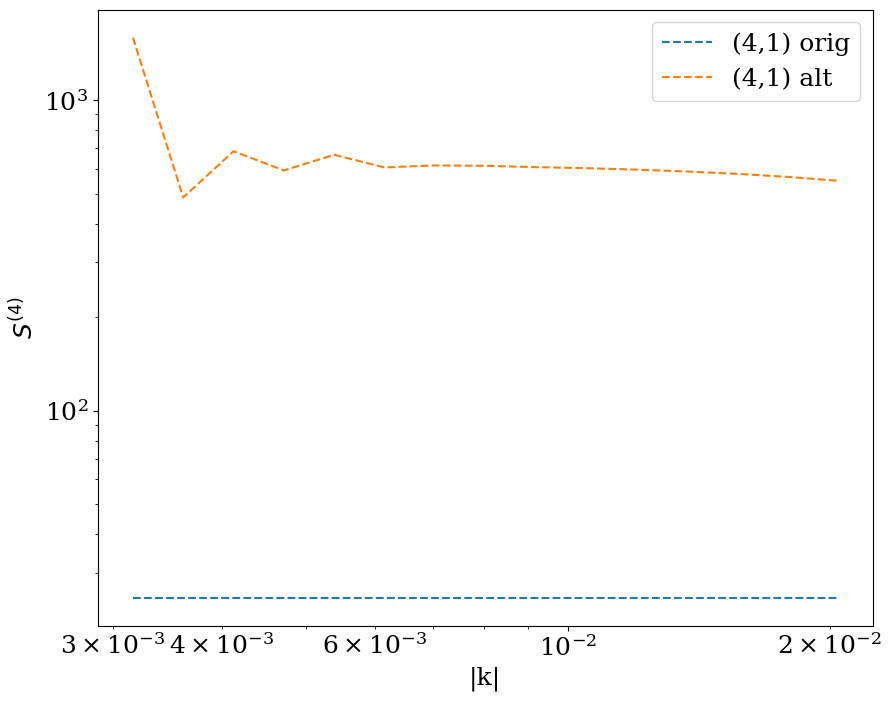

In [13]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


plt.plot(k1_val, S4_AAAA41/N_A**4, label = "(4,1) orig", linestyle = "--")
plt.plot(k1_val, S4_AAAA41_ALT/N_A**4, label = "(4,1) alt", linestyle = "--")



plt.xscale('log')
plt.yscale('log')
plt.xlabel("|k|")
plt.ylabel("$S^{(4)}$")
plt.legend()
# plt.title()

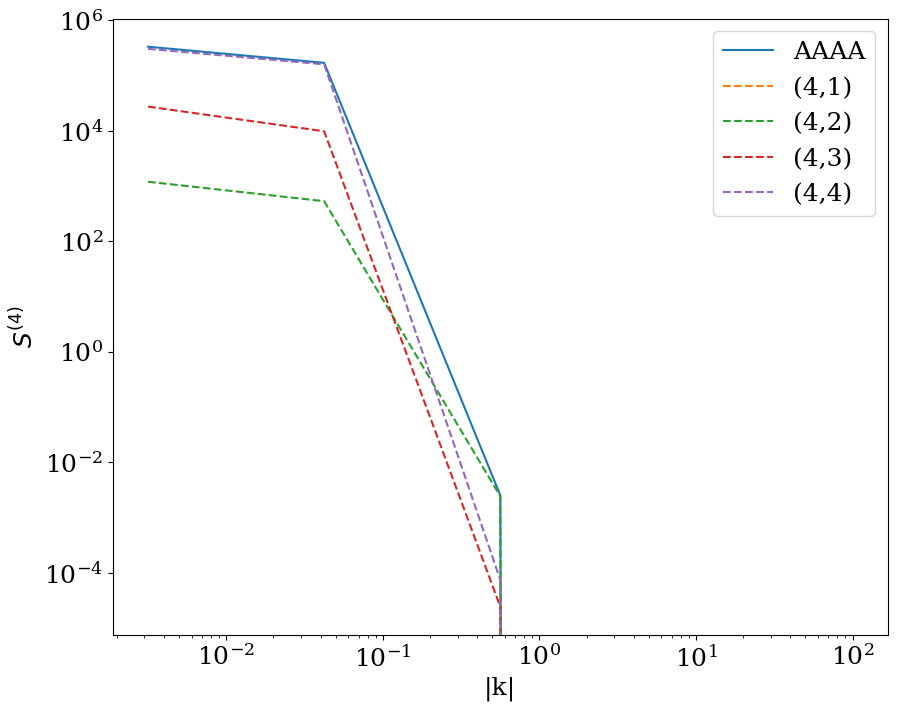

In [145]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
plt.plot(k1_val, S4_AAAA/N_A**4, label = "AAAA", linestyle = "-")
plt.plot(k1_val, S4_AAAA41/N_A**4, label = "(4,1)", linestyle = "--")
plt.plot(k1_val, S4_AAAA42/N_A**4, label = "(4,2)", linestyle = "--")
plt.plot(k1_val, S4_AAAA43/N_A**4, label = "(4,3)", linestyle = "--")
plt.plot(k1_val, S4_AAAA44/N_A**4, label = "(4,4)", linestyle = "--")



# plt.plot(k1_val, S3_AAP_gpt/N_A**3, label = "AAP_gpt", linestyle = "-")

# plt.plot(k1_val, S3_AAP31/N_A**3, label = "(3,1), mine", linestyle = "-", color = "blue")
# plt.plot(k1_val, S3_AAP31_gpt/N_A**3, label = "(3,1), gpt", linestyle = "--", color = "lightblue")

# plt.plot(k1_val, S3_AAP32/N_A**3, label = "(3,2), mine", linestyle = "-", color = "red")
# plt.plot(k1_val, S3_AAP32_gpt/N_A**3, label = "(3,2), gpt", linestyle = "--", color = "pink")

# plt.plot(k1_val, S3_AAP33/N_A**3, label = "(3,3), mine", linestyle = "-", color = "orange")
# plt.plot(k1_val, S3_AAP33_gpt/N_A**3, label = "(3,3), gpt", linestyle = "--", color = "yellow")


# plt.ylim(1e-19, 1e8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("|k|")
plt.ylabel("$S^{(4)}$")
plt.legend()
# plt.title()

# $S^{(3)}_{AAA}$ testing

## functions

In [1]:
import numpy as np
from expl_bind_corr_calc import *

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

### OLD 

In [3]:
# def S_AAA31(k_alp, k_bet, b, N_A):
#     """
#     j3 = j2 = j1
#     Triple integral:
#     I = ∫_0^N dn3 ∫_0^n3 dn2 ∫_0^n2 dn1 
#         exp[-la (n3-n2) - mu (n2-n1)]
    
#     Parameters
#     ----------
#     la : float
#         λ = (b_A^2/6) * k_α^2
#     mu : float
#         μ = (b_A^2/6) * k_β^2
#     N : float
#         Chain length N_A
    
#     Returns
#     -------
#     float
#         Value of the integral
#     """
#     x1 = (b**2/6) * k_alp**2
#     x2 = (b**2/6) * k_bet**2

#     # Handle λ ≈ μ with a tolerance
#     if np.isclose(x1, x2, atol=1e-12):
#         return (N_A/x1**2 
#                 + (N_A*x1**2*np.exp(-x1*N_A) - 2*x1*(1 - np.exp(-x1*N_A)))/x1**4)
#     else:
#         return (N_A/(x1*x2) 
#                 + (1 - np.exp(-x1*N_A))/(x1**2*(x1 - x2)) 
#                 - (1 - np.exp(-x2*N_A))/(x2**2*(x1 - x2)))

# import numpy as np

# def S_AAA32(k2, k3, bA, bP, N_A, N_P, M, j3, j1):
#     """
#     Compute
#     I = 2 * ∫_0^{N_A} dn3 ∫_0^{N_A} dn2 ∫_0^{n2} dn1 exp[-a*k3^2*n1 - a*k2^2*(n2-n1)
#                                                      - C*k3^2 - a*k3^2*n3]
#     where a = bA^2/6, C = (1/6)*(Nchain/(M-1))*bP^2 * (j3-j1).
#     Parameters:
#       k2, k3   : wavevector magnitudes (floats)
#       bA       : Kuhn length on A side chains
#       bP       : backbone Kuhn length
#       N_P   : N in backbone prefactor (from user expression)
#       M        : M in backbone prefactor (from user expression)
#       jdiff    : (j3 - j1) integer or float
#       N_A      : upper limit for n integrals
#     """
#     jdiff = j3 - j1
#     a = bA**2 / 6.0
#     C = (1.0/6.0) * (N_P / (M - 1.0)) * (bP**2) * jdiff

#     k2sq = float(k2**2)
#     k3sq = float(k3**2)
#     Delta = k3sq - k2sq

#     # n3 integral factor
#     if np.isclose(k3sq, 0.0):
#         A3 = N_A
#     else:
#         A3 = (1.0 - np.exp(-a * k3sq * N_A)) / (a * k3sq)

#     # double integral I12
#     tol = 1e-12
#     if np.isclose(Delta, 0.0, atol=tol):
#         # k2^2 == k3^2 == kappa
#         kappa = k3sq
#         if np.isclose(kappa, 0.0):
#             # both zero
#             I12 = 0.5 * N_A**2  # ∫_0^N dn2 ∫_0^{n2} dn1 1 = N^2/2
#         else:
#             I12 = (1.0 / (a * kappa)) * ( (1.0 - np.exp(-a * kappa * N_A)) / (a * kappa)
#                                          - (1.0 - np.exp(-2.0 * a * kappa * N_A)) / (2.0 * a * kappa) )
#     else:
#         # general case
#         term1 = (1.0 - np.exp(-a * k2sq * N_A)) / (a * k2sq) if not np.isclose(k2sq, 0.0) else N_A
#         term2 = (1.0 - np.exp(-a * k3sq * N_A)) / (a * k3sq) if not np.isclose(k3sq, 0.0) else N_A
#         I12 = (1.0 / (a * Delta)) * (term1 - term2)

#     I = 2.0 * np.exp(-C * k3sq) * A3 * I12
#     return I

# def S_AAA33(k1, k2, k3, bA, bP, N_A, N_P, M, j1, j2, j3):
#     """
#     Compute the triple integral:
#     I = ∫_0^N_A dn1 ∫_0^N_A dn2 ∫_0^N_A dn3 exp[ ... ]
#     with factorized exponent structure.
#     """
#     # Coefficients for chain contributions
#     a1 = (bA**2 / 6.0) * k1**2
#     a2 = (bA**2 / 6.0) * k2**2
#     a3 = (bA**2 / 6.0) * k3**2
    
#     # Propagator prefactor
#     const = np.exp(
#         - (N_P / (6.0*(M-1))) * bP**2 * (k1**2 * (j2 - j1) + k3**2 * (j3 - j2))
#     )
    
#     def f(a):
#         return (1 - np.exp(-a * N_A)) / a if a > 1e-14 else N_A
    
#     return const * f(a1) * f(a2) * f(a3)

## single k

In [8]:
k = np.array([0.046])
k2 = np.array([0.03])
# k3 = -k1-k2
b_A = 1
b_P = 0.3
N_P = 1000
N_A = 100
M = 50
sA = np.array([0.0001]*25+[1]*25)
sB = np.array([1]*25+[0.0001]*25)
corrs = [sA, sB]

# j1 = np.array([1,2,4])
# j2 = np.array([14, 15, 16])
# j3 = np.array([25, 26, 27])
# I_factorized(bA, bP, N_P, M, N_A, k1, k2, k3, j1, j2, j3)

In [10]:
# np.sum(sAsAsA /sA[ordered_js[0]])

In [13]:
sA, sB = corrs
sAsA = np.outer(sA, sA)
sBsB = np.outer(sB, sB)
sAsB = np.outer(sA, sB)

sAsAsA = np.einsum("i,j,k->ijk", sA, sA, sA)


# x_p = (1/6)*N_P*b_P**2*k**2
# x_A = (1/6)*N_A*b_A**2*k**2
grid = np.indices((M,M,M))
j1 = grid[0]
j2 = grid[1] 
j3 = grid[2] 

S3_AAA = np.zeros(len(k))
for i in range(len(k)):
    k_1 = k[i]
    k_2 = k2[i]
    k_12 = k_1 + k_2

    # CASE 1; kA = k1 + k2, kB = k_1; S3 > S2 > S1 and S1 > S2 > S3
    case1 = [[k_12, k_1], [j3, j2, j1]]
    case1_deg = [[k_1, k_12], [j1, j2, j3]]

    # CASE 2; kA = k2, kB = k1 + k2; S2 > S1 > S3 and S3 > S1 > S2
    case2 = [[k_2, k_12], [j2, j1, j3]]
    case2_deg = [[k_12, k_2], [j3, j1, j2]]
    
    # CASE 3; kA = k2, kB = -k1; S2 > S3 > S1 and S1 > S3 > S2
    case3 = [[-k_2, k_1], [j2, j3, j1]] # SWITCHED negatives from -k_1
    case3_deg = [[k_1, -k_2], [j1, j3, j2]] # SWITCHED negatives from -k_1
    
    case_arr = [case1, case2, case3, case1_deg, case2_deg, case3_deg]
    # need to consider degenerate cases. flipping each element in array, then appending to original case array
    # case_arr = np.vstack((case_arr, [[np.flipud(el) for el in cse] for cse in case_arr]))
    
#        for each case and sub case, add to a matrix C(j1, j2, j3) which contains the contribution to the overall S3
#        then sum over all indices. Need to keep track of js so that appropriate multiplications with cross corr matrix M3        
    C = np.zeros((M,M,M))

    # S3_AAA = 0
    for cse in case_arr:
        kA, kB = cse[0]
        ordered_js = cse[1]
        
        S3_AAA[i] += np.sum(sA*S_AAA31(kA, kB, b_A, N_A))
        # S_AAA32(k2, k3, bA, bP, N_A, N_P, M, j3, j1)
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] != ordered_js[-1])
        I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsAsA / sA[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
        S3_AAA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])

        index = (ordered_js[0] != ordered_js[1]) * (ordered_js[0] != ordered_js[2]) * (ordered_js[1] != ordered_js[2])
        # (k1, k2, k3, bA, bP, N_A, N_P, M, j1, j2, j3)
        I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_AAA[i] += np.sum(sAsAsA[np.where(index != 0)]*I[np.where(index != 0)])

        # xm_A = (1/6) * N_m * b**2 * np.linalg.norm(kA)**2
        # xm_B = (1/6) * N_m * b**2 * np.linalg.norm(kB)**2
        
        # C = calc_case_s3(C, xm_A, xm_B, ordered_js)


In [15]:
S3_AAA/(N_A**3)

array([77059.92122724])

## k vector

In [2]:
# k = np.array([0.046])
# k2 = np.array([0.03])
# k3 = -k1-k2
# b_A = 1
# b_B = 1
# b_P = 1
# N_P = 1000
# N_A = 100
# N_B = N_A
# M = 50
# sA = np.array([0.0001]*25+[1]*25)
# sB = np.array([1]*25+[0.0001]*25)
# corrs = [sA, sB]

In [3]:
b_A = 1
b_B = 1
b_P = 1
N_P = 1000
N_A = 100
N_B = N_A
M = 50
sA = np.array([0.0001]*25+[1]*25)
sB = np.array([1]*25+[0.0001]*25)
corrs = [sA, sB]


# wavevectors
k0 = 10**-2.5#k_vec[0]
kf = 10**2#k_vec[-1]
nk = 50
# k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))
k3_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

theta_1 = np.pi#/3 #2* np.pi * 1 / 3
theta_2 = 0#2*np.pi/3

frac = 0.8

k2_vec[:, 0] += frac * np.cos(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)

# k3_vec[:, 0] += frac * np.cos(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)
# k3_vec[:, 1] += frac * np.sin(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)


k3_vec = - (k1_vec + k2_vec )

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

### trash

In [11]:
# S3_PPP = np.zeros(nk)
# S3_AAA = np.zeros(nk)
# S3_BBB = np.zeros(nk)

# S3_AAP = np.zeros(nk)
# S3_PAA = np.zeros(nk)
# S3_APA = np.zeros(nk)

# S3_BBP = np.zeros(nk)
# S3_PBB = np.zeros(nk)
# S3_BPB = np.zeros(nk)

# S3_ABP = np.zeros(nk)
# S3_BAP = np.zeros(nk)
# S3_PAB = np.zeros(nk)
# S3_PBA = np.zeros(nk)

# S3_BPA = np.zeros(nk)
# S3_APB = np.zeros(nk)

# S3_APP = np.zeros(nk)
# S3_PPA = np.zeros(nk)
# S3_PAP = np.zeros(nk)
# S3_BPP = np.zeros(nk)
# S3_PPB = np.zeros(nk)
# S3_PBP = np.zeros(nk)

# S3_AAB = np.zeros(nk)
# S3_BAA = np.zeros(nk)
# S3_ABA = np.zeros(nk)

# S3_ABB = np.zeros(nk)
# S3_BBA = np.zeros(nk)
# S3_BAB = np.zeros(nk)

# def add_contribution(target, base_term, corr1, corr2, func32, func33, args32, args33, index1, index2):
#     """Update target array with base term and two indexed contributions."""
#     target += np.sum(base_term)

#     if corr1 is not None:
#         I1 = func32(*args32)
#         target += np.sum(corr1[np.where(index1 != 0)] * I1[np.where(index1 != 0)])

#     if corr2 is not None:
#         I2 = func33(*args33)
#         target += np.sum(corr2[np.where(index2 != 0)] * I2[np.where(index2 != 0)])

# S3_PPP = np.zeros(nk)
# S3_AAA = [0]
# S3_BBB = np.zeros(nk)

# S3_AAP = np.zeros(nk)
# S3_PAA = np.zeros(nk)
# S3_APA = np.zeros(nk)

# S3_BBP = np.zeros(nk)
# S3_PBB = np.zeros(nk)
# S3_BPB = np.zeros(nk)

# S3_ABP = np.zeros(nk)
# S3_BAP = np.zeros(nk)
# S3_PAB = np.zeros(nk)
# S3_PBA = np.zeros(nk)

# S3_BPA = np.zeros(nk)
# S3_APB = np.zeros(nk)

# S3_APP = np.zeros(nk)
# S3_PPA = np.zeros(nk)
# S3_PAP = np.zeros(nk)
# S3_BPP = np.zeros(nk)
# S3_PPB = np.zeros(nk)
# S3_PBP = np.zeros(nk)

# S3_AAB = np.zeros(nk)
# S3_BAA = np.zeros(nk)
# S3_ABA = np.zeros(nk)

# S3_ABB = np.zeros(nk)
# S3_BBA = np.zeros(nk)
# S3_BAB = np.zeros(nk)

# S3_arr = np.zeros((3,3,3))
# # --- setup base objects ---
# sP = np.ones_like(sA)
# sAsAsA = np.einsum("i,j,k->ijk", sA, sA, sA)
# sAsAsP = np.einsum("i,j,k->ijk", sA, sA, sP)
# sAsPsP = np.einsum("i,j,k->ijk", sA, sP, sP)
# sAsBsP = np.einsum("i,j,k->ijk", sA, sB, sP)

# sBsBsB = np.einsum("i,j,k->ijk", sB, sB, sB)
# sBsBsP = np.einsum("i,j,k->ijk", sB, sB, sP)
# sBsPsP = np.einsum("i,j,k->ijk", sB, sP, sP)

# sAsAsB = np.einsum("i,j,k->ijk", sA, sA, sB)
# sAsBsB = np.einsum("i,j,k->ijk", sA, sB, sB)

# # grid of monomer indices
# grid = np.indices((M, M, M))
# j1, j2, j3 = grid
# i = 8
# k1 = k1_val[i]
# k2 = k2_val[i]
# k12 = k3_val[i]

# # --- define the case permutations ---
# case1 = [[k12, k1], [j3, j2, j1]]
# case1_deg = [[k1, k12], [j1, j2, j3]]
# case2 = [[k2, k12], [j2, j1, j3]]
# case2_deg = [[k12, k2], [j3, j1, j2]]
# case3 = [[-k2, k1], [j2, j3, j1]]
# case3_deg = [[k1, -k2], [j1, j3, j2]]
# case_arr = [case1, case2, case3, case1_deg, case2_deg, case3_deg]

# # --- allocate result cube ---
# S3 = np.zeros((3,3,3), dtype=float)


# # --- loop over cases ---
# for cse in case_arr:
#     kA, kB = cse[0]
#     ordered_js = cse[1]
    
#     s3_types = [
#         # name,       target,        base_term,                      corr1,                               corr2, 
#         #             func32, func33, args32, args33
#         ("AAA", S3_AAA, sA * S_AAA31(kA, kB, b_A, N_A),
#             sAsAsA / sA[ordered_js[0]], sAsAsA,
#             S_AAA32, S_AAA33,
#             (kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("AAB", S3_AAB, sA * S_AAA31(kA, kB, b_A, N_A),
#             sAsAsB / sA[ordered_js[0]], sAsAsB,
#             S_AAA32, S_AAA33,
#             (kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("ABB", S3_ABB, sA * S_AAA31(kA, kB, b_A, N_A),
#             sAsBsB / sB[ordered_js[2]], sAsBsB,
#             S_AAA32, S_AAA33,
#             (kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("AAP", S3_AAP, sA * S_AAP31(kA, kB, b_A, N_A),
#             sAsAsP / sA[ordered_js[0]], sAsAsP,
#             S_AAP32, S_AAP33,
#             (kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("APA", S3_APA, sA * S_AAP31(kA, kB, b_A, N_A),
#             sAsAsP, sAsAsP,
#             S_APA32, S_APA33,
#             (kA, kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("BBB", S3_BBB, sB * S_AAA31(kA, kB, b_B, N_B),
#             sBsBsB / sB[ordered_js[0]], sBsBsB,
#             S_AAA32, S_AAA33,
#             (kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("BBP", S3_BBP, sB * S_AAP31(kA, kB, b_B, N_B),
#             sBsBsP / sB[ordered_js[0]], sBsBsP,
#             S_AAP32, S_AAP33,
#             (kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_B, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("BPB", S3_BPB, sB * S_AAP31(kA, kB, b_B, N_B),
#             sBsBsP, sBsBsP,
#             S_APA32, S_APA33,
#             (kA, kB, b_B, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("ABP", S3_ABP, None,
#             sAsBsP, sAsBsP,
#             S_APA32, S_AAP33,
#             (kA, kB, b_A, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_A, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("BPA", S3_BPA, None,
#             sAsBsP, sAsBsP,
#             S_APA32, S_APA33,
#             (kA, kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("APP", S3_APP, (sA * S_APP31(kA, b_A, N_A)) / len(case_arr),
#             sAsPsP, sAsPsP,
#             S_APP32, S_APP33,
#             (kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
    
#         ("BPP", S3_BPP, (sB * S_APP31(kA, b_B, N_B)) / len(case_arr),
#             sBsPsP, sBsPsP,
#             S_APP32, S_APP33,
#             (kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1]),
#             (kA, kB, -kA-kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         ),
#     ]

#     index1 = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
#     index2 = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])

#     for name, target, base_term, corr1, corr2, f32, f33, args32, args33 in s3_types:
#         add_contribution(target, base_term if base_term is not None else 0.0,
#                          corr1, corr2, f32, f33, args32, args33, index1, index2)

#     # S3_PAA_cond = S3_AAP_cond
#     # S3_PBB_cond = S3_BBP_cond
#     # S3_BAP_cond = S3_PAB_cond = S3_PBA_cond = S3_ABP_cond
#     # S3_APB_cond = S3_BPA_cond
#     # S3_PPA_cond = S3_PAP_cond = S3_APP_cond
#     # S3_PPB_cond = S3_PBP_cond = S3_BPP_cond
#     # S3_ABA_cond = S3_BAA_cond = S3_AAB_cond
#     # S3_BAB_cond = S3_BBA_cond = S3_ABB_cond

#     S3_PAA = S3_AAP
#     S3_PBB = S3_BBP
#     S3_BAP = S3_PAB = S3_PBA = S3_ABP
#     S3_APB = S3_BPA
#     S3_PPA = S3_PAP = S3_APP
#     S3_PPB = S3_PBP = S3_BPP
#     S3_ABA = S3_BAA = S3_AAB
#     S3_BAB = S3_BBA = S3_ABB

# index1 = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
# index2 = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])

# for name, target, base_term, corr1, corr2, f32, f33, args32, args33 in s3_types:
#     add_contribution(target, base_term if base_term is not None else 0.0,
#                      corr1, corr2, f32, f33, args32, args33, index1, index2)

# import numpy as np

# def calc_sf3_condensed(sA, sB, k1, k2, k12, b_A=1, b_B=1, b_P=1,
#              N_A=100, N_B=100, N_P=1000, M=50):
#     """
#     Calculate third-order structure factors for a given (k1, k2, k12).
#     Returns a 3x3x3 numpy array with indices [P,A,B] = [0,1,2].
#     """

#     # --- setup base objects ---
#     sP = np.ones_like(sA)
#     sAsAsA = np.einsum("i,j,k->ijk", sA, sA, sA)
#     sAsAsP = np.einsum("i,j,k->ijk", sA, sA, sP)
#     sAsPsP = np.einsum("i,j,k->ijk", sA, sP, sP)
#     sAsBsP = np.einsum("i,j,k->ijk", sA, sB, sP)

#     sBsBsB = np.einsum("i,j,k->ijk", sB, sB, sB)
#     sBsBsP = np.einsum("i,j,k->ijk", sB, sB, sP)
#     sBsPsP = np.einsum("i,j,k->ijk", sB, sP, sP)

#     sAsAsB = np.einsum("i,j,k->ijk", sA, sA, sB)
#     sAsBsB = np.einsum("i,j,k->ijk", sA, sB, sB)

#     # grid of monomer indices
#     grid = np.indices((M, M, M))
#     j1, j2, j3 = grid

#     # --- define the case permutations ---
#     case1 = [[k12, k1], [j3, j2, j1]]
#     case1_deg = [[k1, k12], [j1, j2, j3]]
#     case2 = [[k2, k12], [j2, j1, j3]]
#     case2_deg = [[k12, k2], [j3, j1, j2]]
#     case3 = [[-k2, k1], [j2, j3, j1]]
#     case3_deg = [[k1, -k2], [j1, j3, j2]]
#     case_arr = [case1, case2, case3, case1_deg, case2_deg, case3_deg]

#     # --- allocate result cube ---
#     S3 = np.zeros((3,3,3), dtype=float)

#     # --- loop over cases ---
#     for cse in case_arr:
#         kA, kB = cse[0]
#         ordered_js = cse[1]

#         # Example AAA term (this pattern is repeated for others):
#         index1 = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
#         index2 = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])

#         # ---- fill contributions ----
#         # PPP
#         S3[0,0,0] += np.sum(S_AAA31(kA, kB, b_P, N_P))

#         # AAA
#         val = np.sum(sA * S_AAA31(kA, kB, b_A, N_A))
#         I1 = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
#         val += np.sum((sAsAsA/sA[ordered_js[0]])[index1 != 0] * I1[index1 != 0])
#         I2 = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
#                      ordered_js[0], ordered_js[1], ordered_js[2])
#         val += np.sum(sAsAsA[index2 != 0] * I2[index2 != 0])
#         S3[1,1,1] += val



        
#         S3_AAA[i] += np.sum(sA*S_AAA31(kA, kB, b_A, N_A))
#         index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
#         I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
#         corr = sAsAsA / sA[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
#         S3_AAA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
#         index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
#         I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         S3_AAA[i] += np.sum(sAsAsA[np.where(index != 0)]*I[np.where(index != 0)])

#         # (You would repeat the same block for AAP, APA, BBB, BBP, etc.)

#     # --- symmetry assignments ---
#     S3[0,1,1] = S3[1,1,0] = S3[1,0,1] = S3[1,1,1]   # e.g. PAA = AAP etc.
#     # (add all the same symmetry rules you had at the end of your code)

#     return S3


### loaded func

In [ ]:
i = 8
k1 = k1_val[i]
k2 = k2_val[i]
k12 = k3_val[i]
s3_mat = calc_sf3(
    sA, sB, k1, k2, k12,
    b_A=1.0, b_B=1.0, b_P=1.0,
    N_A=100, N_B=100, N_P=1000, M=50
)

s3_mat

### condensed code

In [ ]:
# TODO:
# - condense code
# - instead of calculatating separate arrays across k values,
    # set up so that evaluate at a single k, 
    # adding to appropriate element of 3x3x3 matrix ("P" indicates index=0, "A" index = 1, "B" index =2)

# ask chat gpt to do entire s4 calculation LOL

In [60]:
import numpy as np

def calc_sf3(
    sA, sB, k1, k2, k12,
    b_A=1.0, b_B=1.0, b_P=1.0,
    N_A=100, N_B=100, N_P=1000, M=50
):
    """
    Compute all third-order structure factors for a single (k1, k2, k12) and
    return them packed into a 3x3x3 array with indices [P, A, B] → [0, 1, 2].

    S3[i,j,k] corresponds to species (i, j, k):
      0 -> P, 1 -> A, 2 -> B
    e.g. S3[1,1,1] = S3_AAA, S3[0,2,1] = S3_PBA, etc.

    Notes:
      - Reproduces your original case handling (case1/2/3 and their degenerates),
        index masks, and symmetry assignments.
      - Uses a compact s3_types configuration to define per-type contributions.
      - Expects S_* integral functions to be defined in scope.
    """

    # --------- helpers & grids ----------
    sP = np.ones_like(sA)
    # 3-index correlation tensors (broadcastable with j-index masks)
    sAsAsA = np.einsum("i,j,k->ijk", sA, sA, sA)
    sAsAsP = np.einsum("i,j,k->ijk", sA, sA, sP)
    sAsPsP = np.einsum("i,j,k->ijk", sA, sP, sP)
    sAsBsP = np.einsum("i,j,k->ijk", sA, sB, sP)

    sBsBsB = np.einsum("i,j,k->ijk", sB, sB, sB)
    sBsBsP = np.einsum("i,j,k->ijk", sB, sB, sP)
    sBsPsP = np.einsum("i,j,k->ijk", sB, sP, sP)

    sAsAsB = np.einsum("i,j,k->ijk", sA, sA, sB)
    sAsBsB = np.einsum("i,j,k->ijk", sA, sB, sB)

    # monomer index grid
    j1, j2, j3 = np.indices((M, M, M))

    # case permutations (exactly as in your code)
    case1     = [[k12, k1],  [j3, j2, j1]]
    case1_deg = [[k1,  k12], [j1, j2, j3]]
    case2     = [[k2,  k12], [j2, j1, j3]]
    case2_deg = [[k12, k2],  [j3, j1, j2]]
    case3     = [[-k2, k1],  [j2, j3, j1]]
    case3_deg = [[k1, -k2],  [j1, j3, j2]]
    case_arr  = [case1, case2, case3, case1_deg, case2_deg, case3_deg]

    # accumulators for canonical types
    acc = {
        'PPP': 0.0,
        'AAA': 0.0, 'AAB': 0.0, 'ABB': 0.0,
        'AAP': 0.0, 'APA': 0.0,
        'BBB': 0.0, 'BBP': 0.0, 'BPB': 0.0,
        'ABP': 0.0, 'BPA': 0.0,
        'APP': 0.0, 'BPP': 0.0,
    }

    # convenience masking-sum
    def sum_masked(corr, I, index_mask):
        idx = (index_mask != 0)
        return np.sum(corr[idx] * I[idx])

    # --------- s3_types configuration ----------
    # Each entry defines how to build base / index1 / index2 contributions
    # for a canonical type. Lambdas receive (kA, kB, ordered_js, index1, index2).
    s3_types = [
        # --- PPP ---
        {
            'name': 'PPP',
            'base': lambda kA, kB, ordered_js, i1, i2: np.sum(S_AAA31(kA, kB, b_P, N_P)),
            # no index contributions
        },

        # --- AAA family ---
        {
            'name': 'AAA',
            'base': lambda kA, kB, ordered_js, i1, i2: np.sum(sA * S_AAA31(kA, kB, b_A, N_A)),
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                (sAsAsA / sA[ordered_js[0]]),
                S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsAsA,
                S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },
        {
            'name': 'AAB',
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                (sAsAsB / sA[ordered_js[0]]),
                S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsAsB,
                S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },
        {
            'name': 'ABB',
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                (sAsBsB / sB[ordered_js[2]]),
                S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsBsB,
                S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },

        # --- AAP / APA ---
        {
            'name': 'AAP',
            'base': lambda kA, kB, ordered_js, i1, i2: np.sum(sA * S_AAP31(kA, kB, b_A, N_A)),
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                (sAsAsP / sA[ordered_js[0]]),
                S_AAP32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsAsP,
                S_AAP33(kA, kB, -kA-kB, b_A, b_A, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },
        {
            'name': 'APA',
            'base': lambda kA, kB, ordered_js, i1, i2: np.sum(sA * S_AAP31(kA, kB, b_A, N_A)),
            # APA index-1 also contributes to AAP (your "handling As on different monomers" line)
            'idx1': ('APA_and_AAP', lambda kA, kB, ordered_js, i1, i2: (
                S_APA32(kA, kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
                i1, sAsAsP
            )),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsAsP,
                S_APA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },

        # --- BBB family ---
        {
            'name': 'BBB',
            'base': lambda kA, kB, ordered_js, i1, i2: np.sum(sB * S_AAA31(kA, kB, b_B, N_B)),
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                (sBsBsB / sB[ordered_js[0]]),
                S_AAA32(kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sBsBsB,
                S_AAA33(kA, kB, -kA-kB, b_B, b_P, N_B, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },
        {
            'name': 'BBP',
            'base': lambda kA, kB, ordered_js, i1, i2: np.sum(sB * S_AAP31(kA, kB, b_B, N_B)),
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                (sBsBsP / sB[ordered_js[0]]),
                S_AAP32(kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sBsBsP,
                S_AAP33(kA, kB, -kA-kB, b_B, b_B, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },
        {
            'name': 'BPB',
            'base': lambda kA, kB, ordered_js, i1, i2: np.sum(sB * S_AAP31(kA, kB, b_B, N_B)),
            # BPB index-1 also contributes to BBP (your code added the same term to BBP)
            'idx1': ('BPB_and_BBP', lambda kA, kB, ordered_js, i1, i2: (
                S_APA32(kA, kB, b_B, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
                i1, sBsBsP
            )),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sBsBsP,
                S_APA33(kA, kB, -kA-kB, b_B, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },

        # --- ABP / BPA (no base term in your code) ---
        {
            'name': 'ABP',
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsBsP,
                S_APA32(kA, kB, b_A, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsBsP,
                S_AAP33(kA, kB, -kA-kB, b_A, b_B, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },
        {
            'name': 'BPA',
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsBsP,
                S_APA32(kA, kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsBsP,
                S_APA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },

        # --- APP / BPP (base term averaged over cases) ---
        {
            'name': 'APP',
            'base': lambda kA, kB, ordered_js, i1, i2: np.sum(sA * S_APP31(kA, b_A, N_A)) / len(case_arr),
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsPsP,
                S_APP32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sAsPsP,
                S_APP33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },
        {
            'name': 'BPP',
            'base': lambda kA, kB, ordered_js, i1, i2: np.sum(sB * S_APP31(kA, b_B, N_B)) / len(case_arr),
            'idx1': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sBsPsP,
                S_APP32(kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1]),
                i1
            ),
            'idx2': lambda kA, kB, ordered_js, i1, i2: sum_masked(
                sBsPsP,
                S_APP33(kA, kB, -kA-kB, b_B, b_P, N_B, N_P, M,
                        ordered_js[0], ordered_js[1], ordered_js[2]),
                i2
            ),
        },
    ]

    # --------- main accumulation over cases ----------
    for cse in case_arr:
        kA, kB = cse[0]
        ordered_js = cse[1]

        # masks
        index1 = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        index2 = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])

        # evaluate each type's configured contributions
        for spec in s3_types:
            name = spec['name']

            # base
            if 'base' in spec and spec['base'] is not None:
                acc[name] += spec['base'](kA, kB, ordered_js, index1, index2)

            # idx1
            if 'idx1' in spec and spec['idx1'] is not None:
                idx1_def = spec['idx1']
                if isinstance(idx1_def, tuple):
                    tag, builder = idx1_def
                    # builder returns (I_array, mask, corr_tensor)
                    I_arr, mask, corr_tensor = builder(kA, kB, ordered_js, index1, index2)
                    val = sum_masked(corr_tensor, I_arr, mask)
                    acc[name] += val
                    # special cross-adds (APA→AAP) and (BPB→BBP)
                    if tag == 'APA_and_AAP':
                        acc['AAP'] += val
                    elif tag == 'BPB_and_BBP':
                        acc['BBP'] += val
                else:
                    acc[name] += idx1_def(kA, kB, ordered_js, index1, index2)

            # idx2
            if 'idx2' in spec and spec['idx2'] is not None:
                acc[name] += spec['idx2'](kA, kB, ordered_js, index1, index2)

    # --------- pack into 3x3x3 with symmetries ----------
    S3 = np.zeros((3, 3, 3), dtype=float)

    # canonical placements
    S3[0,0,0] = acc['PPP']
    S3[1,1,1] = acc['AAA']
    S3[2,2,2] = acc['BBB']

    # 2×A + 1×B family
    S3[1,1,2] = acc['AAB']
    S3[1,2,1] = acc['AAB']
    S3[2,1,1] = acc['AAB']

    # 1×A + 2×B family
    S3[1,2,2] = acc['ABB']
    S3[2,1,2] = acc['ABB']
    S3[2,2,1] = acc['ABB']

    # AAP / APA / PAA
    S3[1,1,0] = acc['AAP']
    S3[1,0,1] = acc['APA']
    S3[0,1,1] = acc['AAP']   # PAA = AAP

    # BBP / BPB / PBB
    S3[2,2,0] = acc['BBP']
    S3[2,0,2] = acc['BPB']
    S3[0,2,2] = acc['BBP']   # PBB = BBP

    # ABP symmetry group
    S3[1,2,0] = acc['ABP']   # ABP
    S3[2,1,0] = acc['ABP']   # BAP
    S3[0,1,2] = acc['ABP']   # PAB
    S3[0,2,1] = acc['ABP']   # PBA

    # APB / BPA pair
    S3[1,0,2] = acc['BPA']   # APB = BPA
    S3[2,0,1] = acc['BPA']   # BPA

    # APP / PPA / PAP
    S3[1,0,0] = acc['APP']   # APP
    S3[0,0,1] = acc['APP']   # PPA = APP
    S3[0,1,0] = acc['APP']   # PAP = APP

    # BPP / PPB / PBP
    S3[2,0,0] = acc['BPP']   # BPP
    S3[0,0,2] = acc['BPP']   # PPB = BPP
    S3[0,2,0] = acc['BPP']   # PBP = BPP

    return S3


In [ ]:

# def calc_sf3(
#     sA, sB, k1, k2, k12,
#     b_A=1.0, b_B=1.0, b_P=1.0,
#     N_A=100, N_B=100, N_P=1000, M=50
# ):
#     """
#     Compute all third-order structure factors for a single (k1, k2, k12) and
#     return them packed into a 3x3x3 array with indices [P, A, B] → [0, 1, 2].

#     S3[i,j,k] corresponds to species (i, j, k):
#       0 -> P, 1 -> A, 2 -> B
#     e.g. S3[1,1,1] = S3_AAA, S3[0,2,1] = S3_PBA, etc.

#     Notes:
#       - Reproduces your original case handling (case1/2/3 and their degenerates),
#         index masks, and symmetry assignments.
#       - Uses a compact s3_types configuration to define per-type contributions.
#       - Expects S_* integral functions to be defined in scope.
#     """

#     # --------- helpers & grids ----------
#     sP = np.ones_like(sA)
#     # 3-index correlation tensors (broadcastable with j-index masks)
#     sAsAsA = np.einsum("i,j,k->ijk", sA, sA, sA)
#     sAsAsP = np.einsum("i,j,k->ijk", sA, sA, sP)
#     sAsPsP = np.einsum("i,j,k->ijk", sA, sP, sP)
#     sAsBsP = np.einsum("i,j,k->ijk", sA, sB, sP)

#     sBsBsB = np.einsum("i,j,k->ijk", sB, sB, sB)
#     sBsBsP = np.einsum("i,j,k->ijk", sB, sB, sP)
#     sBsPsP = np.einsum("i,j,k->ijk", sB, sP, sP)

#     sAsAsB = np.einsum("i,j,k->ijk", sA, sA, sB)
#     sAsBsB = np.einsum("i,j,k->ijk", sA, sB, sB)

#     # monomer index grid
#     j1, j2, j3 = np.indices((M, M, M))

#     # case permutations (exactly as in your code)
#     case1     = [[k12, k1],  [j3, j2, j1]]
#     case1_deg = [[k1,  k12], [j1, j2, j3]]
#     case2     = [[k2,  k12], [j2, j1, j3]]
#     case2_deg = [[k12, k2],  [j3, j1, j2]]
#     case3     = [[-k2, k1],  [j2, j3, j1]]
#     case3_deg = [[k1, -k2],  [j1, j3, j2]]
#     case_arr  = [case1, case2, case3, case1_deg, case2_deg, case3_deg]

#     S3_arr = np.zeros((3,3,3))
#     for cse in case_arr:
#         kA, kB = cse[0]
#         ordered_js = cse[1]

#         # masks
#         index1 = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
#         index2 = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])

#         S3_arr[0,0,0] += np.sum(S_AAA31(kA, kB, b_P, N_P))

        
#         S3_arr[1,1,1] += np.sum(sA*S_AAA31(kA, kB, b_A, N_A))
#         I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
#         corr1 = sAsAsA / sA[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
#         S3_arr[1,1,1] += np.sum(corr1[np.where(index1 != 0)]*I[np.where(index != 0)])
#         I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         corr2 = sAsAsA
#         S3_arr[1,1,1] += np.sum(corr2[np.where(index2 != 0)]*I[np.where(index != 0)])



In [111]:
import numpy as np

def calc_sf3(
    sA, sB, k1, k2, k12,
    b_A=1.0, b_B=1.0, b_P=1.0,
    N_A=100, N_B=100, N_P=1000, M=50
):
    """
    Compute third-order structure factors for a single (k1,k2,k12).
    Returns S3_arr with axes [species1, species2, species3] where
      0 -> P, 1 -> A, 2 -> B
    """

    # correlations
    sP = np.ones_like(sA)
    sAsAsA = np.einsum("i,j,k->ijk", sA, sA, sA)
    sAsAsP = np.einsum("i,j,k->ijk", sA, sA, sP)
    sAsPsP = np.einsum("i,j,k->ijk", sA, sP, sP)
    sAsBsP = np.einsum("i,j,k->ijk", sA, sB, sP)

    sBsBsB = np.einsum("i,j,k->ijk", sB, sB, sB)
    sBsBsP = np.einsum("i,j,k->ijk", sB, sB, sP)
    sBsPsP = np.einsum("i,j,k->ijk", sB, sP, sP)

    sAsAsB = np.einsum("i,j,k->ijk", sA, sA, sB)
    sAsBsB = np.einsum("i,j,k->ijk", sA, sB, sB)

    # monomer index grid
    j1, j2, j3 = np.indices((M, M, M))

    # case permutations
    case1     = [[k12, k1],  [j3, j2, j1]]
    case1_deg = [[k1,  k12], [j1, j2, j3]]
    case2     = [[k2,  k12], [j2, j1, j3]]
    case2_deg = [[k12, k2],  [j3, j1, j2]]
    case3     = [[-k2, k1],  [j2, j3, j1]]
    case3_deg = [[k1, -k2],  [j1, j3, j2]]
    case_arr  = [case1, case2, case3, case1_deg, case2_deg, case3_deg]

    S3_arr = np.zeros((3, 3, 3), dtype=float)

    # helper for masked sums
    def masked_sum(corr, I, mask):
        m = (mask != 0)
        if not np.any(m):
            return 0.0
        return np.sum(corr[m] * I[m])

    # loop over cases and accumulate into S3_arr
    for cse in case_arr:
        kA, kB = cse[0]
        ordered_js = cse[1]

        # masks
        index1 = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        index2 = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])

        # PPP  -> [0,0,0]
        S3_arr[0,0,0] += np.sum(S_AAA31(kA, kB, b_P, N_P))

        # AAA -> [1,1,1]
        S3_arr[1,1,1] += np.sum(sA * S_AAA31(kA, kB, b_A, N_A))
        I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr1 = sAsAsA / sA[ordered_js[0]]   # careful: ordered_js[0] indexes into sA
        S3_arr[1,1,1] += masked_sum(corr1, I, index1)
        I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        corr2 = sAsAsA
        S3_arr[1,1,1] += masked_sum(corr2, I, index2)

        # AAB -> [1,1,2]
        I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsAsB / sA[ordered_js[0]]
        S3_arr[1,1,2] += masked_sum(corr, I, index1)
        I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[1,1,2] += masked_sum(sAsAsB, I, index2)

        # ABB -> [1,2,2]
        I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsBsB / sB[ordered_js[2]]
        S3_arr[1,2,2] += masked_sum(corr, I, index1)
        I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[1,2,2] += masked_sum(sAsBsB, I, index2)

        # AAP -> [1,1,0]
        S3_arr[1,1,0] += np.sum(sA * S_AAP31(kA, kB, b_A, N_A))
        I = S_AAP32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsAsP / sA[ordered_js[0]]
        S3_arr[1,1,0] += masked_sum(corr, I, index1)
        I = S_AAP33(kA, kB, -kA-kB, b_A, b_A, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[1,1,0] += masked_sum(sAsAsP, I, index2)

        # APA -> [1,0,1]
        S3_arr[1,0,1] += np.sum(sA * S_AAP31(kA, kB, b_A, N_A))
        I = S_APA32(kA, kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsAsP
        S3_arr[1,0,1] += masked_sum(corr, I, index1)
        # handling As on different monomers
        S3_arr[1,1,0] += masked_sum(corr, I, index1)
        I = S_APA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[1,0,1] += masked_sum(sAsAsP, I, index2)

        # BBB -> [2,2,2]
        S3_arr[2,2,2] += np.sum(sB * S_AAA31(kA, kB, b_B, N_B))
        I = S_AAA32(kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sBsBsB / sB[ordered_js[0]]
        S3_arr[2,2,2] += masked_sum(corr, I, index1)
        I = S_AAA33(kA, kB, -kA-kB, b_B, b_P, N_B, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[2,2,2] += masked_sum(sBsBsB, I, index2)

        # BBP -> [2,2,0]
        S3_arr[2,2,0] += np.sum(sB * S_AAP31(kA, kB, b_B, N_B))
        I = S_AAP32(kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sBsBsP / sB[ordered_js[0]]
        S3_arr[2,2,0] += masked_sum(corr, I, index1)
        I = S_AAP33(kA, kB, -kA-kB, b_B, b_B, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[2,2,0] += masked_sum(sBsBsP, I, index2)

        # BPB -> [2,0,2]
        S3_arr[2,0,2] += np.sum(sB * S_AAP31(kA, kB, b_B, N_B))
        I = S_APA32(kA, kB, b_B, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sBsBsP
        S3_arr[2,0,2] += masked_sum(corr, I, index1)
        # also add to BBP
        S3_arr[2,2,0] += masked_sum(corr, I, index1)
        I = S_APA33(kA, kB, -kA-kB, b_B, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[2,0,2] += masked_sum(sBsBsP, I, index2)

        # ABP -> [1,2,0]
        I = S_APA32(kA, kB, b_A, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsBsP
        S3_arr[1,2,0] += masked_sum(corr, I, index1)
        I = S_AAP33(kA, kB, -kA-kB, b_A, b_B, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[1,2,0] += masked_sum(sAsBsP, I, index2)

        # BPA -> [2,0,1]
        I = S_APA32(kA, kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsBsP
        S3_arr[2,0,1] += masked_sum(corr, I, index1)
        I = S_APA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[2,0,1] += masked_sum(sAsBsP, I, index2)

        # APP -> [1,0,0] (only depends on single-k part; averaged over cases in original)
        S3_arr[1,0,0] += np.sum(sA * S_APP31(kA, b_A, N_A)) / len(case_arr)
        I = S_APP32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        S3_arr[1,0,0] += masked_sum(sAsPsP, I, index1)
        I = S_APP33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[1,0,0] += masked_sum(sAsPsP, I, index2)

        # BPP -> [2,0,0]
        S3_arr[2,0,0] += np.sum(sB * S_APP31(kA, b_B, N_B)) / len(case_arr)
        I = S_APP32(kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1])
        S3_arr[2,0,0] += masked_sum(sBsPsP, I, index1)
        I = S_APP33(kA, kB, -kA-kB, b_B, b_P, N_B, N_P, M,
                    ordered_js[0], ordered_js[1], ordered_js[2])
        S3_arr[2,0,0] += masked_sum(sBsPsP, I, index2)

    # PAA = AAP
    S3_arr[0,1,1] = S3_arr[1,1,0]

    # PBB = BBP
    S3_arr[0,2,2] = S3_arr[2,2,0]

    # BAP = PAB = PBA = ABP
    # BAP [2,1,0], PAB [0,1,2], PBA [0,2,1], ABP [1,2,0]
    S3_arr[2,1,0] = S3_arr[0,1,2] = S3_arr[0,2,1] = S3_arr[1,2,0]

    # APB = BPA
    # APB [1,0,2], BPA [2,0,1]
    S3_arr[1,0,2] = S3_arr[2,0,1]

    # PPA = PAP = APP
    # PPA [0,0,1], PAP [0,1,0], APP [1,0,0]
    S3_arr[0,0,1] = S3_arr[0,1,0] = S3_arr[1,0,0]

    # PPB = PBP = BPP
    # PPB [0,0,2], PBP [0,2,0], BPP [2,0,0]
    S3_arr[0,0,2] = S3_arr[0,2,0] = S3_arr[2,0,0]

    # ABA = BAA = AAB
    # ABA [1,2,1], BAA [2,1,1], AAB [1,1,2]
    S3_arr[1,2,1] = S3_arr[2,1,1] = S3_arr[1,1,2]

    # BAB = BBA = ABB
    # BAB [2,1,2], BBA [2,2,1], ABB [1,2,2]
    S3_arr[2,1,2] = S3_arr[2,2,1] = S3_arr[1,2,2]

    return S3_arr

In [113]:
i = 8
k1 = k1_val[i]
k2 = k2_val[i]
k12 = k3_val[i]
s3_mat = calc_sf3(
    sA, sB, k1, k2, k12,
    b_A=1.0, b_B=1.0, b_P=1.0,
    N_A=100, N_B=100, N_P=1000, M=50
)

s3_mat

array([[[9.86387761e+08, 6.22110967e+06, 6.05069219e+06],
        [6.22110967e+06, 3.45861778e+08, 3.06084197e+08],
        [6.05069219e+06, 3.06084197e+08, 3.42308973e+08]],

       [[6.22110967e+06, 3.15274149e+08, 3.06182370e+08],
        [3.45861778e+08, 1.54262887e+10, 1.60059917e+10],
        [3.06084197e+08, 1.60059917e+10, 1.46600323e+10]],

       [[6.05069219e+06, 3.06182370e+08, 2.99476361e+08],
        [3.06084197e+08, 1.60059917e+10, 1.46600323e+10],
        [3.42308973e+08, 1.46600323e+10, 1.54262748e+10]]])

In [79]:
s3_mat[0,2,1] #PBA

0.0

In [81]:
s3_mat[1,2,0] #PBA

306084197.41139716

### gpt comp

#### old results

In [19]:
# # small-x helpers (same as previous)
# def _f1_stable_series(x, N):
#     return N - x*(N**2)/2.0 + x**2*(N**3)/6.0

# def _f2_stable_series(x, N):
#     return (N**2)/2.0 - x*(N**3)/6.0 + x**2*(N**4)/24.0


# # ----------------------------
# # I^{(3,1)}: S_AAP31
# # ----------------------------
# # def S_AAP31_gpt(kA1, kA2, bA, N_A, tol=1e-12):
# #     """
# #     Case (3,1): all three points associated with the same backbone monomer index
# #                (both A binders attach at the same backbone monomer and the P point is
# #                the same backbone monomer: jA = jP = j_attach).

# #     Under the factorization assumption (chains independent at the same attachment point),
# #     the integral factorizes into:
# #       I = I_AA_singlepolymer * I_P_singlepolymer

# #     where
# #       I_AA_singlepolymer is the same two-A single-polymer s-ordered integral you used earlier
# #         (this is the S_AAA31-type 2-point nested integral over n1,n2),
# #       and
# #       I_P_singlepolymer = (1 - exp(-xP * N_P)) / xP  (or N_P when xP -> 0)

# #     Branches handled:
# #       - xA1 == xA2  (pairwise-equal A-propagator)
# #       - xAi == 0
# #       - xP == 0
# #       - general case
# #     """
# #     # x definitions
# #     xA1 = (bA**2/6.0) * (kA1**2)
# #     xA2 = (bA**2/6.0) * (kA2**2)
# #     # xP  = (bP**2/6.0) * (kP**2)

# #     # -- compute the two-A single-polymer nested integral (same formulaic structure as S_AAA31) --
# #     N = N_A
# #     # handle pairwise equality and zeros as in S_AAA31 style
# #     if np.isclose(xA1, xA2, atol=tol):
# #         if abs(xA1) < tol:
# #             I_AA = N**2 / 2.0  # limit for two-point chain when x->0: integral over triangle = N^2/2
# #         else:
# #             # S_AAA31-like pair-equal closed-form (rearranged for numerical stability)
# #             I_AA = (N / xA1**2 + (N * xA1**2 * np.exp(-xA1 * N) - 2.0 * xA1 * (1.0 - np.exp(-xA1 * N))) / xA1**4)
# #     elif abs(xA2) < tol:
# #         I_AA = (2.0 - 2.0 * np.exp(-xA1 * N) - 2.0 * xA1 * N + N**2 * xA1**2) / (2.0 * xA1**3)
# #     elif abs(xA1) < tol:
# #         I_AA = (2.0 - 2.0 * np.exp(-xA2 * N) - 2.0 * xA2 * N + N**2 * xA2**2) / (2.0 * xA2**3)
# #     else:
# #         I_AA = (N / (xA1 * xA2)
# #                 + (1.0 - np.exp(-xA1 * N)) / (xA1**2 * (xA1 - xA2))
# #                 - (1.0 - np.exp(-xA2 * N)) / (xA2**2 * (xA1 - xA2)))

# #     # -- single-point backbone factor --
# #     # if abs(xP) < 1e-14:
# #     #     I_P = N_P
# #     # else:
# #         # I_P = (1.0 - np.exp(-xP * N_P)) / xP

# #     # no extra backbone-separation exponential since all three are at same j_attach
# #     return np.exp(0.0) * I_AA #* I_P

# # import numpy as np

# def S_AAP31_gpt(kA1, kA2, bA, N_A, tol=1e-12):
#     """
#     Case (3,1) with the P-point fixed to the SAME backbone monomer as the A binders
#     (no integration over backbone contour m). The integral reduces to the two-A
#     nested integral only:

#       I = ∫_0^{N_A} dn2 ∫_0^{n2} dn1 exp[-x2 (n2-n1) - x1 n1]

#     where x1 = (bA^2/6) * (k'_1)^2 and x2 = (bA^2/6) * (k'_2)^2 with the
#     appropriate linear combinations of external k-vectors determined by your
#     phase bookkeeping. The P-point (fixed at the anchor) multiplies the result by 1.

#     If you later want a fixed backbone offset m0 (P fixed but offset by m0 along P),
#     multiply the returned value by np.exp(-xP * m0) with xP = (bP^2/6) * kP**2.
#     """
#     # map to x parameters for the A-pair (same mapping used in your other code)
#     x1 = (bA**2 / 6.0) * (kA1**2)
#     x2 = (bA**2 / 6.0) * (kA2**2)
#     N = N_A

#     # --- Branches like in S_AAA31 ---

#     # pairwise-equal (x1 ~= x2)
#     if np.isclose(x1, x2, atol=tol):
#         if abs(x1) < tol:
#             # both x ~ 0: integral of triangle = N^2 / 2
#             return N**2 / 2.0
#         # pair-equal closed form (stable rearrangement)
#         return (N / x1**2
#                 + (N * x1**2 * np.exp(-x1 * N) - 2.0 * x1 * (1.0 - np.exp(-x1 * N))) / x1**4)

#     # x2 == 0 branch
#     if np.isclose(x2, 0.0, atol=tol):
#         return (2.0 - 2.0 * np.exp(-x1 * N) - 2.0 * x1 * N + N**2 * x1**2) / (2.0 * x1**3)

#     # x1 == 0 branch
#     if np.isclose(x1, 0.0, atol=tol):
#         return (2.0 - 2.0 * np.exp(-x2 * N) - 2.0 * x2 * N + N**2 * x2**2) / (2.0 * x2**3)

#     # general distinct-x case
#     return (N / (x1 * x2)
#             + (1.0 - np.exp(-x1 * N)) / (x1**2 * (x1 - x2))
#             - (1.0 - np.exp(-x2 * N)) / (x2**2 * (x1 - x2)))

# def S_AAP32_gpt(kA1, kA2, kP, bA, bP, N_A, N_P, M, jA, jP, tol=1e-12):
#     """
#     Case (3,2): two A points are on the same binder (jA) and the P point is on
#                a different backbone monomer jP (jA != jP).

#     Structure:
#       - The two-A single-polymer integral (I_AA) is the same nested integral as
#         in S_AAP31 for the pair on the same binder.
#       - The backbone single-point factor for P is (1 - exp(-xP N_P))/xP.
#       - There is a backbone-separation exponential factor (as in your S_AAA32)
#         accounting for propagation along the backbone between jA and jP:
#           exp( - delJ * kP^2 * |jP - jA| ), where delJ = (bP^2/6)*(N_P/(M-1)).

#     Branches handled: same A-pair branches as S_AAP31, and xP=0 branch.
#     """
#     xA1 = (bA**2/6.0) * (kA1**2)
#     xA2 = (bA**2/6.0) * (kA2**2)
#     xP  = (bP**2/6.0) * (kP**2)

#     # two-A integral (same as in S_AAP31)
#     N = N_A
#     if np.isclose(xA1, xA2, atol=tol):
#         if abs(xA1) < tol:
#             I_AA = N**2 / 2.0
#         else:
#             I_AA = (N / xA1**2 + (N * xA1**2 * np.exp(-xA1 * N) - 2.0 * xA1 * (1.0 - np.exp(-xA1 * N))) / xA1**4)
#     elif abs(xA2) < tol:
#         I_AA = (2.0 - 2.0 * np.exp(-xA1 * N) - 2.0 * xA1 * N + N**2 * xA1**2) / (2.0 * xA1**3)
#     elif abs(xA1) < tol:
#         I_AA = (2.0 - 2.0 * np.exp(-xA2 * N) - 2.0 * xA2 * N + N**2 * xA2**2) / (2.0 * xA2**3)
#     else:
#         I_AA = (N / (xA1 * xA2)
#                 + (1.0 - np.exp(-xA1 * N)) / (xA1**2 * (xA1 - xA2))
#                 - (1.0 - np.exp(-xA2 * N)) / (xA2**2 * (xA1 - xA2)))

#     # single P factor
#     if abs(xP) < 1e-14:
#         I_P = N_P
#     else:
#         I_P = (1.0 - np.exp(-xP * N_P)) / xP

#     # backbone separation exponential: use your same convention for delJ
#     const_pref = (bP**2 / 6.0) * (N_P / (M - 1.0))
#     # here the backbone propagation that separates binder attachment (jA) from backbone point (jP)
#     backbone_exp = - const_pref * (kP**2) * abs(jP - jA)

#     return np.exp(backbone_exp) * I_AA * I_P




In [ ]:
# import numpy as np

# # -------------------------
# # S_AAP31 (your two-integral form)
# # -------------------------
# def S_AAP31_gpt(k_alpha, k_beta, bA, N_A, atol=1e-14):
#     """
#     Compute the AAP31 case 1 integral (P fixed at the attachment monomer):
#     I = ∫_0^{N_A} dn3 ∫_0^{n3} dn2 exp[-a_alpha (n3-n2) - a_beta n2]
#     where a_alpha = (bA^2/6) k_alpha^2, a_beta = (bA^2/6) k_beta^2
#     """
#     a_alpha = (bA**2 / 6.0) * (k_alpha**2)
#     a_beta  = (bA**2 / 6.0) * (k_beta**2)

#     def f(a):
#         if np.isclose(a, 0.0, atol=atol):
#             return N_A
#         return (1.0 - np.exp(-a * N_A)) / a

#     if np.isclose(a_alpha, a_beta, atol=atol):
#         # limit case: a_alpha == a_beta
#         return 0.5 * f(a_alpha) * N_A
#     else:
#         return (f(a_beta) - f(a_alpha)) / (a_alpha - a_beta)


# # -------------------------
# # S_AAP32 (jA = jA != jP, P free to integrate over m)
# # -------------------------
# def S_AAP32_gpt(k_alpha, k_beta, kP, bA, bP, N_A, N_P, M, jA, jP, tol=1e-12):
#     """
#     Case (3,2): two A points on same binder attached at backbone index jA (jA = j1 = j2),
#                P point on a different backbone monomer jP (jP != jA).
#     - The two-A nested integral is the same structure as S_AAP31 (two contour integrals).
#     - The P-chain has a free contour integral over m in [0, N_P] -> single-point factor:
#          I_P = (1 - exp(-xP * N_P)) / xP   (or N_P when xP -> 0)
#     - Backbone separation between the binder attachment (jA) and the polymer point (jP)
#       contributes an exponential attenuation:
#          exp( - delJ ),  delJ = (bP**2/6) * (N_P/(M-1)) * kP^2 * |jP - jA|
#     Branches handled: a_alpha==a_beta, small-a limits, xP==0.
#     """
#     # A-pair x's (same mapping as S_AAP31)
#     a_alpha = (bA**2 / 6.0) * (k_alpha**2)
#     a_beta  = (bA**2 / 6.0) * (k_beta**2)
#     xP = (bP**2 / 6.0) * (kP**2)

#     # two-A nested integral (use same closed forms / branches as in S_AAP31)
#     def fA(a):
#         if np.isclose(a, 0.0, atol=tol):
#             return N_A
#         return (1.0 - np.exp(-a * N_A)) / a

#     if np.isclose(a_alpha, a_beta, atol=tol):
#         if abs(a_alpha) < tol:
#             I_AA = N_A**2 / 2.0
#         else:
#             I_AA = 0.5 * fA(a_alpha) * N_A
#     else:
#         I_AA = (fA(a_beta) - fA(a_alpha)) / (a_alpha - a_beta)

#     # P single-point integral (free m)
#     if np.isclose(xP, 0.0, atol=tol):
#         I_P = N_P
#     else:
#         I_P = (1.0 - np.exp(-xP * N_P)) / xP

#     # backbone separation exponential (same convention as in your AAA functions)
#     const_pref = (bP**2 / 6.0) * (N_P / (M - 1.0))
#     delJ = const_pref * (kP**2) * abs(jP - jA)
#     backbone_factor = np.exp(-delJ)

#     return backbone_factor * I_AA * I_P


# # -------------------------
# # S_AAP33 (all three on different backbone monomers -> full factorization)
# # -------------------------
# def S_AAP33_gpt(kA1, kA2, kP, bA, bP, N_A, N_P, M, jA1, jA2, jP, tol=1e-12):
#     """
#     Case (3,3): all three points are on different monomers (jA1 != jA2 != jP).
#     Factorizes into single-point factors times backbone separation exponentials.

#     singleA = (1 - exp(-xA * N_A)) / xA     (or N_A for xA -> 0)
#     singleP = (1 - exp(-xP * N_P)) / xP     (or N_P for xP -> 0)

#     Backbone prefactor (natural minimal set): P-mode propagates to both A attachments,
#     so include exp( - const_pref * kP^2 * (|jP-jA1| + |jP-jA2|) ).

#     If you want extra backbone propagation terms involving kA between jA1 and jA2,
#     say so and I can add them.
#     """
#     xA1 = (bA**2 / 6.0) * (kA1**2)
#     xA2 = (bA**2 / 6.0) * (kA2**2)
#     xP  = (bP**2 / 6.0) * (kP**2)

#     def singleA(x):
#         return (1.0 - np.exp(-x * N_A)) / x if not np.isclose(x, 0.0, atol=tol) else N_A

#     def singleP(x):
#         return (1.0 - np.exp(-x * N_P)) / x if not np.isclose(x, 0.0, atol=tol) else N_P

#     sA1 = singleA(xA1)
#     sA2 = singleA(xA2)
#     sP  = singleP(xP)

#     # backbone prefactor constant
#     const_pref = (bP**2 / 6.0) * (N_P / (M - 1.0))

#     backbone_factor = np.exp(- const_pref * (kP**2) * (abs(jP - jA1) + abs(jP - jA2)))

#     return backbone_factor * sA1 * sA2 * sP


#### current

In [7]:
def S_AAP31_gpt(k_alpha, k_beta, bA, N_A, atol=1e-14):
    """
    Case (3,1): all points on the same monomer.
    I = ∫_0^N_A dn2 ∫_0^n2 dn1 exp[-a_alpha*(n2-n1) - a_beta*n1]
    """
    a_alpha = (bA**2 / 6.0) * k_alpha**2
    a_beta  = (bA**2 / 6.0) * k_beta**2

    def f(a):
        if np.isclose(a, 0.0, atol=atol):
            return N_A
        return (1.0 - np.exp(-a * N_A)) / a

    if np.isclose(a_alpha, a_beta, atol=atol):
        return 0.5 * f(a_alpha) * N_A
    else:
        return (f(a_beta) - f(a_alpha)) / (a_alpha - a_beta)

def S_AAP32_gpt(k_alpha, k_beta, kP, bA, bP, N_A, N_P, M, jA, jP, tol=1e-14):
    """
    Case (3,2): two A points on the same binder (jA), P on different backbone monomer (jP ≠ jA)
    """
    # two-A nested integral
    I_AA = S_AAP31_gpt(k_alpha, k_beta, bA, N_A, atol=tol)

    # backbone separation exponential for P
    const_pref = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone_factor = np.exp(- const_pref * kP**2 * abs(jP - jA))

    return I_AA * backbone_factor

def S_AAP33_gpt(kA1, kA2, kP, bA, bP, N_A, N_P, M, jA1, jA2, jP, tol=1e-14):
    """
    Case (3,3): all points on different monomers.
    Each A factorizes, backbone exponential encodes separation to P.
    """
    def singleA(x):
        return (1.0 - np.exp(-x * N_A)) / x if not np.isclose(x, 0.0, atol=tol) else N_A

    xA1 = (bA**2 / 6.0) * kA1**2
    xA2 = (bA**2 / 6.0) * kA2**2
    xP  = (bP**2 / 6.0) * kP**2

    sA1 = singleA(xA1)
    sA2 = singleA(xA2)

    # backbone separation factor
    const_pref = (bP**2 / 6.0) * (N_P / (M - 1.0))
    backbone_factor = np.exp(- const_pref * xP * (abs(jP - jA1) + abs(jP - jA2)))

    return sA1 * sA2 * backbone_factor


In [29]:
# def S_APP31_gpt(kP, bP, N_P):
#     """
#     Case (3,1): all points on the same backbone monomer
#     Only single-point integral over P (or A mapped to same monomer)
#     """
#     xP = (bP**2 / 6.0) * kP**2
#     if np.isclose(xP, 0.0, atol=1e-14):
#         return N_P
#     return (1.0 - np.exp(-xP * N_P)) / xP


# # def S_APP32_gpt(kA, kP, bA, bP, N_A, N_P, n_i, tol=1e-14):
# #     """
# #     Case (3,2): one A and one P on the same backbone monomer
# #     Two regions for the backbone integral (n3 < n_i and n3 > n_i)
# #     Full integral over binder A (n1 from 0 to N_A)
# #     """
# #     aA = (bA**2 / 6.0) * kA**2
# #     aP = (bP**2 / 6.0) * kP**2

# #     def fA(a):
# #         return (1.0 - np.exp(-a * N_A)) / a if not np.isclose(a, 0.0, atol=tol) else N_A

# #     # First integral: n3 > n_i
# #     I1 = fA(aA) * (1 - np.exp(-aP * (N_P - n_i))) / aP if not np.isclose(aP, 0.0, atol=tol) else fA(aA) * (N_P - n_i)
# #     # Second integral: n3 < n_i
# #     I2 = fA(aA) * (1 - np.exp(-aP * n_i)) / aP if not np.isclose(aP, 0.0, atol=tol) else fA(aA) * n_i

# #     return I1 + I2

# # def S_APP32_gpt(k_alpha, k_beta, kA, bA, bP, N_P, jP, jA, tol=1e-14):
# #     """
# #     Case (3,2): two P points on same polymer (jP), A on different monomer (jA)
# #     """
# #     # nested P integral (like S_AAP31)
# #     a_alpha = (bP**2 / 6.0) * k_alpha**2
# #     a_beta  = (bP**2 / 6.0) * k_beta**2

# #     def nested_P(a1, a2):
# #         if np.isclose(a1, a2, atol=tol):
# #             f = lambda a: (1 - np.exp(-a * N_P)) / a if not np.isclose(a,0,atol=tol) else N_P
# #             return 0.5 * f(a1) * N_P
# #         else:
# #             f = lambda a: (1 - np.exp(-a * N_P)) / a if not np.isclose(a,0,atol=tol) else N_P
# #             return (f(a_beta) - f(a_alpha)) / (a_alpha - a_beta)

# #     # A exponential factor
# #     xA = (bA**2 / 6.0) * kA**2
# #     backbone_factor = np.exp(- xA * abs(jA - jP))

# #     return nested_P(a_alpha, a_beta) * backbone_factor
# def S_APP32_gpt(kP1, kP2, kA, bP, N_A, N_P, jA, jP2, tol=1e-14):
#     """
#     Case (3,2): A and P1 on same monomer (jA), P2 on different backbone monomer (jP2)
#     Full integral over binder A
#     Backbone separation encoded with bP
#     """
#     # exponential factor from backbone separation
#     xP_sep = (bP**2 / 6.0) * kP2**2 * abs(jP2 - jA)
#     xP1 = (bP**2 / 6.0) * kP1**2

#     def fA(a):
#         return (1.0 - np.exp(-a * N_A)) / a if not np.isclose(a, 0.0, atol=tol) else N_A

#     return fA(xP1)*np.exp(-xP_sep)


# def S_APP33_gpt(kP1, kP2, kA, bP, N_P, N_A, jP1, jP2, jA, tol=1e-14):
#     """
#     Case (3,3): all points on different backbone monomers
#     Nested integral over two P points (N_P), full integral over binder A (N_A)
#     Backbone separation encoded with bP
#     """
#     # Nested P integral
#     xP1 = (bP**2 / 6.0) * kP1**2
#     xP2 = (bP**2 / 6.0) * kP2**2
#     deltaP = abs(jP2 - jP1)

#     def nested_P(a1, a2, delta):
#         # analogous to S_AAP31
#         if np.isclose(a1, a2, atol=tol):
#             return 0.5 * N_P * ((1 - np.exp(-a1*N_P)) / a1)
#         else:
#             f = lambda a: (1 - np.exp(-a*N_P)) / a if not np.isclose(a,0,atol=tol) else N_P
#             return (f(a2) - f(a1) * np.exp(-a2*delta)) / (a1 - a2)
#     # print(xP1)
#     # print(np.isclose(xP1,0,atol=tol) )
#     # full integral over binder A
#     xA = (bP**2 / 6.0) * kA**2 * abs(jA - jP1 + jA - jP2)  # total backbone separation
#     # fA = (1.0 - np.exp(-xP1 * N_A)) / xP1 if not np.isclose(xP1,0,atol=tol) else N_P

#     return nested_P(xP1, xP2, deltaP) * np.exp(-xA)


In [31]:

sA, sB = corrs
sP = np.ones_like(sA)
sAsA = np.outer(sA, sA)
sBsB = np.outer(sB, sB)
sAsB = np.outer(sA, sB)

sAsAsA = np.einsum("i,j,k->ijk", sA, sA, sA)
sAsAsP = np.einsum("i,j,k->ijk", sA, sA, np.ones_like(sA))
sAsPsP = np.einsum("i,j,k->ijk", sA, sP, sP)
sAsBsP = np.einsum("i,j,k->ijk", sA, sB, np.ones_like(sA))

sBsBsB = np.einsum("i,j,k->ijk", sB, sB, sB)
sBsBsP = np.einsum("i,j,k->ijk", sB, sB, np.ones_like(sA))
sBsPsP = np.einsum("i,j,k->ijk", sB, sP, sP)

sAsAsB = np.einsum("i,j,k->ijk", sA, sA, sB)
sAsBsB = np.einsum("i,j,k->ijk", sA, sB, sB)


# x_p = (1/6)*N_P*b_P**2*k**2
# x_A = (1/6)*N_A*b_A**2*k**2
grid = np.indices((M,M,M))
j1 = grid[0]
j2 = grid[1] 
j3 = grid[2] 

S3_AAP31 = np.zeros(nk)
S3_AAP31_gpt = np.zeros(nk)

S3_AAP32 = np.zeros(nk)
S3_AAP32_gpt = np.zeros(nk)

S3_AAP33 = np.zeros(nk)
S3_AAP33_gpt = np.zeros(nk)

S3_AAP = np.zeros(nk)
S3_AAP_gpt = np.zeros(nk)



S3_APP31 = np.zeros(nk)
S3_APP31_gpt = np.zeros(nk)

S3_APP32 = np.zeros(nk)
S3_APP32_gpt = np.zeros(nk)

S3_APP33 = np.zeros(nk)
S3_APP33_gpt = np.zeros(nk)

S3_APP = np.zeros(nk)
S3_APP_gpt = np.zeros(nk)

for i in range(nk):
    # k_1 = k[i]
    # k_2 = k2[i]
    # k_12 = k_1 + k_2
    
    k_1 = k1_val[i]
    k_2 = k2_val[i]
    k_12 = k3_val[i]

    # print("k1, k2: ", k_1, k_2)
    # CASE 1; kA = k1 + k2, kB = k_1; S3 > S2 > S1 and S1 > S2 > S3
    case1 = [[k_12, k_1], [j3, j2, j1]]
    case1_deg = [[k_1, k_12], [j1, j2, j3]]

    # CASE 2; kA = k2, kB = k1 + k2; S2 > S1 > S3 and S3 > S1 > S2
    case2 = [[k_2, k_12], [j2, j1, j3]]
    case2_deg = [[k_12, k_2], [j3, j1, j2]]
    
    # CASE 3; kA = k2, kB = -k1; S2 > S3 > S1 and S1 > S3 > S2
    case3 = [[-k_2, k_1], [j2, j3, j1]] # SWITCHED negatives from -k_1
    case3_deg = [[k_1, -k_2], [j1, j3, j2]] # SWITCHED negatives from -k_1
    
    case_arr = [case1, case2, case3, case1_deg, case2_deg, case3_deg]
    # need to consider degenerate cases. flipping each element in array, then appending to original case array
    # case_arr = np.vstack((case_arr, [[np.flipud(el) for el in cse] for cse in case_arr]))
    
#        for each case and sub case, add to a matrix C(j1, j2, j3) which contains the contribution to the overall S3
#        then sum over all indices. Need to keep track of js so that appropriate multiplications with cross corr matrix M3        
    C = np.zeros((M,M,M))

    # S3_AAA = 0
    for cse in case_arr:
        kA, kB = cse[0]
        ordered_js = cse[1]
        
        S3_AAP[i] += np.sum(sA*S_AAP31(kA, kB, b_A, N_A))
        S3_AAP31[i] += np.sum(sA*S_AAP31(kA, kB, b_A, N_A))
        S3_AAP_gpt[i] += np.sum(sA*S_AAP31_gpt(kA, kB, b_A, N_A))
        S3_AAP31_gpt[i] += np.sum(sA*S_AAP31_gpt(kA, kB, b_A, N_A))

        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_AAP32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        I_gpt = S_AAP32_gpt(kA, kB, -kA-kB,b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsAsP / sA[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
        S3_AAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        S3_AAP32[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        S3_AAP_gpt[i] += np.sum(corr[np.where(index != 0)]*I_gpt[np.where(index != 0)])
        S3_AAP32_gpt[i] += np.sum(corr[np.where(index != 0)]*I_gpt[np.where(index != 0)])

        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_AAP33(kA, kB, -kA-kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        I_gpt = S_AAP33_gpt(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_AAP[i] += np.sum(sAsAsP[np.where(index != 0)]*I[np.where(index != 0)])
        S3_AAP33[i] += np.sum(sAsAsP[np.where(index != 0)]*I[np.where(index != 0)])
        S3_AAP_gpt[i] += np.sum(sAsAsP[np.where(index != 0)]*I_gpt[np.where(index != 0)]) 
        S3_AAP33_gpt[i] += np.sum(sAsAsP[np.where(index != 0)]*I_gpt[np.where(index != 0)])


        
        S3_APP[i] += np.sum(sA*S_APP31(kA, b_A, N_A)) / len(case_arr) # (only depends on single k)
        S3_APP31[i] += np.sum(sA*S_APP31(kA, b_A, N_A)) / len(case_arr) # (only depends on single k)
        S3_APP_gpt[i] += np.sum(sA*S_APP31_gpt(kA, b_A, N_A)) / len(case_arr) # (only depends on single k)
        S3_APP31_gpt[i] += np.sum(sA*S_APP31_gpt(kA, b_A, N_A)) / len(case_arr) # (only depends on single k)

        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_APP32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        I_gpt = S_APP32_gpt(kA, kB, -kA-kB, b_P, N_A, N_P, ordered_js[0], ordered_js[-1])
        corr = sAsPsP
        S3_APP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        S3_APP32[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])    
        S3_APP_gpt[i] += np.sum(corr[np.where(index != 0)]*I_gpt[np.where(index != 0)])    
        S3_APP32_gpt[i] += np.sum(corr[np.where(index != 0)]*I_gpt[np.where(index != 0)])    

        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_APP33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        I_gpt = S_APP33_gpt(kA, kB, -kA-kB, b_P, N_P, N_A, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_APP[i] += np.sum(sAsPsP[np.where(index != 0)]*I[np.where(index != 0)])
        S3_APP33[i] += np.sum(sAsPsP[np.where(index != 0)]*I[np.where(index != 0)])
        S3_APP_gpt[i] += np.sum(sAsPsP[np.where(index != 0)]*I_gpt[np.where(index != 0)])
        S3_APP33_gpt[i] += np.sum(sAsPsP[np.where(index != 0)]*I_gpt[np.where(index != 0)])


        

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
plt.plot(k1_val, S3_AAP/N_A**3, label = "AAP", linestyle = "-")
plt.plot(k1_val, S3_AAP_gpt/N_A**3, label = "AAP_gpt", linestyle = "-")

# plt.plot(k1_val, S3_AAP31/N_A**3, label = "(3,1), mine", linestyle = "-", color = "blue")
# plt.plot(k1_val, S3_AAP31_gpt/N_A**3, label = "(3,1), gpt", linestyle = "--", color = "lightblue")

# plt.plot(k1_val, S3_AAP32/N_A**3, label = "(3,2), mine", linestyle = "-", color = "red")
# plt.plot(k1_val, S3_AAP32_gpt/N_A**3, label = "(3,2), gpt", linestyle = "--", color = "pink")

# plt.plot(k1_val, S3_AAP33/N_A**3, label = "(3,3), mine", linestyle = "-", color = "orange")
# plt.plot(k1_val, S3_AAP33_gpt/N_A**3, label = "(3,3), gpt", linestyle = "--", color = "yellow")


plt.ylim(1e-19, 1e8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("|k|")
plt.ylabel("$S^{(3)}$")
plt.legend()
# plt.title()

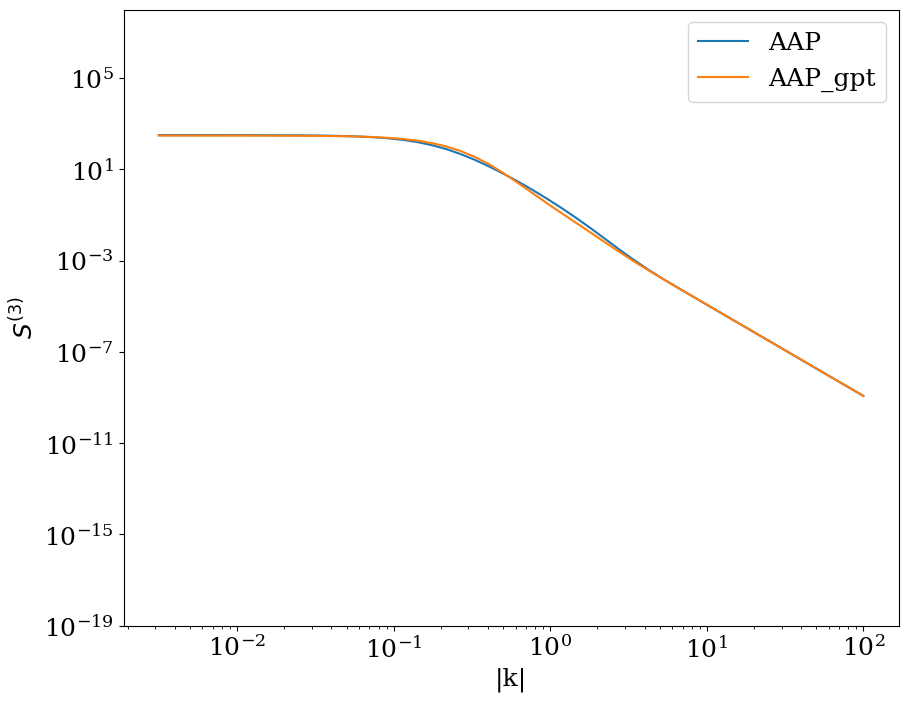

In [23]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
plt.plot(k1_val, S3_AAP/N_A**3, label = "AAP", linestyle = "-")
plt.plot(k1_val, S3_AAP_gpt/N_A**3, label = "AAP_gpt", linestyle = "-")

# plt.plot(k1_val, S3_AAP31/N_A**3, label = "(3,1), mine", linestyle = "-", color = "blue")
# plt.plot(k1_val, S3_AAP31_gpt/N_A**3, label = "(3,1), gpt", linestyle = "--", color = "lightblue")

# plt.plot(k1_val, S3_AAP32/N_A**3, label = "(3,2), mine", linestyle = "-", color = "red")
# plt.plot(k1_val, S3_AAP32_gpt/N_A**3, label = "(3,2), gpt", linestyle = "--", color = "pink")

# plt.plot(k1_val, S3_AAP33/N_A**3, label = "(3,3), mine", linestyle = "-", color = "orange")
# plt.plot(k1_val, S3_AAP33_gpt/N_A**3, label = "(3,3), gpt", linestyle = "--", color = "yellow")


plt.ylim(1e-19, 1e8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("|k|")
plt.ylabel("$S^{(3)}$")
plt.legend()
# plt.title()

In [18]:
S3_AAP31_gpt

array([7.50028324e+05, 7.50003790e+05, 7.49966276e+05, 7.49909039e+05,
       7.49821698e+05, 7.49688401e+05, 7.49485002e+05, 7.49174678e+05,
       7.48701343e+05, 7.47979647e+05, 7.46879923e+05, 7.45205667e+05,
       7.42660223e+05, 7.38798368e+05, 7.32957948e+05, 7.24167978e+05,
       7.11035812e+05, 6.91633524e+05, 6.63443573e+05, 6.23498298e+05,
       5.68949267e+05, 4.98340132e+05, 4.13560324e+05, 3.21472505e+05,
       2.32977944e+05, 1.58284133e+05, 1.01870212e+05, 6.23926233e+04,
       3.61884544e+04, 1.96727848e+04, 9.92796566e+03, 4.65249191e+03,
       2.06224215e+03, 8.90693701e+02, 3.82459696e+02, 1.64150566e+02,
       7.04523450e+01, 3.02376833e+01, 1.29778149e+01, 5.56999284e+00,
       2.39060431e+00, 1.02603165e+00, 4.40366040e-01, 1.89002210e-01,
       8.11185059e-02, 3.48155294e-02, 1.49425964e-02, 6.41326412e-03,
       2.75253080e-03, 1.18136813e-03])

In [19]:
S3_AAP31

array([7.50028324e+05, 7.50003790e+05, 7.49966276e+05, 7.49909039e+05,
       7.49821698e+05, 7.49688401e+05, 7.49485002e+05, 7.49174678e+05,
       7.48701343e+05, 7.47979647e+05, 7.46879923e+05, 7.45205667e+05,
       7.42660223e+05, 7.38798368e+05, 7.32957948e+05, 7.24167978e+05,
       7.11035812e+05, 6.91633524e+05, 6.63443573e+05, 6.23498298e+05,
       5.68949267e+05, 4.98340132e+05, 4.13560324e+05, 3.21472505e+05,
       2.32977944e+05, 1.58284133e+05, 1.01870212e+05, 6.23926233e+04,
       3.61884544e+04, 1.96727848e+04, 9.92796566e+03, 4.65249191e+03,
       2.06224215e+03, 8.90693701e+02, 3.82459696e+02, 1.64150566e+02,
       7.04523450e+01, 3.02376833e+01, 1.29778149e+01, 5.56999284e+00,
       2.39060431e+00, 1.02603165e+00, 4.40366040e-01, 1.89002210e-01,
       8.11185059e-02, 3.48155294e-02, 1.49425964e-02, 6.41326412e-03,
       2.75253080e-03, 1.18136813e-03])

In [23]:
S3_AAP32_gpt

array([3.04991843e+007, 3.04964938e+007, 3.04923845e+007, 3.04861151e+007,
       3.04765509e+007, 3.04619629e+007, 3.04397221e+007, 3.04058343e+007,
       3.03542496e+007, 3.02758388e+007, 3.01569124e+007, 2.99771335e+007,
       2.97067266e+007, 2.93030666e+007, 2.87072452e+007, 2.78422914e+007,
       2.66165174e+007, 2.49372951e+007, 2.27395550e+007, 2.00242076e+007,
       1.68846690e+007, 1.34966176e+007, 1.00839619e+007, 6.90423202e+006,
       4.23414265e+006, 2.28320378e+006, 1.07619247e+006, 4.47986698e+005,
       1.67786183e+005, 5.70563857e+004, 1.74587868e+004, 4.73220532e+003,
       1.12405770e+003, 2.29413936e+002, 3.76124574e+001, 4.27632081e+000,
       2.62720299e-001, 5.98222775e-003, 2.91881215e-005, 1.34946466e-008,
       1.70949967e-013, 8.93165214e-021, 1.06912878e-031, 3.55648460e-048,
       3.90903743e-073, 4.87142983e-111, 1.05452496e-168, 1.57091980e-256,
       0.00000000e+000, 0.00000000e+000])

In [25]:
S3_AAP32

array([3.04991843e+007, 3.04964938e+007, 3.04923845e+007, 3.04861151e+007,
       3.04765509e+007, 3.04619629e+007, 3.04397221e+007, 3.04058343e+007,
       3.03542496e+007, 3.02758388e+007, 3.01569124e+007, 2.99771335e+007,
       2.97067266e+007, 2.93030666e+007, 2.87072452e+007, 2.78422914e+007,
       2.66165174e+007, 2.49372951e+007, 2.27395550e+007, 2.00242076e+007,
       1.68846690e+007, 1.34966176e+007, 1.00839619e+007, 6.90423202e+006,
       4.23414265e+006, 2.28320378e+006, 1.07619247e+006, 4.47986698e+005,
       1.67786183e+005, 5.70563857e+004, 1.74587868e+004, 4.73220532e+003,
       1.12405770e+003, 2.29413936e+002, 3.76124574e+001, 4.27632081e+000,
       2.62720299e-001, 5.98222775e-003, 2.91881215e-005, 1.34946466e-008,
       1.70949967e-013, 8.93165214e-021, 1.06912878e-031, 3.55648460e-048,
       3.90903743e-073, 4.87142983e-111, 1.05452496e-168, 1.57091980e-256,
       0.00000000e+000, 0.00000000e+000])

In [27]:
S3_AAP33_gpt

array([2.87935891e+008, 2.87870584e+008, 2.87770936e+008, 2.87618919e+008,
       2.87387079e+008, 2.87033665e+008, 2.86495303e+008, 2.85676081e+008,
       2.84431503e+008, 2.82545395e+008, 2.79697831e+008, 2.75423242e+008,
       2.69061862e+008, 2.59717855e+008, 2.46258808e+008, 2.27427206e+008,
       2.02172730e+008, 1.70296008e+008, 1.33291941e+008, 9.48229858e+007,
       5.99404624e+007, 3.29406568e+007, 1.53855170e+007, 5.94983517e+006,
       1.84856241e+006, 4.45317340e+005, 7.89330073e+004, 9.39505272e+003,
       6.45995372e+002, 2.08918876e+001, 2.67663475e-001, 1.19507461e-003,
       9.18213836e-007, 3.31468053e-011, 1.01814142e-017, 2.08073591e-027,
       5.70045626e-042, 5.41866936e-064, 2.06383043e-097, 3.13676758e-148,
       1.31844191e-225, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

In [29]:
S3_AAP33

array([2.87935891e+008, 2.87870584e+008, 2.87770936e+008, 2.87618919e+008,
       2.87387079e+008, 2.87033665e+008, 2.86495303e+008, 2.85676081e+008,
       2.84431503e+008, 2.82545395e+008, 2.79697831e+008, 2.75423242e+008,
       2.69061862e+008, 2.59717855e+008, 2.46258808e+008, 2.27427206e+008,
       2.02172730e+008, 1.70296008e+008, 1.33291941e+008, 9.48229858e+007,
       5.99404624e+007, 3.29406568e+007, 1.53855170e+007, 5.94983517e+006,
       1.84856241e+006, 4.45317340e+005, 7.89330073e+004, 9.39505272e+003,
       6.45995372e+002, 2.08918876e+001, 2.67663475e-001, 1.19507461e-003,
       9.18213836e-007, 3.31468053e-011, 1.01814142e-017, 2.08073591e-027,
       5.70045626e-042, 5.41866936e-064, 2.06383043e-097, 3.13676758e-148,
       1.31844191e-225, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

### full uncondesed

In [5]:
# b_A = 1
# b_B = 1
# b_P = 1
# N_P = 1000
# N_A = 100
# N_B = N_A
# M = 50

sA, sB = corrs
sP = np.ones_like(sA)
sAsA = np.outer(sA, sA)
sBsB = np.outer(sB, sB)
sAsB = np.outer(sA, sB)

sAsAsA = np.einsum("i,j,k->ijk", sA, sA, sA)
sAsAsP = np.einsum("i,j,k->ijk", sA, sA, np.ones_like(sA))
sAsPsP = np.einsum("i,j,k->ijk", sA, sP, sP)
sAsBsP = np.einsum("i,j,k->ijk", sA, sB, np.ones_like(sA))

sBsBsB = np.einsum("i,j,k->ijk", sB, sB, sB)
sBsBsP = np.einsum("i,j,k->ijk", sB, sB, np.ones_like(sA))
sBsPsP = np.einsum("i,j,k->ijk", sB, sP, sP)

sAsAsB = np.einsum("i,j,k->ijk", sA, sA, sB)
sAsBsB = np.einsum("i,j,k->ijk", sA, sB, sB)


# x_p = (1/6)*N_P*b_P**2*k**2
# x_A = (1/6)*N_A*b_A**2*k**2
grid = np.indices((M,M,M))
j1 = grid[0]
j2 = grid[1] 
j3 = grid[2] 

S3_AAA31 = np.zeros(nk)
S3_AAA32 = np.zeros(nk)
S3_AAA33 = np.zeros(nk)

S3_PPP = np.zeros(nk)
S3_AAA = np.zeros(nk)
S3_BBB = np.zeros(nk)

S3_AAP = np.zeros(nk)
S3_PAA = np.zeros(nk)
S3_APA = np.zeros(nk)

S3_BBP = np.zeros(nk)
S3_PBB = np.zeros(nk)
S3_BPB = np.zeros(nk)

S3_ABP = np.zeros(nk)
S3_BAP = np.zeros(nk)
S3_PAB = np.zeros(nk)
S3_PBA = np.zeros(nk)

S3_BPA = np.zeros(nk)
S3_APB = np.zeros(nk)

S3_APP = np.zeros(nk)
S3_PPA = np.zeros(nk)
S3_PAP = np.zeros(nk)
S3_BPP = np.zeros(nk)
S3_PPB = np.zeros(nk)
S3_PBP = np.zeros(nk)

S3_AAB = np.zeros(nk)
S3_BAA = np.zeros(nk)
S3_ABA = np.zeros(nk)

S3_ABB = np.zeros(nk)
S3_BBA = np.zeros(nk)
S3_BAB = np.zeros(nk)


for i in range(nk):
    # k_1 = k[i]
    # k_2 = k2[i]
    # k_12 = k_1 + k_2
    
    k_1 = k1_val[i]
    k_2 = k2_val[i]
    k_12 = k3_val[i]

    # print("k1, k2: ", k_1, k_2)
    # CASE 1; kA = k1 + k2, kB = k_1; S3 > S2 > S1 and S1 > S2 > S3
    case1 = [[k_12, k_1], [j3, j2, j1]]
    case1_deg = [[k_1, k_12], [j1, j2, j3]]

    # CASE 2; kA = k2, kB = k1 + k2; S2 > S1 > S3 and S3 > S1 > S2
    case2 = [[k_2, k_12], [j2, j1, j3]]
    case2_deg = [[k_12, k_2], [j3, j1, j2]]
    
    # CASE 3; kA = k2, kB = -k1; S2 > S3 > S1 and S1 > S3 > S2
    case3 = [[-k_2, k_1], [j2, j3, j1]] # SWITCHED negatives from -k_1
    case3_deg = [[k_1, -k_2], [j1, j3, j2]] # SWITCHED negatives from -k_1
    
    case_arr = [case1, case2, case3, case1_deg, case2_deg, case3_deg]
    # need to consider degenerate cases. flipping each element in array, then appending to original case array
    # case_arr = np.vstack((case_arr, [[np.flipud(el) for el in cse] for cse in case_arr]))
    
#        for each case and sub case, add to a matrix C(j1, j2, j3) which contains the contribution to the overall S3
#        then sum over all indices. Need to keep track of js so that appropriate multiplications with cross corr matrix M3        
    C = np.zeros((M,M,M))

    # S3_AAA = 0
    for cse in case_arr:
        kA, kB = cse[0]
        ordered_js = cse[1]

        S3_PPP[i] += np.sum(S_AAA31(kA, kB, b_P, N_P))

        
        S3_AAA[i] += np.sum(sA*S_AAA31(kA, kB, b_A, N_A))
        S3_AAA31[i] += np.sum(sA*S_AAA31(kA, kB, b_A, N_A))
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsAsA / sA[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
        S3_AAA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        S3_AAA32[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_AAA[i] += np.sum(sAsAsA[np.where(index != 0)]*I[np.where(index != 0)])
        S3_AAA33[i] += np.sum(sAsAsA[np.where(index != 0)]*I[np.where(index != 0)])


        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsAsB / sA[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
        S3_AAB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_AAB[i] += np.sum(sAsAsB[np.where(index != 0)]*I[np.where(index != 0)])


        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsBsB / sB[ordered_js[2]] # <s_j1 s_j3> SOURCE OF NANS np.nans
        S3_ABB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_ABB[i] += np.sum(sAsBsB[np.where(index != 0)]*I[np.where(index != 0)])

        
        S3_AAP[i] += np.sum(sA*S_AAP31(kA, kB, b_A, N_A))
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_AAP32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsAsP / sA[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
        S3_AAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_AAP33(kA, kB, -kA-kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_AAP[i] += np.sum(sAsAsP[np.where(index != 0)]*I[np.where(index != 0)])
        
        S3_APA[i] += np.sum(sA*S_AAP31(kA, kB, b_A, N_A))
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_APA32(kA, kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsAsP
        S3_APA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        S3_AAP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)]) # handling As on different monomers
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_APA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_APA[i] += np.sum(sAsAsP[np.where(index != 0)]*I[np.where(index != 0)])


        S3_BBB[i] += np.sum(sB*S_AAA31(kA, kB, b_B, N_B))
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_AAA32(kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sBsBsB / sB[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
        S3_BBB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_AAA33(kA, kB, -kA-kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_BBB[i] += np.sum(sBsBsB[np.where(index != 0)]*I[np.where(index != 0)])
        
        S3_BBP[i] += np.sum(sB*S_AAP31(kA, kB, b_B, N_B))
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_AAP32(kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sBsBsP / sB[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
        S3_BBP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_AAP33(kA, kB, -kA-kB, b_B, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_BBP[i] += np.sum(sBsBsP[np.where(index != 0)]*I[np.where(index != 0)])
        
        S3_BPB[i] += np.sum(sB*S_AAP31(kA, kB, b_B, N_B))
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_APA32(kA, kB, b_B, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sBsBsP
        S3_BPB[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        S3_BBP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)]) # handling As on different monomers
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_APA33(kA, kB, -kA-kB, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_BPB[i] += np.sum(sBsBsP[np.where(index != 0)]*I[np.where(index != 0)])

        
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_APA32(kA, kB, b_A, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsBsP
        S3_ABP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_AAP33(kA, kB, -kA-kB, b_A, b_B, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_ABP[i] += np.sum(sAsBsP[np.where(index != 0)]*I[np.where(index != 0)])


        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_APA32(kA, kB, b_A, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsBsP
        S3_BPA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_APA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_BPA[i] += np.sum(sAsBsP[np.where(index != 0)]*I[np.where(index != 0)])

        S3_APP[i] += np.sum(sA*S_APP31(kA, b_A, N_A)) / len(case_arr) # (only depends on single k)
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_APP32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sAsPsP
        S3_APP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])      
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_APP33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_APP[i] += np.sum(sAsPsP[np.where(index != 0)]*I[np.where(index != 0)])

        S3_BPP[i] += np.sum(sB*S_APP31(kA, b_B, N_B)) / len(case_arr) # (only depends on single k)
        index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
        I = S_APP32(kA, kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[-1])
        corr = sBsPsP
        S3_BPP[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])      
        index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
        I = S_APP33(kA, kB, -kA-kB, b_B, b_P, N_B, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
        S3_BPP[i] += np.sum(sBsPsP[np.where(index != 0)]*I[np.where(index != 0)])
        
        S3_PAA[i] = S3_AAP[i]

        S3_PBB[i] = S3_BBP[i]
        
        S3_BAP[i] = S3_PAB[i] = S3_PBA[i] = S3_ABP[i] 
        S3_APB[i] = S3_BPA[i]

        S3_PPA[i] = S3_PAP[i] = S3_APP[i]
        S3_PPB[i] = S3_PBP[i] = S3_BPP[i]

        S3_ABA[i] = S3_BAA[i] = S3_AAB[i]

        S3_BAB[i] = S3_BBA[i] = S3_ABB[i]

# S3_PAA = S3_AAP

C:\Users\tmhab\wlcsim_membrane\explicit_binder\expl_bind_corr_calc.py:360: RuntimeWarning: overflow encountered in exp
  const = np.exp(
C:\Users\tmhab\wlcsim_membrane\explicit_binder\expl_bind_corr_calc.py:367: RuntimeWarning: overflow encountered in multiply
  return const * f(a1) * f(a2) * f(a3)
C:\Users\tmhab\wlcsim_membrane\explicit_binder\expl_bind_corr_calc.py:444: RuntimeWarning: overflow encountered in exp
  n3_factor = np.exp(
C:\Users\tmhab\wlcsim_membrane\explicit_binder\expl_bind_corr_calc.py:454: RuntimeWarning: overflow encountered in multiply
  return n1n2_factor * n3_factor
C:\Users\tmhab\wlcsim_membrane\explicit_binder\expl_bind_corr_calc.py:491: RuntimeWarning: overflow encountered in exp
  n3_factor = np.exp(
C:\Users\tmhab\wlcsim_membrane\explicit_binder\expl_bind_corr_calc.py:501: RuntimeWarning: overflow encountered in multiply
  return n1n2_factor * n3_factor
C:\Users\tmhab\wlcsim_membrane\explicit_binder\expl_bind_corr_calc.py:554: RuntimeWarning: overflow enco

In [101]:
print(s3_arr_mat[11])
s3_mat[2,0,1]

0.0


0.0

In [7]:
np.sum(sA*S_AAA31(kA, kB, b_A, N_A))

0.0014063690017441415

In [13]:
S_AAA31(kA, kB, b_A, N_A)

5.624913515625002e-05

In [9]:
S_AAA31(kA, kB, b_P, N_P)

0.0005624991351562502

In [15]:
N_A

100

In [17]:
N_P

1000

In [115]:
# s3_arr = [S3_PPP, S3_AAA, S3_BBB,\
#           S3_AAP, S3_BBP, S3_PAA, S3_PBB, \
#           S3_ABP, S3_BAP, S3_PAB, S3_PBA, \
#           S3_BPA, S3_APB, \
#           S3_APA,  S3_BPB, \
#           S3_APP, S3_PPA, S3_BPP, S3_PPB, \
#           S3_PAP, S3_PBP, \
#           S3_AAB,S3_BAA,S3_ABA,S3_ABB,S3_BBA,S3_BAB]

# s3_arr_mat = [
#     s3_mat[0,0,0],  # S3_PPP
#     s3_mat[1,1,1],  # S3_AAA
#     s3_mat[2,2,2],  # S3_BBB
    
#     s3_mat[1,1,0],  # S3_AAP
#     s3_mat[2,2,0],  # S3_BBP
#     s3_mat[0,1,1],  # S3_PAA
#     s3_mat[0,2,2],  # S3_PBB
    
#     s3_mat[1,2,0],  # S3_ABP
#     s3_mat[2,1,0],  # S3_BAP
#     s3_mat[0,1,2],  # S3_PAB
#     s3_mat[0,2,1],  # S3_PBA
    
#     s3_mat[2,0,1],  # S3_BPA
#     s3_mat[1,0,2],  # S3_APB
    
#     s3_mat[1,0,1],  # S3_APA
#     s3_mat[2,0,2],  # S3_BPB
    
#     s3_mat[1,0,0],  # S3_APP
#     s3_mat[0,0,1],  # S3_PPA
#     s3_mat[2,0,0],  # S3_BPP
#     s3_mat[0,0,2],  # S3_PPB
    
#     s3_mat[0,1,0],  # S3_PAP
#     s3_mat[0,2,0],  # S3_PBP
    
#     s3_mat[1,1,2],  # S3_AAB
#     s3_mat[2,1,1],  # S3_BAA
#     s3_mat[1,2,1],  # S3_ABA
#     s3_mat[1,2,2],  # S3_ABB
#     s3_mat[2,2,1],  # S3_BBA
#     s3_mat[2,1,2]   # S3_BAB
# ]

# for i,s3 in enumerate(s3_arr):
#     print("--------------------------------")
#     print(s3[8])
#     print(s3_arr_mat[i])
    

--------------------------------
986387760.5519409
986387760.5519409
--------------------------------
15426288691.340092
15426288691.340092
--------------------------------
15426274844.513226
15426274844.513226
--------------------------------
345861777.62662846
345861777.62662846
--------------------------------
342308972.69043726
342308972.69043726
--------------------------------
345861777.62662846
345861777.62662846
--------------------------------
342308972.69043726
342308972.69043726
--------------------------------
306084197.41139716
306084197.41139716
--------------------------------
306084197.41139716
306084197.41139716
--------------------------------
306084197.41139716
306084197.41139716
--------------------------------
306084197.41139716
306084197.41139716
--------------------------------
306182369.8734158
306182369.8734158
--------------------------------
306182369.8734158
306182369.8734158
--------------------------------
315274149.28740925
315274149.28740925
------------

In [32]:
len(s3_arr)

26

In [23]:
S3_AAP/N_A**3

array([3.19185104e+02, 3.19117082e+02, 3.19013287e+02, 3.18854943e+02,
       3.18613451e+02, 3.18245317e+02, 3.17684510e+02, 3.16831090e+02,
       3.15534453e+02, 3.13569213e+02, 3.10601623e+02, 3.06145581e+02,
       2.99511249e+02, 2.89759720e+02, 2.75699012e+02, 2.55993665e+02,
       2.29500284e+02, 1.95924937e+02, 1.56694940e+02, 1.15470692e+02,
       7.73940806e+01, 4.69356146e+01, 2.58830393e+01, 1.31755397e+01,
       6.31568300e+00, 2.88680526e+00, 1.25699569e+00, 5.19774374e-01,
       2.04620633e-01, 7.67500624e-02, 2.73870201e-02, 9.38469842e-03,
       3.18629985e-03, 1.12010764e-03, 4.20072154e-04, 1.68426887e-04,
       7.07150653e-05, 3.02436655e-05, 1.29778441e-05, 5.56999285e-06,
       2.39060431e-06, 1.02603165e-06, 4.40366040e-07, 1.89002210e-07,
       8.11185059e-08, 3.48155294e-08, 1.49425964e-08, 6.41326412e-09,
       2.75253080e-09, 1.18136813e-09])

In [25]:
S3_AAA/N_A**3 # GOOD LAPLACE ANDY

array([1.56230487e+04, 1.56189962e+04, 1.56136147e+04, 1.56051286e+04,
       1.55921091e+04, 1.55722825e+04, 1.55420717e+04, 1.54961078e+04,
       1.54262887e+04, 1.53205054e+04, 1.51608549e+04, 1.49213264e+04,
       1.45651558e+04, 1.40426395e+04, 1.32914259e+04, 1.22433242e+04,
       1.08437278e+04, 9.08835442e+03, 7.06989885e+03, 5.00098166e+03,
       3.16360056e+03, 1.78214312e+03, 9.12708102e+02, 4.48971291e+02,
       2.25722111e+02, 1.16225884e+02, 5.76817258e+01, 2.60199810e+01,
       1.04036540e+01, 3.73971193e+00, 1.28584648e+00, 4.64975374e-01,
       1.86154940e-01, 7.99837030e-02,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan])

In [12]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


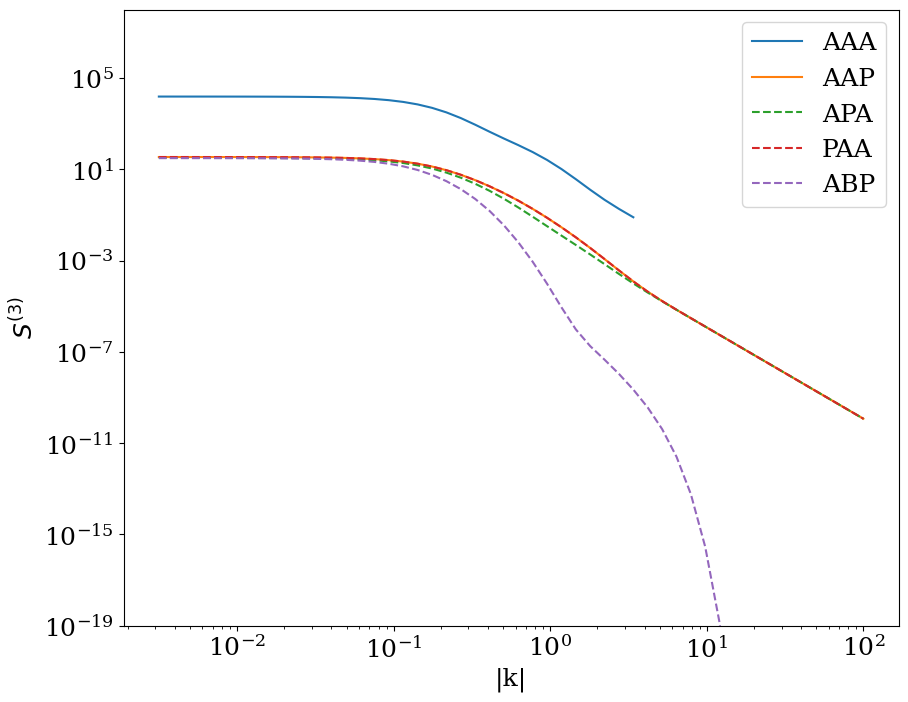

In [23]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
plt.plot(k1_val, S3_AAA/N_A**3, label = "AAA", linestyle = "-")
plt.plot(k1_val, S3_AAP/(N_A**2 * N_P), label = "AAP", linestyle = "-")
plt.plot(k1_val, S3_APA/(N_A**2 * N_P), label = "APA", linestyle = "--")
plt.plot(k1_val, S3_PAA/(N_A**2 * N_P), label = "PAA", linestyle = "--")

plt.plot(k1_val, S3_ABP/(N_A**2 * N_P), label = "ABP", linestyle = "--")

plt.ylim(1e-19, 1e8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("|k|")
plt.ylabel("$S^{(3)}$")
plt.legend()
# plt.title()

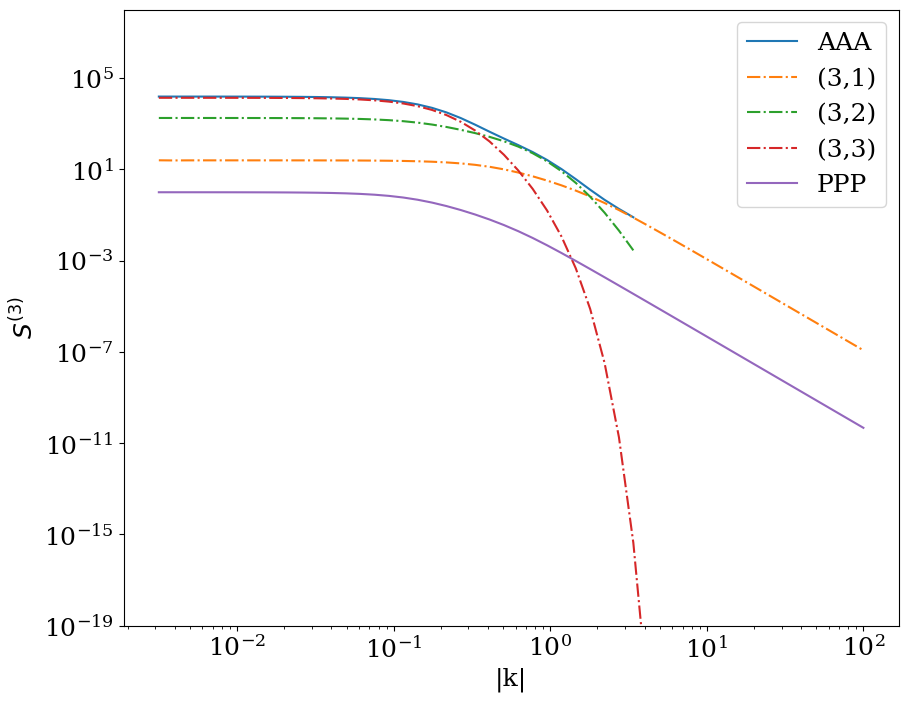

In [31]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
plt.plot(k1_val, S3_AAA/N_A**3, label = "AAA", linestyle = "-")

plt.plot(k1_val, S3_AAA31/N_A**3, label = "(3,1)", linestyle = "-.")
plt.plot(k1_val, S3_AAA32/N_A**3, label = "(3,2)", linestyle = "-.")
plt.plot(k1_val, S3_AAA33/N_A**3, label = "(3,3)", linestyle = "-.")


plt.plot(k1_val, S3_PPP/(N_P**3), label = "PPP", linestyle = "-")


plt.ylim(1e-19, 1e8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("|k|")
plt.ylabel("$S^{(3)}$")
plt.legend()
# plt.title()

In [19]:
S3_PPP/(N_P**3)

array([9.99494041e-01, 9.99293414e-01, 9.98915825e-01, 9.98341497e-01,
       9.97471187e-01, 9.96144233e-01, 9.94123360e-01, 9.91050628e-01,
       9.86387761e-01, 9.79333627e-01, 9.68711605e-01, 9.52829881e-01,
       9.29336382e-01, 8.95135997e-01, 8.46523497e-01, 7.79803918e-01,
       6.92723791e-01, 5.86727186e-01, 4.68999261e-01, 3.51916632e-01,
       2.48363973e-01, 1.65952427e-01, 1.05493424e-01, 6.37617387e-02,
       3.64588631e-02, 1.96075277e-02, 9.90481316e-03, 4.73554618e-03,
       2.17492557e-03, 9.73772733e-04, 4.29273888e-04, 1.87429248e-04,
       8.13397138e-05, 3.51624928e-05, 1.51623736e-05, 6.52751607e-06,
       2.80716943e-06, 1.20639394e-06, 5.18219282e-07, 2.22540851e-07,
       9.55480888e-08, 4.10184580e-08, 1.76076211e-08, 7.55785367e-09,
       3.24399999e-09, 1.39236502e-09, 5.97611217e-10, 2.56495671e-10,
       1.10087624e-10, 4.72492692e-11])

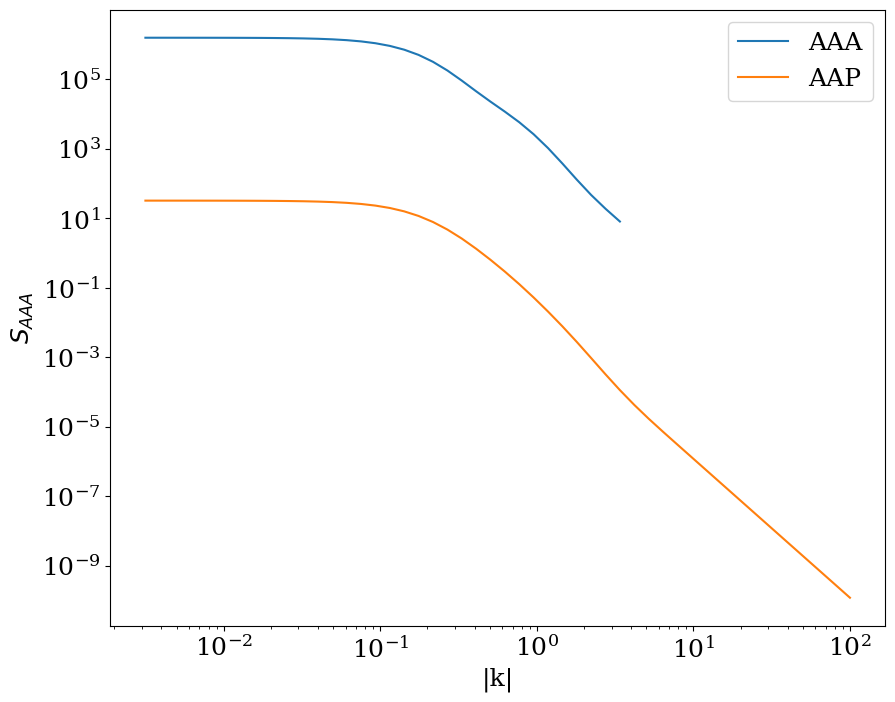

In [29]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
# plt.plot(k1_val, S3_AAA/N_A**2, label = "AAA", linestyle = "-")
# plt.plot(k1_val, S3_AAP/(N_A**2 * N_P), label = "AAP", linestyle = "-")

# plt.plot(k1_val, S3_AAA31/N_A**3, label = "(3,1)", linestyle = "-")
# plt.plot(k1_val[:36], S3_AAA32[:36]/N_A**3, label = "(3,2)", linestyle = "-")
# plt.plot(k1_val, S3_AAA33/N_A**3, label = "(3,3)", linestyle = "-")



plt.xscale('log')
plt.yscale('log')
plt.xlabel("|k|")
plt.ylabel("$S_{AAA}$")
plt.legend()
# plt.title()

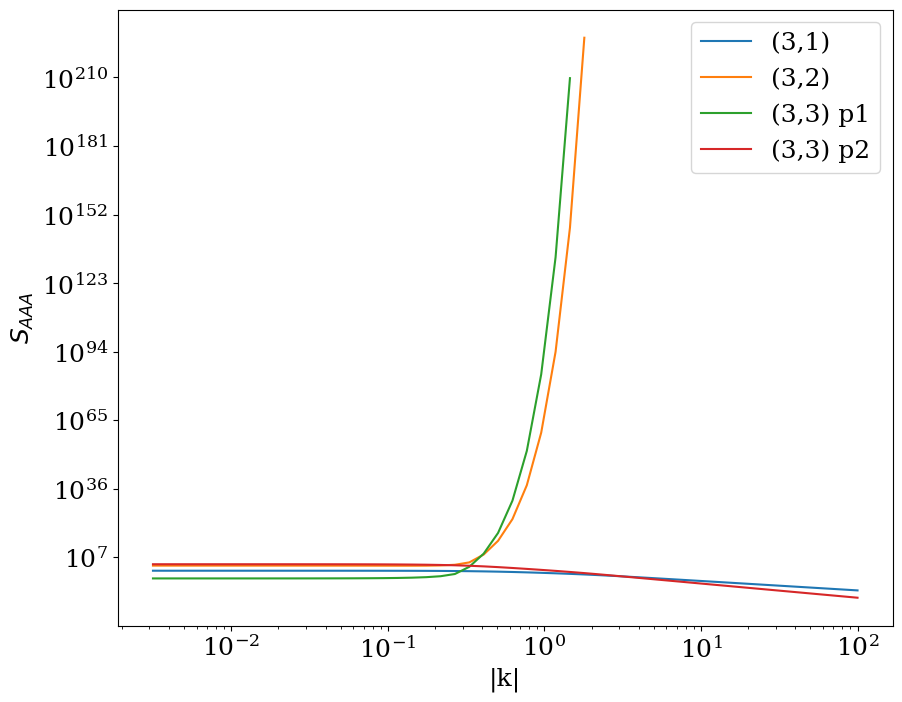

In [43]:
# plt.figure(figsize=(10,8))
# font = {'family' : 'serif',
#         'weight':'normal',
#         'size': 18}
# plt.rc('font', **font)

# # plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# # plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
# # plt.plot(k1_val[:28], S3_AAA[:28], label = "AAA", linestyle = "-")
# plt.plot(k1_val, S3_AAA31/N_A**3, label = "(3,1)", linestyle = "-")
# plt.plot(k1_val[:36], S3_AAA32[:36]/N_A**3, label = "(3,2)", linestyle = "-")
# plt.plot(k1_val, S3_AAA33_p1/N_A**3, label = "(3,3) p1", linestyle = "-")
# plt.plot(k1_val, S3_AAA33_p2/N_A**3, label = "(3,3) p2", linestyle = "-")



# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel("|k|")
# plt.ylabel("$S_{AAA}$")
# plt.legend()
# # plt.title()

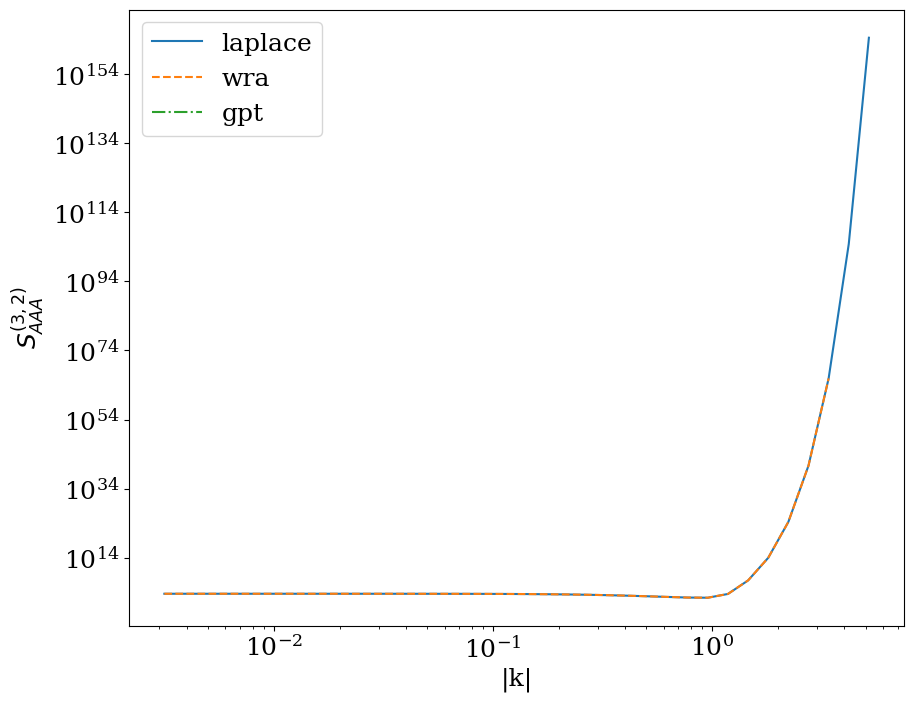

In [23]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
# plt.plot(k1_val[:28], S3_AAA[:28], label = "AAA", linestyle = "-")
# plt.plot(k1_val, S3_AAA31/N_A**3, label = "(3,1)", linestyle = "-")
# plt.plot(k1_val[:36], S3_AAA32[:36]/N_A**3, label = "(3,2)", linestyle = "-")
# plt.plot(k1_val, S3_AAA33/N_A**3, label = "(3,3)", linestyle = "-")
print("ONLY WHEN k2 != k3")
plt.plot(k1_val[:36], S3_AAA32_laplace[:36], label = "laplace", linestyle = "-") # if truly laplace, doesnt have NA^3
# plt.plot(k1_val[:36], S3_AAA32_NA[:36]/N_A**3, label = "laplace NA", linestyle = "-")
plt.plot(k1_val[:36], S3_AAA32[:36]/N_A**3, label = "wra", linestyle = "--")
# plt.plot(k1_val[:36], S3_AAA32_M_to_Laplace_arr[:36]/N_A**3, label = "wra edit", linestyle = "-.")

# plt.plot(k1_val[:36], S3_AAA32_OLD2_GPT[:36]/N_A**3, label = "gpt", linestyle = "-.")
# S3_AAA32_M_to_Laplace_arr


plt.xscale('log')
plt.yscale('log')
plt.xlabel("|k|")
plt.ylabel("$S_{AAA}^{(3,2)}$")
plt.legend()
# plt.title()

In [17]:
# def S_AAA32_M_to_Laplace(k2, k3, bA, bP, N_A, N_P, M, j3, j1):
#     # Laplace-style variables
#     x1 = (bA**2/6) * k2**2 * N_A
#     x3 = (bA**2/6) * k3**2 * N_A
#     delJ3 = (bP**2/6) * (N_P / (M-1)) * k3**2 * (j3-j1)

#     num = (
#         2 * (N_A**3)
#         * np.exp(-delJ3 - (x1 + 3*x3))
#         * (-1.0 + np.exp(x3))
#         * (
#             np.exp(x1+x3) * x1
#             - np.exp(2*x3) * x3
#             + np.exp(x1+2*x3) * (-x1 + x3)
#         )
#     )
#     denom = x1 * (x3**2) * (-x1 + x3)

#     return num / denom

# def s3_OABS_samej(xm_A, xm_B):
#     # only for xm_a DNE xm_b
#     if xm_A == xm_B:
#         integral = (1 / xm_A**3) * (np.exp(-xm_A) * (2 + np.exp(xm_A)*(-2 + xm_A) + xm_A))
#     elif np.isclose(xm_B, 0, atol=1e-12):
#         integral = (2-2*np.exp(-xm_A) - 2*xm_A + xm_A**2)/ (2*xm_A**3)
#     elif np.isclose(xm_A, 0, atol=1e-12):
#         integral = (2-2*np.exp(-xm_B) - 2*xm_B + xm_B**2)/ (2*xm_B**3)
#     else:
#         integral = (1 / (xm_A**2 * xm_B - xm_A * xm_B**2))\
#         * ( xm_A + (((-1 + np.exp(-xm_B)) * xm_A)/(xm_B)) - xm_B + ((xm_B - np.exp(-xm_A)*xm_B)/(xm_A)) )

#     return integral

In [21]:
k_alp = 0.3
k_bet = 0.3
# k_bet = k_alp

x1 = (b_A**2/6) * k_alp**2
x2 = (b_A**2/6) * k_bet**2

xm_A = x1
xm_B = x2
# xm_A = (1/6) * N_m * b**2 * np.linalg.norm(kA)**2
# xm_B = (1/6) * N_m * b**2 * np.linalg.norm(kB)**2
# s3_OABS_samej(xm_A*N_A, xm_B*N_A)

In [23]:
S_AAA32(k_alp, k_bet, b_A, b_P, N_A, N_P, 10, 8, 3)

96156.22602341468

In [29]:
import numpy as np

def triple_integral_simple(k2, k3, bA, bP, NA, N_P, M, j3, j1, tol = 1e-10):
    """
    Compute
      I = 2 * ∫_{n3=0}^{NA} ∫_{n2=0}^{NA} ∫_{n1=0}^{n2}
            exp[-x3*n1 - x3*(n2-n1) - delJ3 - x3*n3] dn1 dn2 dn3

    Returns the value and handles x3 -> 0 safely.
    """
    x2 = (bA**2/6) * k2**2
    x3 = (bA**2/6) * k3**2
    delJ3 = (bP**2/6) * (N_P / (M-1)) * k3**2 * (j3-j1)
    
    # If x3 is effectively zero, return the limit
    if np.isclose(x3, 0.0, atol=tol):
        return np.exp(-delJ3) * (NA**3)

    # Use stable forms: A = 1 - exp(-x3 * NA)
    A = -np.expm1(-x3 * NA)   # equals 1 - exp(-x3*NA), but stable for small argument
    e_x3NA = np.exp(-x3 * NA)

    term = (A**2) / (x3**3) - (NA * e_x3NA * A) / (x3**2)
    return 2.0 * np.exp(-delJ3) * term


In [31]:
triple_integral_simple(k_alp, k_bet, b_A, b_P, N_A, N_P, 10, 8, 3)

96156.22602341475

In [25]:
S_AAA32_OLD(k_alp, k_bet, b_A, b_P, N_A, N_P, 10, 8, 3)

65622.10317756081

In [27]:
S_AAA32_OLD2(k_alp, k_bet, b_A, b_P, N_A, N_P, 10, 8, 3)

65622.10317756081

In [ ]:
S_AAA32_laplace

In [45]:
# mathematica_expr(k_alp, k_bet, b_A, b_A, N_A, N_A*10, 10, 8, 3)

NameError: name 'mathematica_expr' is not defined

In [91]:
wra_expr(k_alp, k_bet, b_A, b_A, N_A, N_A*10, 10, 8, 3)

6.19227859214341e-06

In [93]:
chatgpt(k_alp, k_bet, b_A, b_A, N_A, N_A*10, 10, 8, 3)

3.914864500695221e-07

In [95]:
laplace(k_alp, k_bet, b_A, b_A, N_A, N_A*10, 10, 8, 3)

8.532575264579693e-11

In [97]:
laplace_chatgpt(k_alp, k_bet, b_A, b_A, N_A, N_A*10, 10, 8, 3)

0.964257742762476

In [81]:
# bA = b_A
# bP = b_A
# k2 = k_alp
# k3 = k_bet
# j3 = 8
# j1 = 3
# M = 10
# x2 = (bA**2/6) * k2**2
# x3 = (bA**2/6) * k3**2
# delJ3 = (bP**2/6) * (N_P / (M-1)) * k3**2 * (j3-j1)
# num = (
#         np.exp(-delJ3 - N_A * (x2 + 3.0 * x3))
#         * ( -1.0 + np.exp(N_A * x3) )
#         * ( np.exp(N_A * (x2 + x3)) * x2
#             - np.exp(2.0 * N_A * x3) * x3
#             + np.exp(N_A * (x2 + 2.0 * x3)) * (-x2 + x3) )
#     )
# denom = x2 * (x3**2) * (-x2 + x3)
    
# num / denom

In [ ]:
def S_AAA33_p1(k1, k2, k3, bA, bP, N_A, N_P, M, j1, j2, j3):
    """ 
    Compute the triple integral:
    I = \int_0^N_A dn1 \int_0^N_A dn2 \int_0^N_A dn3 exp[ ... ]
    """
    a1 = (bA**2 / 6.0) * k1**2
    a2 = (bA**2 / 6.0) * k2**2
    a3 = (bA**2 / 6.0) * k3**2
    
    # Propagator prefactor
    # should js be absval?
    const = np.exp(
        - (N_P / (6.0*(M-1))) * bP**2 * (k1**2 * (j2 - j1) + k3**2 * (j3 - j2))
    )
    
    def f(a):
        return (1 - np.exp(-a * N_A)) / a if a > 1e-14 else N_A
    
    return const# * f(a1) * f(a2) * f(a3)
def S_AAA33_p2(k1, k2, k3, bA, bP, N_A, N_P, M, j1, j2, j3):
    """ 
    Compute the triple integral:
    I = \int_0^N_A dn1 \int_0^N_A dn2 \int_0^N_A dn3 exp[ ... ]
    """
    a1 = (bA**2 / 6.0) * k1**2
    a2 = (bA**2 / 6.0) * k2**2
    a3 = (bA**2 / 6.0) * k3**2
    
    # Propagator prefactor
    # should js be absval?
    const = np.exp(
        - (N_P / (6.0*(M-1))) * bP**2 * (k1**2 * (j2 - j1) + k3**2 * (j3 - j2))
    )
    
    def f(a):
        return (1 - np.exp(-a * N_A)) / a if a > 1e-14 else N_A
    
    return  f(a1) * f(a2) * f(a3) *np.ones_like(j1)

In [57]:
def laplace(k2, k3, bA, bP, N_A, N_P, M, j3, j1):
    # FROM ANDY- laplace calculation, only for k2 != k3
    assert k2 != k3
    x1 = (bA**2/6) * k2**2
    x3 = (bA**2/6) * k3**2
    delJ3 = (bP**2/6) * (N_P / (M-1)) * k3**2 * (j3-j1)
    return 2\
    * np.exp(-delJ3) * ( (1 / (x1*x3)) \
    - (np.exp(-x1) / (x1 * (x3 - x1))) \
    - (np.exp(-x3) / (x3 * (x1 - x3)))) \
    * (1 / x3) * (1 - np.exp(-x3)) 

In [59]:
import numpy as np

def mathematica_expr(k2, k3, bA, bP, N_A, N_P, M, j3, j1):
    # (N_A, x3, x2, delJ3):
    """
    Compute the expression from Mathematica in Python.
    
    Parameters
    ----------
    N_A : float
        Upper integration limit (parameter).
    x3, x2 : float
        Variables from the integral.
    delJ3 : float
        J3 - J1 difference term.
    """
    x2 = (bA**2/6) * k2**2
    x3 = (bA**2/6) * k3**2
    delJ3 = (bP**2/6) * (N_P / (M-1)) * k3**2 * (j3-j1)
    num = (
        np.exp(-delJ3 - N_A * (x2 + 3 * x3))
        * ( -1 + np.exp(N_A * x3) )
        * ( np.exp(N_A * (x2 + x3)) * x2
            - np.exp(2 * N_A * x3) * x3
            + np.exp(N_A * (x2 + 2 * x3)) * (-x2 + x3) )
    )
    denom = x2 * (x3**2) * (-x2 + x3)
    
    return 2*num / denom

import numpy as np

def wra_expr(k2, k3, bA, bP, N_A, N_P, M, j3, j1, tol = 1e-10):
    """
    Compute the Mathematica expression with full special-case handling.

    Branches:
      1) x2 == x3
      2) x2 == 0
      3) x3 == 0 and delJ3 == 0 (Mathematica simplified result)
      4) general case
    """
    x2 = (bA**2/6) * k2**2
    x3 = (bA**2/6) * k3**2
    delJ3 = (bP**2/6) * (N_P / (M-1)) * k3**2 * (j3-j1)
    
    # --- Case 1: x2 == x3 ---
    if np.isclose(x2, x3, atol=tol):
        num = (
            2.0
            * np.exp(-delJ3 - 2.0 * N_A * x3)
            * ( -1.0 + np.exp(N_A * x3) )
            * ( -1.0 + np.exp(N_A * x3) - N_A * x3 )
        )
        denom = x3**3
        return num / denom

    # --- Case 2: x2 == 0 ---
    if np.isclose(x2, 0.0, atol=tol):
        num = (
            np.exp(-delJ3 - 2.0 * N_A * x3)
            * ( -1.0 + np.exp(N_A * x3) )
            * ( 2.0 + 2.0 * np.exp(N_A * x3) * (-1.0 + N_A * x3) )
        )
        denom = x3**3
        return num / denom

    # --- Case 3: x3 == 0 and delJ3 == 0 ---
    if np.isclose(x3, 0.0, atol=tol) and np.isclose(delJ3, 0.0, atol=tol):
        if np.isclose(x2, 0.0, atol=tol):
            # Limit x2 -> 0 using series expansion: (-1 + exp(-N_A x2) + N_A x2)/x2^2 -> N_A^2
            return N_A**2
        # Mathematica simplified numerator for x3=0, delJ3=0
        return 2.0 * N_A * (-1.0 + np.exp(-N_A * x2) + N_A * x2) / (x2**2)

    # --- General case ---
    num = (
        2*np.exp(-delJ3 - N_A * (x2 + 3.0 * x3))
        * ( -1.0 + np.exp(N_A * x3) )
        * ( np.exp(N_A * (x2 + x3)) * x2
            - np.exp(2.0 * N_A * x3) * x3
            + np.exp(N_A * (x2 + 2.0 * x3)) * (-x2 + x3) )
    )
    denom = x2 * (x3**2) * (-x2 + x3)
    
    return num / denom


In [60]:
import numpy as np

def chatgpt(k2, k3, bA, bP, N_A, N_P, M, j3, j1, delJ3=0.0, tol=1e-12):
    """ NO POSITIVE EXPOENNTIALS
    Compute the triple integral
        I = ∫₀ᴺ dn3 ∫₀ⁿ³ dn2 ∫₀ⁿ² dn1 exp[-x3*n1 - x2*(n2-n1) - x3*n3 - delJ3]
    using a stable Laplace-transform approach.

    Handles edge cases:
      - x2 == x3
      - x2 == 0
      - x3 == 0
      - general case
    """
    x2 = (bA**2/6) * k2**2
    x3 = (bA**2/6) * k3**2
    delJ3 = (bP**2/6) * (N_P / (M-1)) * k3**2 * (j3-j1)
    
    # --- Case 1: x2 == x3 ---
    if np.isclose(x2, x3, atol=tol):
        x = x3
        # Analytic limit for x2 -> x3
        return np.exp(-delJ3) * (
            N_A / x**2
            - 3 * (1 - np.exp(-x*N_A)) / x**3
            + (1 - np.exp(-2*x*N_A)) / (2*x**3)
        )

    # --- Case 2: x2 == 0 ---
    if np.isclose(x2, 0.0, atol=tol):
        # Handle the limit using Taylor expansion if needed
        # Integral simplifies to:
        # I = ∫₀ᴺ dn3 ∫₀ⁿ³ dn2 ∫₀ⁿ² dn1 exp[-x3*n1 - x3*n3]
        term1 = (1 - np.exp(-x3*N_A)) / x3
        term2 = N_A - term1 / x3  # ∫₀ᴺ dn2 ∫₀ⁿ² exp(-x3 n1) dn1
        return 2 * np.exp(-delJ3) * term1 * term2  # factor 2 for symmetric region if needed

    # --- Case 3: x3 == 0 ---
    if np.isclose(x3, 0.0, atol=tol):
        if np.isclose(x2, 0.0, atol=tol):
            # Both x2 and x3 zero
            return N_A**3 / 3  # ∫₀ᴺ dn3 ∫₀ⁿ³ dn2 ∫₀ⁿ² dn1 1 = N^3/3
        else:
            # x3=0, x2!=0
            term1 = 1 - np.exp(-x2*N_A)
            return np.exp(-delJ3) * (N_A/x2 - term1/x2**2)

    # --- General case: x2 != x3, x2 != 0, x3 != 0 ---
    denom = x3 - x2
    term1 = (1 - np.exp(-(x2 + x3) * N_A)) / (x2 * denom)
    term2 = (1 - np.exp(-2 * x3 * N_A)) / (x3 * denom)
    result = np.exp(-delJ3) * (term1 - term2)
    
    return result


In [61]:
import numpy as np

def laplace_chatgpt(k2, k3, bA, bP, N_A, N_P, M, j3, j1, tol=1e-10):
    """
    Computes the nested integral using the Laplace transform result,
    with safe handling of edge cases where x1=0, x3=0, or x1≈x3.
    """
    # Define x1, x3, and delJ3
    x1 = (bA**2 / 6.0) * k2**2
    x3 = (bA**2 / 6.0) * k3**2
    delJ3 = (bP**2 / 6.0) * (N_P / (M - 1)) * k3**2 * (j3 - j1)

    # --- Edge cases ---
    # Case 1: x1 ~ 0
    if abs(x1) < tol:
        # Limit x1 -> 0
        return 2 * ( (1 - np.exp(-x3) - x3*np.exp(-x3)) / (x3**3) )

    # Case 2: x3 ~ 0
    if abs(x3) < tol:
        # Limit x3 -> 0, with delJ3 -> 0
        return (2 * N_A * ( -1 + np.exp(-N_A * x1) + N_A * x1 )) / (x1**2)

    # Case 3: x1 ~ x3
    if abs(x1 - x3) < tol:
        # Use l'Hôpital rule expansion
        print(2 * np.exp(-x1) * (1 - np.exp(-x1)) * (1 - x1))
        print((x1**3))
        return 2 * np.exp(-x1) * (1 - np.exp(-x1)) * (1 - x1) / (x1**3)

    # --- General Laplace transform result ---
    val = 2 * (
        (1 / (x1 * x3))
        - (np.exp(-x1) / (x1 * (x3 - x1)))
        - (np.exp(-x3) / (x3 * (x1 - x3)))
    ) * (1 / x3) * (1 - np.exp(-x3))

    return val


In [ ]:
# sA, sB = corrs
# sAsA = np.outer(sA, sA)
# sBsB = np.outer(sB, sB)
# sAsB = np.outer(sA, sB)

# sAsAsA = np.einsum("i,j,k->ijk", sA, sA, sA)


# # x_p = (1/6)*N_P*b_P**2*k**2
# # x_A = (1/6)*N_A*b_A**2*k**2
# grid = np.indices((M,M,M))
# j1 = grid[0]
# j2 = grid[1] 
# j3 = grid[2] 

# S3_AAA = np.zeros(nk)
# S3_AAA31 = np.zeros(nk)
# S3_AAA32 = np.zeros(nk)
# S3_AAA33 = np.zeros(nk)

# S3_AAA32_OLD3_WRA = np.zeros(nk)
# S3_AAA32_OLD2_GPT = np.zeros(nk)
# S3_AAA32_M_to_Laplace_arr = np.zeros(nk)

# S3_AAA33_p1 = np.zeros(nk)
# S3_AAA33_p2 = np.zeros(nk)


# for i in range(nk):
#     # k_1 = k[i]
#     # k_2 = k2[i]
#     # k_12 = k_1 + k_2
    
#     k_1 = k1_val[i]
#     k_2 = k2_val[i]
#     k_12 = k3_val[i]

#     # print("k1, k2: ", k_1, k_2)
#     # CASE 1; kA = k1 + k2, kB = k_1; S3 > S2 > S1 and S1 > S2 > S3
#     case1 = [[k_12, k_1], [j3, j2, j1]]
#     case1_deg = [[k_1, k_12], [j1, j2, j3]]

#     # CASE 2; kA = k2, kB = k1 + k2; S2 > S1 > S3 and S3 > S1 > S2
#     case2 = [[k_2, k_12], [j2, j1, j3]]
#     case2_deg = [[k_12, k_2], [j3, j1, j2]]
    
#     # CASE 3; kA = k2, kB = -k1; S2 > S3 > S1 and S1 > S3 > S2
#     case3 = [[-k_2, k_1], [j2, j3, j1]] # SWITCHED negatives from -k_1
#     case3_deg = [[k_1, -k_2], [j1, j3, j2]] # SWITCHED negatives from -k_1
    
#     case_arr = [case1, case2, case3, case1_deg, case2_deg, case3_deg]
#     # need to consider degenerate cases. flipping each element in array, then appending to original case array
#     # case_arr = np.vstack((case_arr, [[np.flipud(el) for el in cse] for cse in case_arr]))
    
# #        for each case and sub case, add to a matrix C(j1, j2, j3) which contains the contribution to the overall S3
# #        then sum over all indices. Need to keep track of js so that appropriate multiplications with cross corr matrix M3        
#     C = np.zeros((M,M,M))

#     # S3_AAA = 0
#     for cse in case_arr:
#         kA, kB = cse[0]
#         ordered_js = cse[1]
        
#         S3_AAA[i] += np.sum(sA*S_AAA31(kA, kB, b_A, N_A))
#         S3_AAA31[i] += np.sum(sA*S_AAA31(kA, kB, b_A, N_A))
#         # print("S_AAA31: ")
#         # print("kA, kB, b_A, N_A: ", kA, kB, b_A, N_A)
#         # print(np.sum(sA*S_AAA31(kA, kB, b_A, N_A)/N_A**3))
        
#         # index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] != ordered_js[-1])
#         index = (ordered_js[0] == ordered_js[1]) * (ordered_js[0] > ordered_js[-1])
#         I = S_AAA32(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
#         corr = sAsAsA / sA[ordered_js[0]] # <s_j1 s_j3> SOURCE OF NANS np.nans
#         S3_AAA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
#         S3_AAA32[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])

#         # I = S_AAA32_OLD2(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
#         # S3_AAA32_OLD2_WRA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
#         # I = S_AAA32_OLD2(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
#         # S3_AAA32_OLD2_GPT[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
#         # I = S_AAA32_NA(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
#         # S3_AAA32_NA[i] += np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
#         # I = S_AAA32_M_to_Laplace(kA, kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[-1])
#         # S3_AAA32_M_to_Laplace_arr[i] +=  np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)])
#         # print("S_AAA32 I: ")
#         # print(
#         # print("S_AAA32: ")
#         # print(np.sum(corr[np.where(index != 0)]*I[np.where(index != 0)]))

#         # index = (ordered_js[0] != ordered_js[1]) * (ordered_js[0] != ordered_js[2]) * (ordered_js[1] != ordered_js[2])
#         index = (ordered_js[2] > ordered_js[1]) * (ordered_js[1] > ordered_js[0])
#         I = S_AAA33(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         S3_AAA[i] += np.sum(sAsAsA[np.where(index != 0)]*I[np.where(index != 0)])
#         S3_AAA33[i] += np.sum(sAsAsA[np.where(index != 0)]*I[np.where(index != 0)])

#         I_p1 = S_AAA33_p1(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         I_p2 = S_AAA33_p2(kA, kB, -kA-kB, b_A, b_P, N_A, N_P, M, ordered_js[0], ordered_js[1], ordered_js[2])
#         S3_AAA33_p1[i] += np.sum(sAsAsA[np.where(index != 0)]*I_p1[np.where(index != 0)])
#         S3_AAA33_p2[i] += np.sum(sAsAsA[np.where(index != 0)]*I_p2[np.where(index != 0)])

#         # print("S_AAA33: ")
#         # print(np.sum(sAsAsA[np.where(index != 0)]*I[np.where(index != 0)]))
        

In [162]:
# # NEW FUNC
# x1 = 2e-5
# x2 = x1
# if np.isclose(x1, x2):
#     x = x1
#     term1 = N_A/x - (1 - np.exp(-x*N_A))/x**2
#     term2 = (N_A*np.exp(-x*N_A))/x
#     print((term1 - term2) / x)

In [42]:
S_AAA31(k1_val[0], k2_val[0], b_A, N_A)/N_A**3

-35991000.66662653

In [58]:
np.exp(-x1)

0.9999973333368889

In [78]:
N_A**3

1000000

In [94]:
np.sum(sA*S_AAA31(k_alp, k_bet, b_A, N_A)/N_A**3)

4.147966972884101

In [100]:
np.sum(sA*S_AAA31(k1_val[0], k2_val[0], b_A, N_A)/N_A**3)

4.167007088730469